















<div style="display: fill;
            border-radius: 15px;
            background-color: pink;
            font-size: 210%;
            font-family: Vardana;
            letter-spacing: 0.5px;
            padding: 10px;
            color: Red;
            border-style: solid;
            border-color: red;
            text-align: center;">

<b> Project Title: </b> Development of a Personalized Predictive Model for 
    Identifying Individual Patient Fatigue Risk Factors based on Physiological Data
</div>

<blockquote style="margin-right: auto; margin-left: auto; background-color: cyan; padding: 1em; margin: 2px; font-size: 18px; font-family: Comic Sans Ms; color: Black; letter-spacing: 0.7px; text-align: justify;">

## Research Objective
The primary goal of this research is to develop a personalized predictive model capable of forecasting both mental and physical fatigue while identifying specific risk factors for fatigue in individual patients. This will be achieved through the analysis of physiological data.

### Scope of Research
Our study will focus on evaluating four classification algorithms:

- Random Forest
- XGBoost Classifier
- Convolutional Neural Networks (CNN)
- Artificial Neural Networks (ANN)
- Recurrent Neural Networks (RNN) for deep learning
- Combined on Voting and Stacking

These algorithms will undergo testing using a secondary dataset of physiological data. Model assessment will be based on various performance metrics, including accuracy, precision, recall, and F1-score.

### Cross-Validation Approach
To ensure robust model performance, we will employ a cross-validation technique, specifically the Stratified K-Fold method with 5 folds. This approach enhances the reliability of our results by iteratively training and evaluating the models on different subsets of the dataset, thus minimizing the risk of overfitting and providing a more generalized assessment.

</blockquote>


<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:1.5px;font-size:15px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">

**Steps:**

1. Load the necessary packages.
2. Perform data preprocessing, cleaning, and exploratory data analysis.
3. Load and combine datasets.
4. Transform the data and engineer features.
5. Aggregate and merge the data.
6. Perform exploratory data analysis (EDA) using visualizations.

**Data Preparation for Model Implementation:**

* Rename columns and handle missing values.
* Handle categorical variables.
* Perform data aggregation and mean computation.
* Perform data mapping and grouping.
* Generate visualizations to visualize various parameters.
* Merge dataframes and convert data types.
* Fill missing values.
* Perform data mapping and conversion.

**Model Building and Evaluation:**

* **Random Forest:** Split the dataset into train and validation sets. Perform hyperparameter tuning using GridSearchCV. Evaluate the model on the validation set using accuracy, weighted precision, recall, and F1 score.
* **XGBoost Classifier:** Use Optuna to find the best parameters for the XGBoost model. Train the model using the best parameters and evaluate its performance on the validation set.
* **Voting and Stacking:** Create voting and stacking classifiers for physical and mental fatigue. Evaluate the performance of the classifiers using various metrics, including accuracy, precision, recall, and F1 score.
* **Convolutional Neural Networks (CNN):** Build two separate CNN models for predicting physical and mental fatigue. Preprocess and reshape the data to fit the CNN model requirements. Tune the hyperparameters using Kerastuner's RandomSearch. Train the models with the best hyperparameters and evaluate their performance on the validation set using various metrics, including accuracy, precision, recall, F1 score, and mean squared error.
* **Artificial Neural Networks (ANN):** Build two distinct ANN models for the prediction of physical and mental fatigue. Prepare and reshape the data to match the input requirements of the ANN models. Build the models using the Keras library and evaluate their performance on the validation set using various metrics.
* **Recurrent Neural Networks (RNN):** RNNs are particularly well-suited for time series or sequential data. You can build two separate RNN models for predicting physical and mental fatigue.

** Draw conclusions and identify next steps.




<span class="label label-default" style="background-color:green; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; "><b> Step 1. Load the necessary packages</b></span>

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xgboost as xgb
import tensorflow as tf
import datetime 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import layers, models
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Import additional libraries
import time

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import plot_tree
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from optuna.visualization import plot_optimization_history, plot_intermediate_values
from datetime import date

# Import for machine learning models
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier


<blockquote style="margin-right:auto; margin-left:auto; background-color: cyan; padding: 1em; margin:2px;font-size:18px;font-family:Comic Sans Ms;color:Black;letter-spacing:0.7px;text-align: justify;">

## Step 2: Data Preprocessing, Cleaning, and Exploratory Data Analysis
- In this step, the following tasks will be undertaken:

- Data Preprocessing: Transformation and normalization of raw data into a format suitable for analysis.
- Data Cleaning: Removal of any inconsistencies, missing values, or outliers in the dataset.
- Exploratory Data Analysis (EDA): Examination of the dataset through various statistical and visualization techniques to identify patterns, trends, and potential relationships between variables.





In [2]:

np.random.seed(42)

seed = 42

# Load the CSV files into dataframes
fatigue = pd.read_csv("c:/Users/hp/Downloads/fatiguePROs.csv")
demo = pd.read_csv("C:/Users/hp/Downloads/demo.csv")

# Define a function to read CSV files from a directory
def read_csv_folder(directory_path):
    dataframes = []  # Initialize an empty list to store dataframes
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)  # Construct the complete file path
        if file_path.endswith(".csv"):  # Check if the file is a CSV file
            df = pd.read_csv(file_path)  # Read the CSV file into a dataframe
            df['Source'] = os.path.splitext(filename)[0]  # Add a column indicating the source dataset
            dataframes.append(df)  # Append the dataframe to the list
    return pd.concat(dataframes, ignore_index=True)  # Concatenate all dataframes into a single dataframe

# Example usage of the function
directory_path ="C:/Users/hp/Downloads/4266157"  # Specify the path to the folder containing CSV files
combined_df = read_csv_folder(directory_path)  # Read and combine all CSV files in the specified directory
combined_df.rename(columns={'Source': 'SubjectID'}, inplace=True)  # Rename the 'Source' column to 'SubjectID'

from IPython.display import display
display('fatigue Pro',fatigue,
       "Demographipic Data",demo,
       "Continuous multi-sensor wearable data",combined_df)

'fatigue Pro'

SubjectID        DateTime Timezone  \
0             1  14.03.19 20:01      UTC   
1             1  14.03.19 20:01      UTC   
2             1  14.03.19 20:01      UTC   
3             1  14.03.19 20:01      UTC   
4             1  14.03.19 20:01      UTC   
...         ...             ...      ...   
2266         28  16.08.18 00:51     CEST   
2267         28  16.08.18 00:52     CEST   
2268         28  16.08.18 00:52     CEST   
2269         28  16.08.18 00:52     CEST   
2270         28  16.08.18 00:52     CEST   

                                            PROquestion  PROanswer_value  \
0     Describe fatigue on a scale of 1 to 10, where ...              2.0   
1     Are you feeling better, worse or the same as y...              NaN   
2     Physically, today how often did you feel exhau...              NaN   
3     Mentally, today how often did you feel exhausted?              NaN   
4                               Did you do sport today?              NaN   
...                                                 ...              ...   
2266  Mentally, today how often did you feel exhausted?              NaN   
2267  Describe fatigue on a scale of 1 to 10, where ...              4.0   
2268  Are you feeling better, worse or the same as y...              NaN   
2269  Physically, today how often did you feel exhau...              NaN   
2270  Mentally, today how often did you feel exhausted?              NaN   

     PROanswer_choice  
0                 NaN  
1               Worse  
2               Never  
3           Sometimes  
4                  No  
...               ...  
2266        Sometimes  
2267              NaN  
2268           Better  
2269            Never  
2270        Sometimes  

[2271 rows x 6 columns]

'Demographipic Data'

Subject No. Age range   Gender
0             1     36-45        M
1             2     36-45        M
2             3     36-45        M
3             4     36-45        F
4             5     36-45        F
5             6     46-55        F
6             7     36-45        M
7             8     46-55        M
8             9     36-45        M
9            10     36-45        F
10           11     36-45        F
11           12     46-55        F
12           13     46-55        M
13           14     36-45        F
14           15     46-55        F
15           16     26-35        F
16           17     46-55        M
17           18     46-55        M
18           19     36-45        M
19           20     46-55        M
20           21     46-55        M
21           22   unknown  unknown
22           23     26-35        F
23           24     26-35        M
24           25     46-55        M
25           26     26-35        M
26           27     36-45        F
27           28     26-35        M

'Continuous multi-sensor wearable data'

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0        14.03.19 14:38        0.784314     981.25           0.000   
1        14.03.19 14:39        1.176471     981.20           0.175   
2        14.03.19 14:40        2.352941     981.20           0.190   
3        14.03.19 14:41        1.176471     981.10           0.110   
4        14.03.19 14:42        1.176471     981.20           0.100   
...                 ...             ...        ...             ...   
1355470  13.05.19 09:54        2.352941    1000.60           0.325   
1355471  13.05.19 09:55        7.450980    1000.40           0.385   
1355472  13.05.19 09:56        3.529412    1000.40           0.440   
1355473  13.05.19 09:57        0.784314    1000.35           0.475   
1355474  13.05.19 09:58       11.372549    1000.40           0.710   

         BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0                  0.00         753.636566                   NaN  83.000000   
1                  1.90        1256.060944                   NaN  75.403633   
2                  1.82        1256.060944                   NaN  69.112653   
3                  1.94        1256.060944                   NaN  69.781164   
4                  1.68        1256.060944                   NaN  72.306609   
...                 ...                ...                   ...        ...   
1355470            2.30        1649.145098                   NaN  78.681343   
1355471            2.16        1479.952673                   NaN  74.764512   
1355472            2.56        1482.794317                   NaN  76.447207   
1355473            2.04        1356.516672                   NaN  69.102764   
1355474            1.58        1042.613398                   NaN  58.603489   

         HRV       RESP  Steps  SkinTemperature    SubjectID  ActivityClass  
0        NaN        NaN    0.0           28.280  subjectID_1            NaN  
1        NaN        NaN    0.0           29.440  subjectID_1            NaN  
2        NaN  14.562500    0.0           30.410  subjectID_1            NaN  
3        NaN  12.175528    0.0           31.000  subjectID_1            NaN  
4        NaN  12.531234    0.0           31.455  subjectID_1            NaN  
...      ...        ...    ...              ...          ...            ...  
1355470  NaN        NaN  103.0           32.765  subjectID_9            NaN  
1355471  NaN  16.864421   16.0           32.440  subjectID_9            NaN  
1355472  NaN  19.536303   91.0           32.310  subjectID_9            NaN  
1355473  NaN  16.578595   13.0           32.280  subjectID_9            NaN  
1355474  NaN  14.363160    0.0           32.440  subjectID_9            NaN  

[1355475 rows x 14 columns]

In [3]:
display("# to know the information about the dataset",fatigue.info(),
       demo.info(),
       combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SubjectID         2271 non-null   int64  
 1   DateTime          2271 non-null   object 
 2   Timezone          2271 non-null   object 
 3   PROquestion       2271 non-null   object 
 4   PROanswer_value   525 non-null    float64
 5   PROanswer_choice  1733 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 106.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Subject No.  28 non-null     int64 
 1   Age range    28 non-null     object
 2   Gender       28 non-null     object
dtypes: int64(1), object(2)
memory usage: 804.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355475 entries, 0 to 1355474
Data columns

'# to know the information about the dataset'

None

None

None

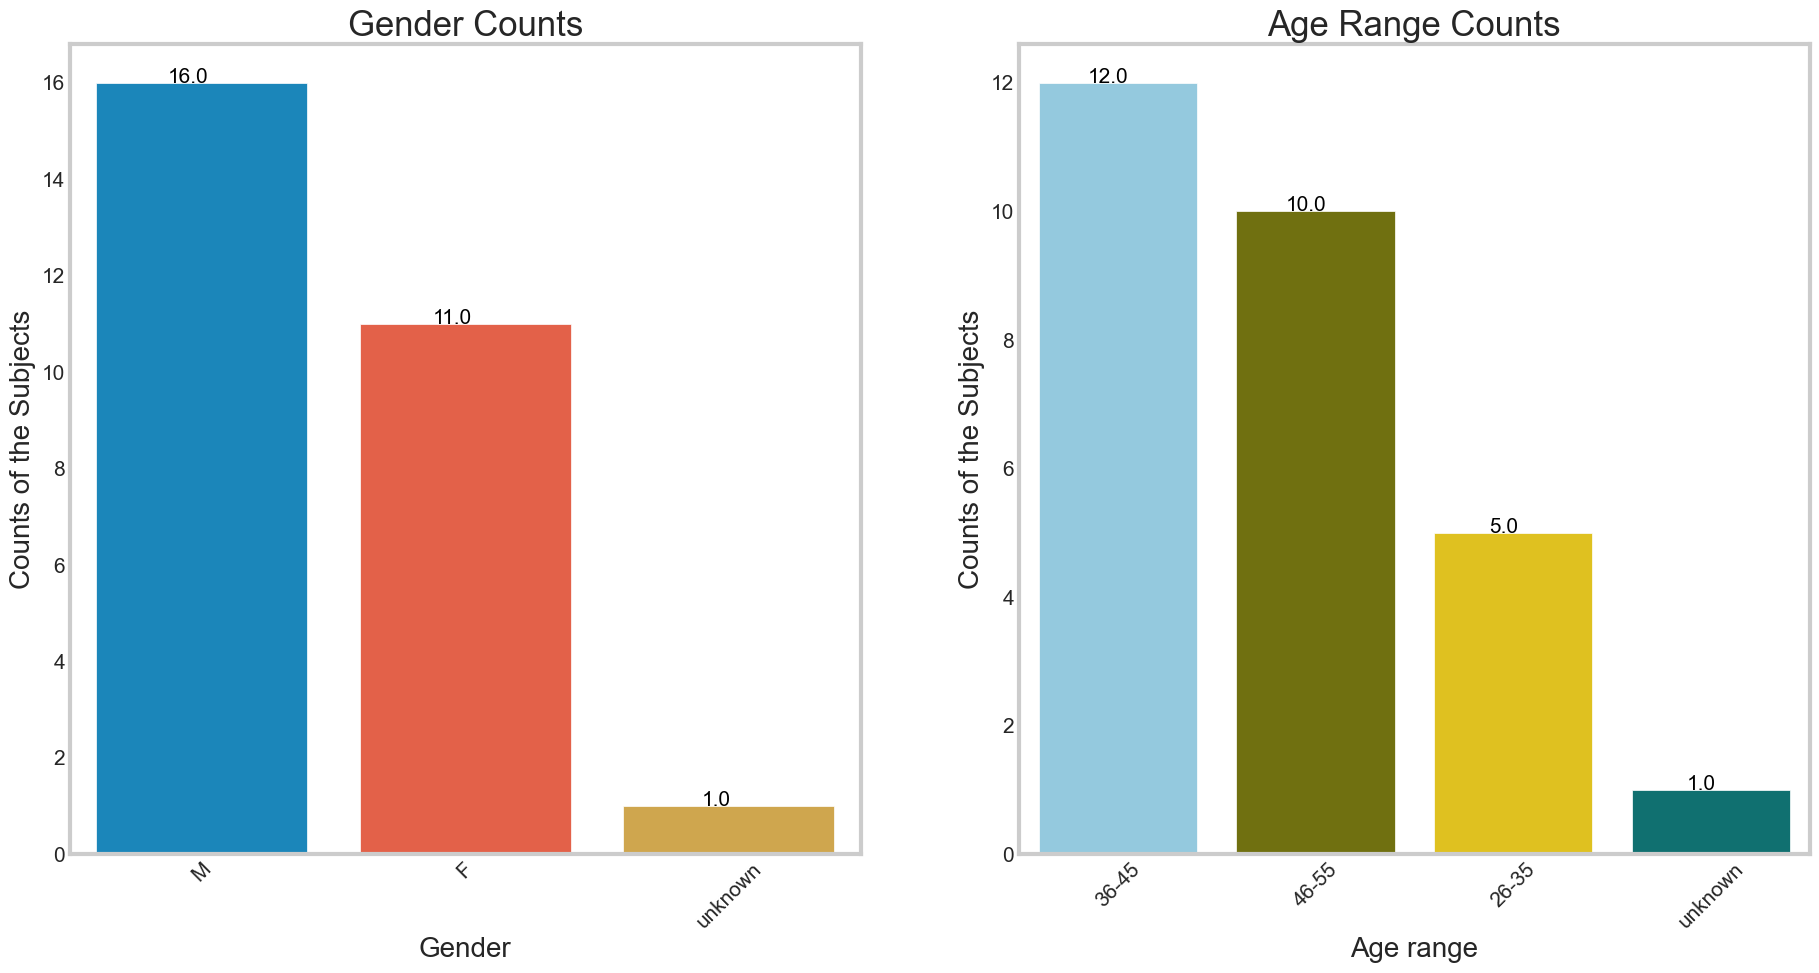

In [4]:

# Set the style of the plots
sns.set_style("whitegrid", {'axes.grid' : False})

# Create subplots for Gender and Age range

fig, axes = plt.subplots(1, 2, figsize=(20, 10))



# Plot for Gender

ax1 = sns.countplot(x='Gender', data=demo, ax=axes[0]) # Create a count plot for Gender

for p in ax1.patches: # Annotate each bar with its count value

  ax1.annotate(f'\n{p.get_height()}', (p.get_x() + 0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)

ax1.set_title("Gender Counts", size=25) # Set the title for the plot

ax1.set_xlabel("Gender", size=20) # Set the label for the x-axis

ax1.set_ylabel("Counts of the Subjects", size=20) # Set the label for the y-axis

ax1.tick_params(axis='x', rotation=45, labelsize=15) # Set the properties for the x-axis ticks

ax1.tick_params(axis='y', labelsize=15) # Set the properties for the y-axis ticks



# Plot for Age range
colors = ['skyblue', 'olive', 'gold', 'teal']

ax2 = sns.countplot(x='Age range', data=demo, ax=axes[1],palette=colors) # Create a count plot for Age range
for p in ax2.patches: # Annotate each bar with its count value
    ax2.annotate(f'\n{p.get_height()}', (p.get_x() + 0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)
ax2.set_title("Age Range Counts", size=25) # Set the title for the plot
ax2.set_xlabel("Age range", size=20) # Set the label for the x-axis
ax2.set_ylabel("Counts of the Subjects", size=20) # Set the label for the y-axis
ax2.tick_params(axis='x', rotation=45, labelsize=15) # Set the properties for the x-axis ticks
ax2.tick_params(axis='y', labelsize=15) # Set the properties for the y-axis ticks



# Display the plots

plt.show()

<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:1.5px;font-size:15px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">
 According to the graph, the demographic data indicates that there are 16 males, 11 females, and 1 individual with unknown gender. In terms of age distribution, there are 12 individuals in the 36-45 age range, 10 individuals in the 46-55 age range, 5 individuals in the 26-35 age range, and 1 individual with an unknown age.

In [5]:

# Replacing unknown values in 'Age range' with mode
age_mode = demo['Age range'].mode()[0]
demo['Age range'].replace('unknown', age_mode, inplace=True)

# Replacing unknown values in 'Gender' with mode
gender_mode = demo['Gender'].mode()[0]
demo['Gender'].replace('unknown', gender_mode, inplace=True)

demo

Subject No. Age range Gender
0             1     36-45      M
1             2     36-45      M
2             3     36-45      M
3             4     36-45      F
4             5     36-45      F
5             6     46-55      F
6             7     36-45      M
7             8     46-55      M
8             9     36-45      M
9            10     36-45      F
10           11     36-45      F
11           12     46-55      F
12           13     46-55      M
13           14     36-45      F
14           15     46-55      F
15           16     26-35      F
16           17     46-55      M
17           18     46-55      M
18           19     36-45      M
19           20     46-55      M
20           21     46-55      M
21           22     36-45      M
22           23     26-35      F
23           24     26-35      M
24           25     46-55      M
25           26     26-35      M
26           27     36-45      F
27           28     26-35      M

In [6]:
# Copy the 'fatigue' DataFrame to 'df'
df = fatigue.copy()

# Combine 'PROanswer_value' and 'PROanswer_choice' into 'Combined_Answer' column, filling missing values
df['Combined_Answer'] = df['PROanswer_value'].fillna(df['PROanswer_choice'])

# Drop the 'PROanswer_value' and 'PROanswer_choice' columns
df = df.drop(['PROanswer_value', 'PROanswer_choice'], axis=1)

# Drop rows with missing values in 'Combined_Answer'
df = df.dropna(subset=['Combined_Answer'])

# Replace values in the 'PROquestion' column with shorter labels
df['PROquestion'].replace({
    'Describe fatigue on a scale of 1 to 10, where 1 means you don’t feel tired at all and 10 means the worst tiredness you can imagine': 'VAS',
    'Are you feeling better, worse or the same as yesterday?': 'RelP',
    'Physically, today how often did you feel exhausted?': 'PhF',
    'Mentally, today how often did you feel exhausted?': 'MF',
    'Did you do sport today?': 'sport'
}, inplace=True)

# Create new columns for each 'PROquestion' with values from 'Combined_Answer'
df['VAS'] = df['Combined_Answer'].where(df['PROquestion'] == 'VAS')
df['RelP'] = df['Combined_Answer'].where(df['PROquestion'] == 'RelP')
df['PhF'] = df['Combined_Answer'].where(df['PROquestion'] == 'PhF')
df['MF'] = df['Combined_Answer'].where(df['PROquestion'] == 'MF')
df['sport'] = df['Combined_Answer'].where(df['PROquestion'] == 'sport')

# Drop the specified columns
df = df.drop(columns=['PROquestion', 'Combined_Answer'])

# Reset the index of the DataFrame
df = df.reset_index()

# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Group the data by 'DateTime' and 'Timezone' and aggregate other columns
aggregated_data = df.groupby(['DateTime', 'Timezone']).agg({
    'SubjectID': 'first',
    'VAS': 'first',
    'RelP': 'first',
    'PhF': 'first',
    'MF': 'first',
    'sport': 'first'
}).reset_index()

# Display the first few rows of the aggregated data
aggregated_data.head(10)


DateTime Timezone  SubjectID  VAS    RelP        PhF         MF  \
0 2017-12-13 21:00:00      CET         24  7.0   Worse  Regularly      Often   
1 2017-12-14 21:00:00      CET         24  6.0  Better  Regularly      Often   
2 2017-12-15 21:00:00      CET         24  5.0    Same  Regularly  Regularly   
3 2017-12-16 21:00:00      CET         24  5.0  Better  Sometimes  Sometimes   
4 2017-12-17 21:00:00      CET         24  4.0  Better  Sometimes  Sometimes   
5 2017-12-18 21:00:00      CET         24  5.0   Worse  Regularly  Sometimes   
6 2017-12-19 21:00:00      CET         23  1.0  Better      Never      Never   
7 2017-12-20 21:00:00      CET         23  1.0    Same      Never      Never   
8 2017-12-21 21:00:00      CET         23  1.0    Same      Never      Never   
9 2017-12-22 21:00:00      CET         23  1.0    Same      Never      Never   

  sport  
0  None  
1  None  
2  None  
3  None  
4  None  
5  None  
6  None  
7  None  
8  None  
9  None

In [7]:
# Rename the 'Subject No.' column to 'SubjectID' in the 'demo' dataframe
demo.rename(columns={'Subject No.': 'SubjectID'}, inplace=True)

# Merge the two DataFrames on the 'SubjectID' column
merged_data = pd.merge(aggregated_data, demo, on='SubjectID', how='inner')

# Display the merged DataFrame
merged_data


DateTime Timezone  SubjectID  VAS    RelP        PhF  \
0   2017-12-13 21:00:00      CET         24  7.0   Worse  Regularly   
1   2017-12-14 21:00:00      CET         24  6.0  Better  Regularly   
2   2017-12-15 21:00:00      CET         24  5.0    Same  Regularly   
3   2017-12-16 21:00:00      CET         24  5.0  Better  Sometimes   
4   2017-12-17 21:00:00      CET         24  4.0  Better  Sometimes   
..                  ...      ...        ...  ...     ...        ...   
474 2019-12-06 20:29:00      UTC         14  3.0  Better  Sometimes   
475 2019-06-15 20:02:00      UTC         20  6.0  Better  Regularly   
476 2019-06-17 21:58:00      UTC         20  8.0  Better  Sometimes   
477 2019-06-18 22:29:00      UTC         20  6.0   Worse  Regularly   
478 2019-06-21 07:09:00      UTC         20  6.0    Same  Regularly   

            MF sport Age range Gender  
0        Often  None     26-35      M  
1        Often  None     26-35      M  
2    Regularly  None     26-35      M  
3    Sometimes  None     26-35      M  
4    Sometimes  None     26-35      M  
..         ...   ...       ...    ...  
474  Sometimes    No     36-45      F  
475  Regularly   Yes     46-55      M  
476  Sometimes    No     46-55      M  
477  Regularly   Yes     46-55      M  
478  Sometimes    No     46-55      M  

[479 rows x 10 columns]

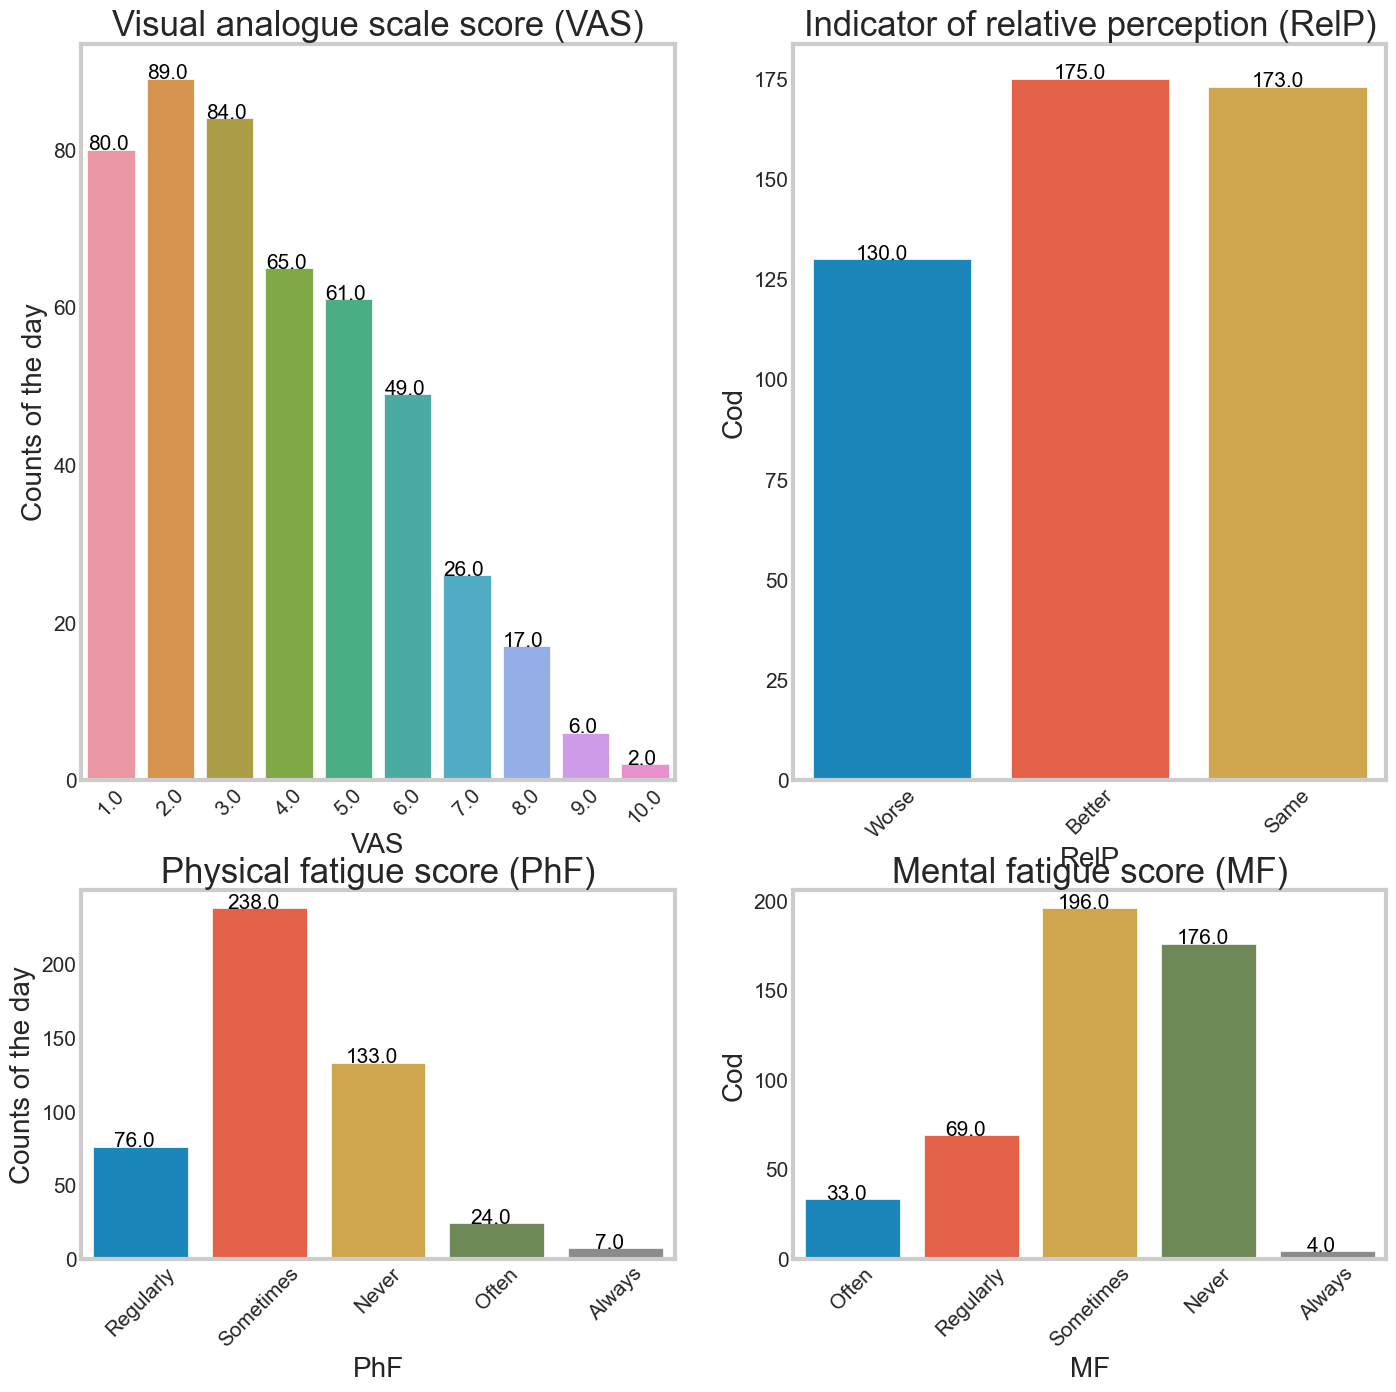

In [8]:
# Set the style of the plots
sns.set_style("whitegrid", {'axes.grid' : False})

# Create a 2x2 grid of subplots with adjusted height ratios
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])

# Define the column names and corresponding titles
columns_and_titles = {
    'VAS': "Visual analogue scale score (VAS)",
    'RelP': "Indicator of relative perception (RelP)",
    "PhF": "Physical fatigue score (PhF)",
    'MF': "Mental fatigue score (MF)",
}


# Loop through the columns and titles
for i, (column, title) in enumerate(columns_and_titles.items()):
    ax = fig.add_subplot(gs[i])
    sns.countplot(x=column, data=merged_data, ax=ax)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)
    ax.set_title(title, size=25)
    ax.set_xlabel(column, size=20)
    ax.set_ylabel("Counts of the day" if i % 2 == 0 else "Cod", size=20)
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.show()


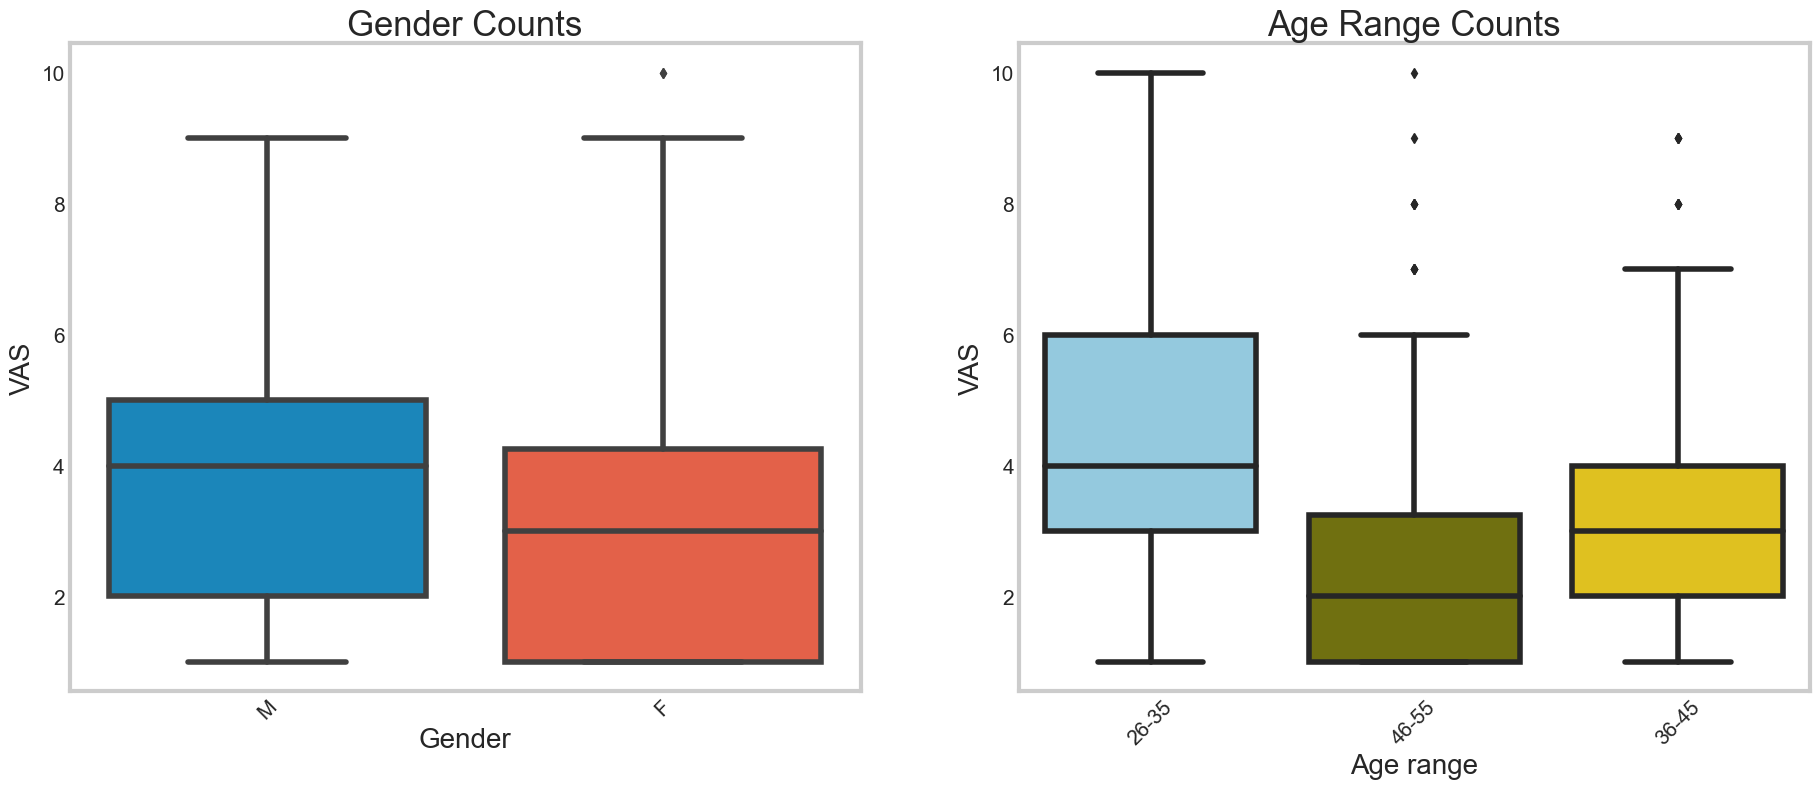

In [9]:
# Set the style of the plots
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axes = plt.subplots(1, 2, figsize=(20,8))

# Plot for Gender and VAS
ax1 = sns.boxplot(x='Gender', y="VAS", data=merged_data, ax=axes[0])
ax1.set_title("Gender Counts", size=25)
ax1.set_xlabel("Gender", size=20)
ax1.set_ylabel("VAS", size=20)
ax1.tick_params(axis='x', rotation=45, labelsize=15)
ax1.tick_params(axis='y', labelsize=15)


# Plot for Age range and VAS 
colors = ['skyblue', 'olive', 'gold', 'teal']
ax2 = sns.boxplot(x='Age range', y="VAS", data=merged_data, ax=axes[1],palette=colors)
ax2.set_title("Age Range Counts", size=25)
ax2.set_xlabel("Age range", size=20)
ax2.set_ylabel("VAS", size=20)
ax2.tick_params(axis='x', rotation=45, labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

plt.show()


<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:1.5px;font-size:15px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">

## Documentation of Dataset Columns

1. **Sensor Parameter:**
   - **Description:** Indicates the specific sensor used for data collection.
   - **Unit:** N/A

2. **Accelerometer:**
   - **ActivityClass:**
     - Categorical parameter indicating the type of physical activity:
       - 0: Undefined
       - 1: Resting
       - 9: Other
       - 10: Biking
       - 11: Running
       - 12: Walking
   - **ActivityCounts:**
     - The activity value indicates the intensity of motion (activity).
   - **Steps:**
     - Number of steps.
   - **Energy Expenditure:**
     - Amount of energy a person uses to complete all regular bodily functions, measured in calories.
   - **Calories:**
     - The amount of calories expended.

3. **Photoplethysmography:**
   - **HR (Heart Rate):**
     - The rate at which the heart beats.
     - **Unit:** bpm (beats per minute).
   - **HRV (Heart Rate Variability):**
     - Indicates the beat-to-beat variations in heart rate.
     - **Unit:** ms (milliseconds).
   - **RESP (Respiration Rate):**
     - The number of breaths a person takes per minute.
     - **Unit:** bpm (breaths per minute).
   - **Blood Perfusion:**
     - The change in blood volume percentage in local tissue resulting from a heartbeat.
   - **Blood Pulse Wave Temperature:**
     - Skin temperature measured during the pulse wave generated by blood ejection when the heart contracts.
     - **Unit:** "C (degrees Celsius).

4. **Galvanic Skin Response:**
   - **Galvanic Skin Response (GSR):**
     - Describes changes in the electrical conductivity of the skin, serving as a measure of emotional arousal.
     - **Unit:** kOhm (kiloohms).

5. **Barometer:**
   - **Barometer:**
     - Measures changes in barometric pressure, often indicating changes in altitude.
     - **Unit:** mbar (millibars).

Additional Abbreviations: HR (Heart Rate), HRV (Heart Rate Variability), RESP (Respiration Rate), SD (Standard Deviation), Max (Maximum), PSD (Power Spectral Density).

In [10]:
# Rename the 'Source' column to 'SubjectID' in the 'combined_df' dataframe
combined_df.rename(columns={'Source': 'SubjectID'}, inplace=True)

# Drop rows from the DataFrame with at least 3 non-NA values
combined_df = combined_df.dropna(axis=0, thresh=3)

# Replace missing values in the 'ActivityClass' column with 0
combined_df['ActivityClass'].fillna(0, inplace=True)

# Mapping dictionary for 'ActivityClass' values
mapping_dict = {0: 'undefined', 1: 'resting', 9: 'other', 10: 'biking', 11: 'running', 12: 'walking'}
combined_df['ActivityClass'] = combined_df['ActivityClass'].replace(mapping_dict)

# Print the unique values in the 'ActivityClass' column
print(combined_df["ActivityClass"].unique())


['undefined' 'resting' 'biking' 'running' 'walking' 'other']


In [11]:
combined_df.head()

Timestamp  ActivityCounts  Barometer  BloodPerfusion  BloodPulseWave  \
0  14.03.19 14:38        0.784314     981.25           0.000            0.00   
1  14.03.19 14:39        1.176471     981.20           0.175            1.90   
2  14.03.19 14:40        2.352941     981.20           0.190            1.82   
3  14.03.19 14:41        1.176471     981.10           0.110            1.94   
4  14.03.19 14:42        1.176471     981.20           0.100            1.68   

   EnergyExpenditure  GalvanicSkinResponse         HR  HRV       RESP  Steps  \
0         753.636566                   NaN  83.000000  NaN        NaN    0.0   
1        1256.060944                   NaN  75.403633  NaN        NaN    0.0   
2        1256.060944                   NaN  69.112653  NaN  14.562500    0.0   
3        1256.060944                   NaN  69.781164  NaN  12.175528    0.0   
4        1256.060944                   NaN  72.306609  NaN  12.531234    0.0   

   SkinTemperature    SubjectID ActivityClass  
0           28.280  subjectID_1     undefined  
1           29.440  subjectID_1     undefined  
2           30.410  subjectID_1     undefined  
3           31.000  subjectID_1     undefined  
4           31.455  subjectID_1     undefined

In [12]:
combined_df.describe().round(2).T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=["mean",], color='Orange')\
                     .bar(subset=['std'], color='pink')\
                     .bar(subset=['50%'], color='magenta')

In [13]:

combined_df1=combined_df.copy()

# Print the updated DataFrame
print(combined_df)


              Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0        14.03.19 14:38        0.784314     981.25           0.000   
1        14.03.19 14:39        1.176471     981.20           0.175   
2        14.03.19 14:40        2.352941     981.20           0.190   
3        14.03.19 14:41        1.176471     981.10           0.110   
4        14.03.19 14:42        1.176471     981.20           0.100   
...                 ...             ...        ...             ...   
1355470  13.05.19 09:54        2.352941    1000.60           0.325   
1355471  13.05.19 09:55        7.450980    1000.40           0.385   
1355472  13.05.19 09:56        3.529412    1000.40           0.440   
1355473  13.05.19 09:57        0.784314    1000.35           0.475   
1355474  13.05.19 09:58       11.372549    1000.40           0.710   

         BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0                  0.00         753.636566                   NaN  83.000000   
1

In [14]:
combined_df

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0        14.03.19 14:38        0.784314     981.25           0.000   
1        14.03.19 14:39        1.176471     981.20           0.175   
2        14.03.19 14:40        2.352941     981.20           0.190   
3        14.03.19 14:41        1.176471     981.10           0.110   
4        14.03.19 14:42        1.176471     981.20           0.100   
...                 ...             ...        ...             ...   
1355470  13.05.19 09:54        2.352941    1000.60           0.325   
1355471  13.05.19 09:55        7.450980    1000.40           0.385   
1355472  13.05.19 09:56        3.529412    1000.40           0.440   
1355473  13.05.19 09:57        0.784314    1000.35           0.475   
1355474  13.05.19 09:58       11.372549    1000.40           0.710   

         BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0                  0.00         753.636566                   NaN  83.000000   
1                  1.90        1256.060944                   NaN  75.403633   
2                  1.82        1256.060944                   NaN  69.112653   
3                  1.94        1256.060944                   NaN  69.781164   
4                  1.68        1256.060944                   NaN  72.306609   
...                 ...                ...                   ...        ...   
1355470            2.30        1649.145098                   NaN  78.681343   
1355471            2.16        1479.952673                   NaN  74.764512   
1355472            2.56        1482.794317                   NaN  76.447207   
1355473            2.04        1356.516672                   NaN  69.102764   
1355474            1.58        1042.613398                   NaN  58.603489   

         HRV       RESP  Steps  SkinTemperature    SubjectID ActivityClass  
0        NaN        NaN    0.0           28.280  subjectID_1     undefined  
1        NaN        NaN    0.0           29.440  subjectID_1     undefined  
2        NaN  14.562500    0.0           30.410  subjectID_1     undefined  
3        NaN  12.175528    0.0           31.000  subjectID_1     undefined  
4        NaN  12.531234    0.0           31.455  subjectID_1     undefined  
...      ...        ...    ...              ...          ...           ...  
1355470  NaN        NaN  103.0           32.765  subjectID_9     undefined  
1355471  NaN  16.864421   16.0           32.440  subjectID_9     undefined  
1355472  NaN  19.536303   91.0           32.310  subjectID_9     undefined  
1355473  NaN  16.578595   13.0           32.280  subjectID_9     undefined  
1355474  NaN  14.363160    0.0           32.440  subjectID_9     undefined  

[621455 rows x 14 columns]

In [15]:
# Compute the mean of the columns grouped by 'SubjectID' after dropping the 'Timestamp' column
grouped_df = combined_df.drop(columns=["Timestamp","ActivityClass"]).groupby('SubjectID').mean()

# Reset the index of the grouped DataFrame
sensor_mean = grouped_df.reset_index()

# Extract the numerical part from the 'SubjectID' column
sensor_mean['SubjectID'] = sensor_mean['SubjectID'].str.split('_').str[-1]

# Convert the 'SubjectID' column to the integer type
sensor_mean["SubjectID"] = sensor_mean["SubjectID"].astype(int)

# Display the resulting DataFrame
sensor_mean


SubjectID  ActivityCounts    Barometer  BloodPerfusion  BloodPulseWave  \
0           1        2.999559   990.908911        0.797459        2.304574   
1          10        1.569208   982.963060        0.290574        2.630942   
2          11        1.620235   987.446956        0.629933        2.931781   
3          12        1.788006   986.075617        0.595932        2.774894   
4          13        1.681558   971.551948        0.516290        3.152881   
5          14        2.324007   983.996915        0.314798        2.591985   
6          15        1.832062   968.399128        0.554572        2.259567   
7          16        2.109063   972.754433        0.407326        3.117808   
8          17        2.217265   981.251407        0.318849        2.621480   
9          18        1.777181   973.786294        0.136281        2.269280   
10         19        1.986455  1000.128776        0.348810        2.329091   
11          2        2.524812   986.785802        1.259691        3.136975   
12         20        2.420606   986.154082        0.354958        2.350389   
13         21        2.256555   981.779098        0.428448        2.751798   
14         22        2.069103  1002.102173        0.360055        2.010155   
15         23        1.675379   985.206447        0.649558        2.478456   
16         24        2.443365   982.682686        0.681407        1.977849   
17         25        2.320780   978.227229        0.506408        2.268109   
18         26        1.788182   985.164658        0.529882        2.020943   
19         27        1.830312   973.284564        0.372455        3.071782   
20         28        2.865716   986.315037        0.479019        2.658575   
21          3        1.737116   988.173002        0.531595        2.620041   
22          4        1.685263   975.585645        0.620368        3.816388   
23          5        1.955609   982.408192        0.281437        3.293642   
24          6        1.872406   978.114179        0.318697        2.592502   
25          7        1.490615   976.458033        0.332601        2.586591   
26          8        1.653204   982.607718        0.448504        2.365536   
27          9        2.194409   983.649008        0.553944        1.933509   

    EnergyExpenditure  GalvanicSkinResponse         HR        HRV       RESP  \
0         1669.803907              2.624895  70.982768  43.456308  16.146793   
1         1466.535033              3.190392  71.581499  36.253956  15.560580   
2         1473.696392              4.067691  76.291536  31.237173  17.664682   
3         1480.696209              3.718540  71.909244  43.961676  15.688016   
4         1591.761059              2.538715  78.686191  28.578320  18.519254   
5         1847.165269              2.611036  78.136768  31.572390  16.971608   
6         1418.732029              3.930262  62.194794  37.781901  17.055998   
7         1672.188664              3.607727  81.830177  36.006630  18.909157   
8         1536.893216              2.779721  74.705605  25.346171  17.543928   
9         1423.815938              1.533528  73.046954  81.831717  14.417784   
10        1414.813336              2.890503  68.581333  39.150331  15.254585   
11        1865.539072                   NaN  82.753233  41.177052  17.355408   
12        1591.969749              1.344872  68.799810  35.256242  14.922665   
13        1476.983058              1.261502  72.747852  31.348538  17.209080   
14        1486.135120              1.828231  66.085860  48.922499  18.051053   
15        1746.287960              1.758394  71.457713  46.973677  17.297404   
16        2958.929146              1.833747  67.689378  50.342703  14.529793   
17        2447.161502              2.753851  73.984162  33.289726  16.157230   
18        1769.070825              1.998524  64.957106  55.962566  15.710398   
19        1526.663600              2.902822  72.877992  46.613334  16.785156   
20        1844.720776              1.258953  80.623689  43.09

In [16]:
sensor_mean.describe().T

count         mean         std          min  \
SubjectID              28.0    14.500000    8.225975     1.000000   
ActivityCounts         28.0     2.024573    0.387553     1.490615   
Barometer              28.0   982.641464    7.692097   968.399128   
BloodPerfusion         28.0     0.486423    0.211945     0.136281   
BloodPulseWave         28.0     2.604197    0.445424     1.933509   
EnergyExpenditure      28.0  1685.552913  336.463275  1412.364878   
GalvanicSkinResponse   26.0     2.560672    0.819551     1.258953   
HR                     28.0    74.271726    7.502275    62.194794   
HRV                    28.0    40.014263   11.036649    25.346171   
RESP                   28.0    17.157578    1.853249    14.417784   
Steps                  28.0     4.851593    1.965932     2.165543   
SkinTemperature        28.0    34.209834    0.946313    31.608410   

                              25%          50%          75%          max  
SubjectID                7.750000    14.500000    21.250000    28.000000  
ActivityCounts           1.724153     1.914008     2.272612     2.999559  
Barometer              977.700142   982.822873   986.194321  1002.102173  
BloodPerfusion           0.344758     0.463761     0.564912     1.259691  
BloodPulseWave           2.295750     2.592243     2.814116     3.816388  
EnergyExpenditure     1479.767921  1564.327138  1800.608740  2958.929146  
GalvanicSkinResponse     1.853899     2.634905     3.078860     4.067691  
HR                      69.714389    72.962473    78.274124    93.133489  
HRV                     32.860392    38.349863    43.908463    81.831717  
RESP                    15.704802    17.132539    18.168103    22.206830  
Steps                    3.439580     4.257114     6.033227     9.042524  
SkinTemperature         33.747278    34.273273    34.898142    35.972384

In [17]:
# Mapping for RelP
relp_mapping = {'Worse': -1, 'Same': 0, 'Better': 1}
merged_data['RelP'] = merged_data['RelP'].map(relp_mapping)

# Mapping for PhF and MF
phf_mapping = {'Never': 0, 'Sometimes': 1, 'Regularly': 1, 'Often': 1, 'Always': 1}
mf_mapping = {'Never': 0, 'Sometimes': 1, 'Regularly': 1, 'Often': 1, 'Always': 1}
merged_data['PhF'] = merged_data['PhF'].map(phf_mapping)
merged_data['MF'] = merged_data['MF'].map(mf_mapping)

# Mapping for VAS
merged_data.loc[(merged_data['VAS'] >= 1) & (merged_data['VAS'] <= 4), 'VAS'] = 0
merged_data.loc[(merged_data['VAS'] >= 5) & (merged_data['VAS'] <= 10), 'VAS'] = 1

# Group by 'SubjectID' and compute the mean after dropping specified columns
grouped_df = merged_data.drop(columns=['DateTime', 'Timezone', 'sport', 'Age range', 'Gender']).groupby('SubjectID').mean()

# Reset the index of the grouped DataFrame
fatigue_mean = grouped_df.reset_index()

# Display the resulting DataFrame
fatigue_mean

SubjectID       VAS      RelP       PhF        MF
0           1       0.0 -0.142857  0.571429  0.428571
1           2  0.571429  0.000000  0.714286  0.714286
2           3     0.625  0.125000  0.250000  0.625000
3           4       0.0  0.250000  0.375000  0.375000
4           5  0.714286  0.571429  0.857143  0.714286
5           6  0.666667  0.166667  0.833333  0.833333
6           7       0.0  0.500000  0.500000  0.000000
7           8       0.3  0.500000  0.800000  0.600000
8           9       1.0  0.142857  0.428571  0.000000
9          10       0.0  0.333333  0.666667  0.333333
10         11  0.857143  0.285714  0.857143  0.857143
11         12     0.875  0.375000  0.875000  1.000000
12         13       0.0  0.375000  0.250000  0.375000
13         14       0.0  0.571429  1.000000  0.857143
14         15  0.083333 -0.181818  0.818182  0.363636
15         16     0.125  0.000000  0.750000  0.875000
16         17       0.0  0.250000  0.375000  0.500000
17         18       0.0  0.200000  0.200000  0.500000
18         19  0.428571  0.000000  1.000000  0.714286
19         20       1.0  0.250000  1.000000  1.000000
20         21       0.0  0.000000  0.500000  0.000000
21         22  0.222222  0.222222  0.777778  0.777778
22         23  0.351351  0.121622  0.554054  0.554054
23         24  0.520408  0.010204  0.948980  0.877551
24         25       0.0 -0.076923  0.653846  0.461538
25         26  0.586957 -0.021739  0.956522  0.934783
26         27  0.032258  0.048387  0.661290  0.338710
27         28       0.5  0.166667  0.333333  0.833333

In [18]:
sensor_data = pd.merge(sensor_mean, demo, on='SubjectID', how="inner")
sensor_data = sensor_data[sensor_data['Age range'] != 'unknown']
sensor_data

SubjectID  ActivityCounts    Barometer  BloodPerfusion  BloodPulseWave  \
0           1        2.999559   990.908911        0.797459        2.304574   
1          10        1.569208   982.963060        0.290574        2.630942   
2          11        1.620235   987.446956        0.629933        2.931781   
3          12        1.788006   986.075617        0.595932        2.774894   
4          13        1.681558   971.551948        0.516290        3.152881   
5          14        2.324007   983.996915        0.314798        2.591985   
6          15        1.832062   968.399128        0.554572        2.259567   
7          16        2.109063   972.754433        0.407326        3.117808   
8          17        2.217265   981.251407        0.318849        2.621480   
9          18        1.777181   973.786294        0.136281        2.269280   
10         19        1.986455  1000.128776        0.348810        2.329091   
11          2        2.524812   986.785802        1.259691        3.136975   
12         20        2.420606   986.154082        0.354958        2.350389   
13         21        2.256555   981.779098        0.428448        2.751798   
14         22        2.069103  1002.102173        0.360055        2.010155   
15         23        1.675379   985.206447        0.649558        2.478456   
16         24        2.443365   982.682686        0.681407        1.977849   
17         25        2.320780   978.227229        0.506408        2.268109   
18         26        1.788182   985.164658        0.529882        2.020943   
19         27        1.830312   973.284564        0.372455        3.071782   
20         28        2.865716   986.315037        0.479019        2.658575   
21          3        1.737116   988.173002        0.531595        2.620041   
22          4        1.685263   975.585645        0.620368        3.816388   
23          5        1.955609   982.408192        0.281437        3.293642   
24          6        1.872406   978.114179        0.318697        2.592502   
25          7        1.490615   976.458033        0.332601        2.586591   
26          8        1.653204   982.607718        0.448504        2.365536   
27          9        2.194409   983.649008        0.553944        1.933509   

    EnergyExpenditure  GalvanicSkinResponse         HR        HRV       RESP  \
0         1669.803907              2.624895  70.982768  43.456308  16.146793   
1         1466.535033              3.190392  71.581499  36.253956  15.560580   
2         1473.696392              4.067691  76.291536  31.237173  17.664682   
3         1480.696209              3.718540  71.909244  43.961676  15.688016   
4         1591.761059              2.538715  78.686191  28.578320  18.519254   
5         1847.165269              2.611036  78.136768  31.572390  16.971608   
6         1418.732029              3.930262  62.194794  37.781901  17.055998   
7         1672.188664              3.607727  81.830177  36.006630  18.909157   
8         1536.893216              2.779721  74.705605  25.346171  17.543928   
9         1423.815938              1.533528  73.046954  81.831717  14.417784   
10        1414.813336              2.890503  68.581333  39.150331  15.254585   
11        1865.539072                   NaN  82.753233  41.177052  17.355408   
12        1591.969749              1.344872  68.799810  35.256242  14.922665   
13        1476.983058              1.261502  72.747852  31.348538  17.209080   
14        1486.135120              1.828231  66.085860  48.922499  18.051053   
15        1746.287960              1.758394  71.457713  46.973677  17.297404   
16        2958.929146              1.833747  67.689378  50.342703  14.529793   
17        2447.161502              2.753851  73.984162  33.289726  16.157230   
18        1769.070825              1.998524  64.957106  55.962566  15.710398   
19        1526.663600              2.902822  72.877992  46.613334  16.785156   
20        1844.720776              1.258953  80.623689  43.09

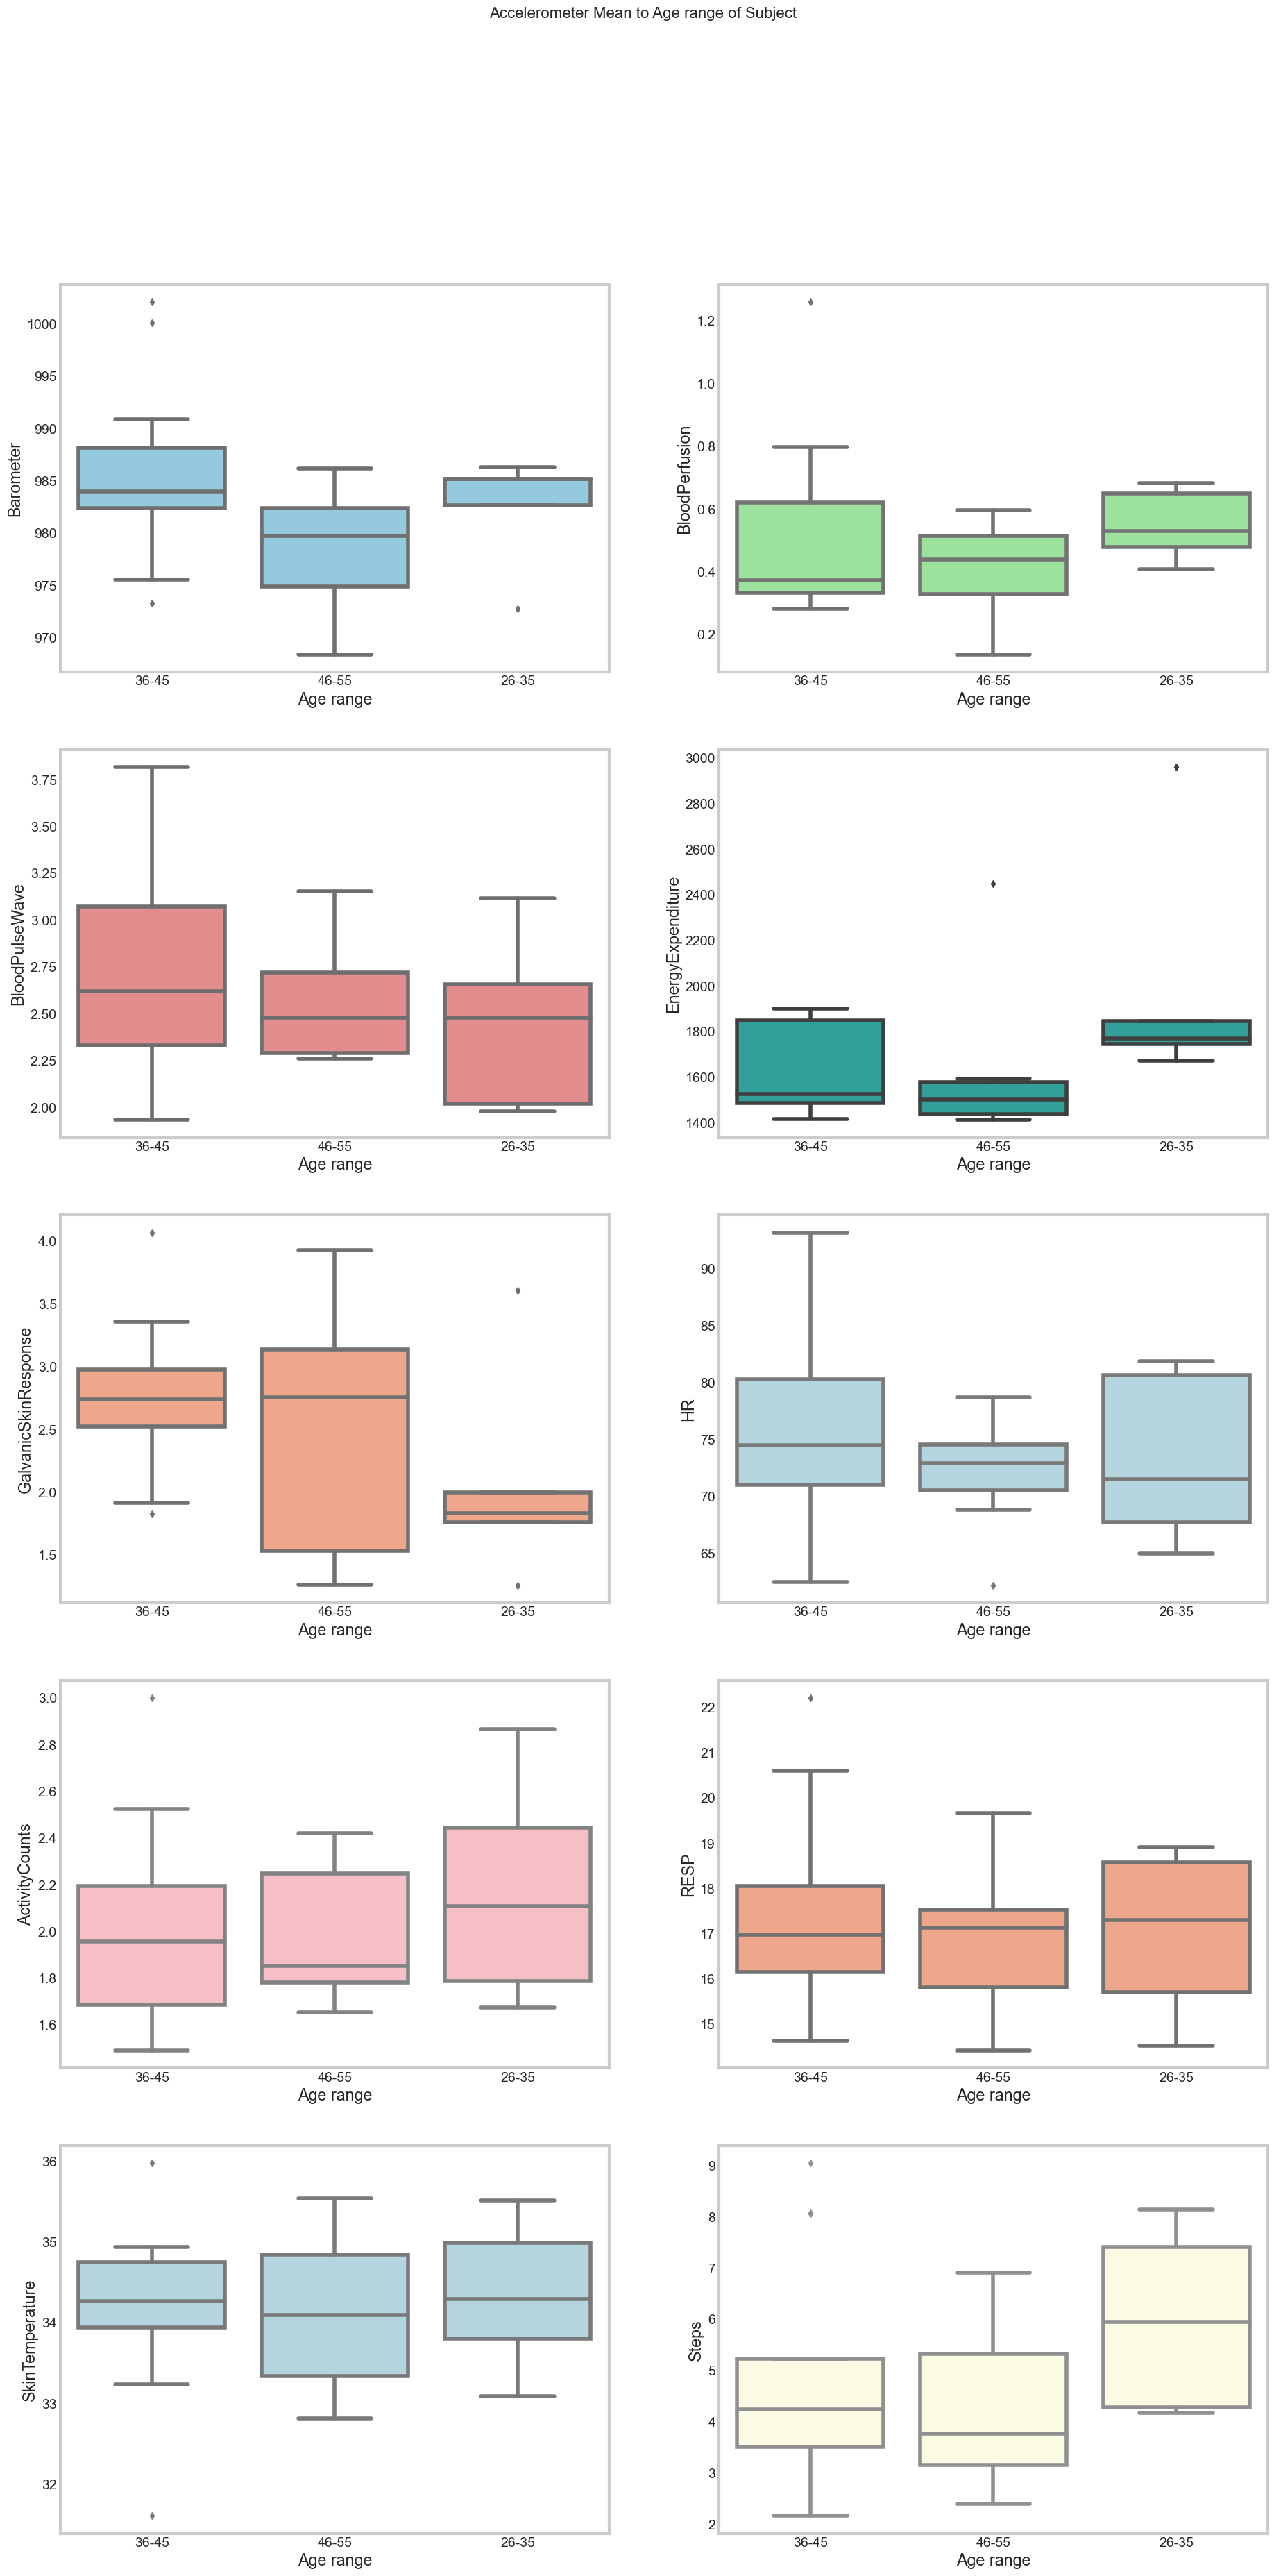

In [19]:
# Set the style of the plots
sns.set_style("whitegrid", {'axes.grid' : False})

combined_df=sensor_data.copy()
fig, axes = plt.subplots(5, 2, figsize=(20, 40))

# Plot for each activity class against gender
sns.boxplot(x='Age range', y='Barometer', data=combined_df, ax=axes[0, 0], color='skyblue')
sns.boxplot(x='Age range', y='BloodPerfusion', data=combined_df, ax=axes[0, 1], color='lightgreen')
sns.boxplot(x='Age range', y='BloodPulseWave', data=combined_df, ax=axes[1, 0], color='lightcoral')
sns.boxplot(x='Age range', y='EnergyExpenditure', data=combined_df, ax=axes[1, 1], color='lightseagreen')
sns.boxplot(x='Age range', y='GalvanicSkinResponse', data=combined_df, ax=axes[2, 0], color='lightsalmon')
sns.boxplot(x='Age range', y='HR', data=combined_df, ax=axes[2, 1], color='lightblue')

# Plot for ActivityCounts against gender
sns.boxplot(x='Age range', y='ActivityCounts', data=combined_df, ax=axes[3, 0], color='lightpink')

sns.boxplot(x='Age range', y='RESP', data=combined_df, ax=axes[3, 1], color='lightsalmon')
sns.boxplot(x='Age range', y='SkinTemperature', data=combined_df, ax=axes[4, 0], color='lightblue')

# Plot for Steps against 
sns.boxplot(x='Age range', y='Steps', data=combined_df, ax=axes[4, 1], color='lightyellow')



fig.suptitle("Accelerometer Mean to Age range of Subject", fontsize=16)
plt.show()



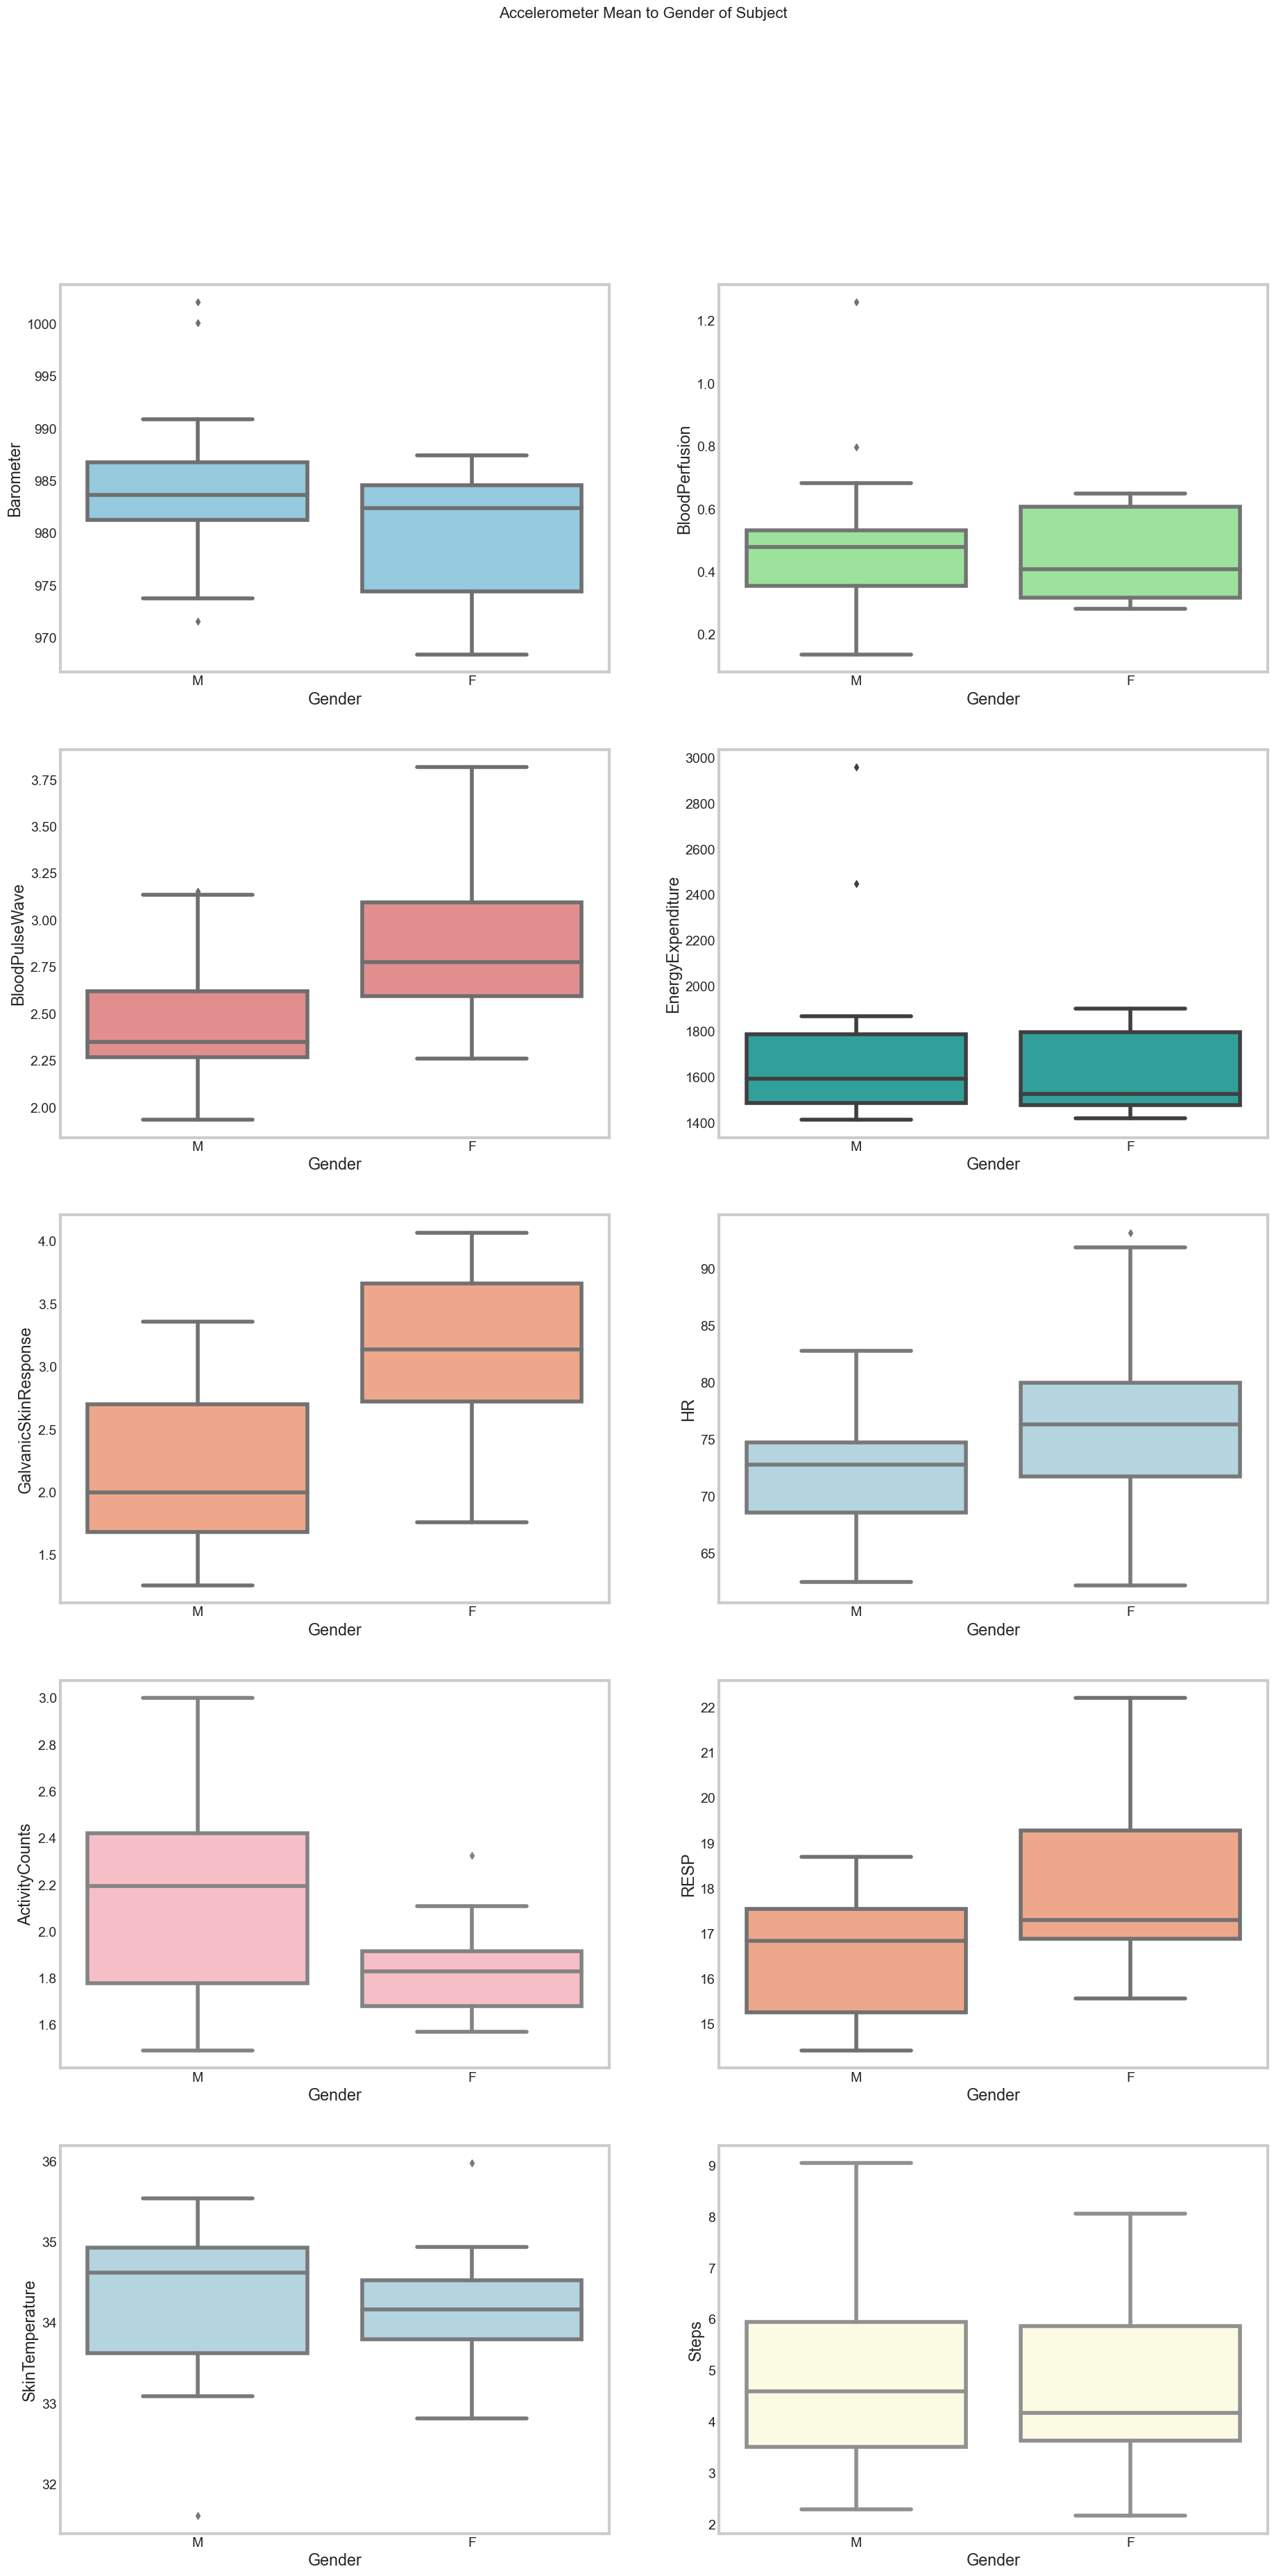

In [20]:
# Set the style of the plots
sns.set_style("whitegrid", {'axes.grid' : False})


fig, axes = plt.subplots(5, 2, figsize=(20, 40))

# Plot for each activity class against gender
sns.boxplot(x='Gender', y='Barometer', data=combined_df, ax=axes[0, 0], color='skyblue')
sns.boxplot(x='Gender', y='BloodPerfusion', data=combined_df, ax=axes[0, 1], color='lightgreen')
sns.boxplot(x='Gender', y='BloodPulseWave', data=combined_df, ax=axes[1, 0], color='lightcoral')
sns.boxplot(x='Gender', y='EnergyExpenditure', data=combined_df, ax=axes[1, 1], color='lightseagreen')
sns.boxplot(x='Gender', y='GalvanicSkinResponse', data=combined_df, ax=axes[2, 0], color='lightsalmon')
sns.boxplot(x='Gender', y='HR', data=combined_df, ax=axes[2, 1], color='lightblue')

# Plot for ActivityCounts against gender
sns.boxplot(x='Gender', y='ActivityCounts', data=combined_df, ax=axes[3, 0], color='lightpink')

sns.boxplot(x='Gender', y='RESP', data=combined_df, ax=axes[3, 1], color='lightsalmon')
sns.boxplot(x='Gender', y='SkinTemperature', data=combined_df, ax=axes[4, 0], color='lightblue')

# Plot for Steps against gender
sns.boxplot(x='Gender', y='Steps', data=combined_df, ax=axes[4, 1], color='lightyellow')



fig.suptitle("Accelerometer Mean to Gender of Subject", fontsize=16)
plt.show()


In [21]:
sensor_data_fat = pd.merge(sensor_data, fatigue_mean, on='SubjectID', how="inner")
sensor_data_fat=sensor_data_fat[['ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature','Age range',
       'Gender', 'VAS', 'RelP', 'PhF', 'MF']]

# Assuming '36-45' is an 'Age range' category
age_mapping = {'36-45': 1, '26-35': 2,  '46-55': 3}
gender_mapping={"M":1, "F":0}
sensor_data_fat['Age range'] = sensor_data_fat['Age range'].map(age_mapping)
sensor_data_fat['Gender'] = sensor_data_fat['Gender'].map(gender_mapping)



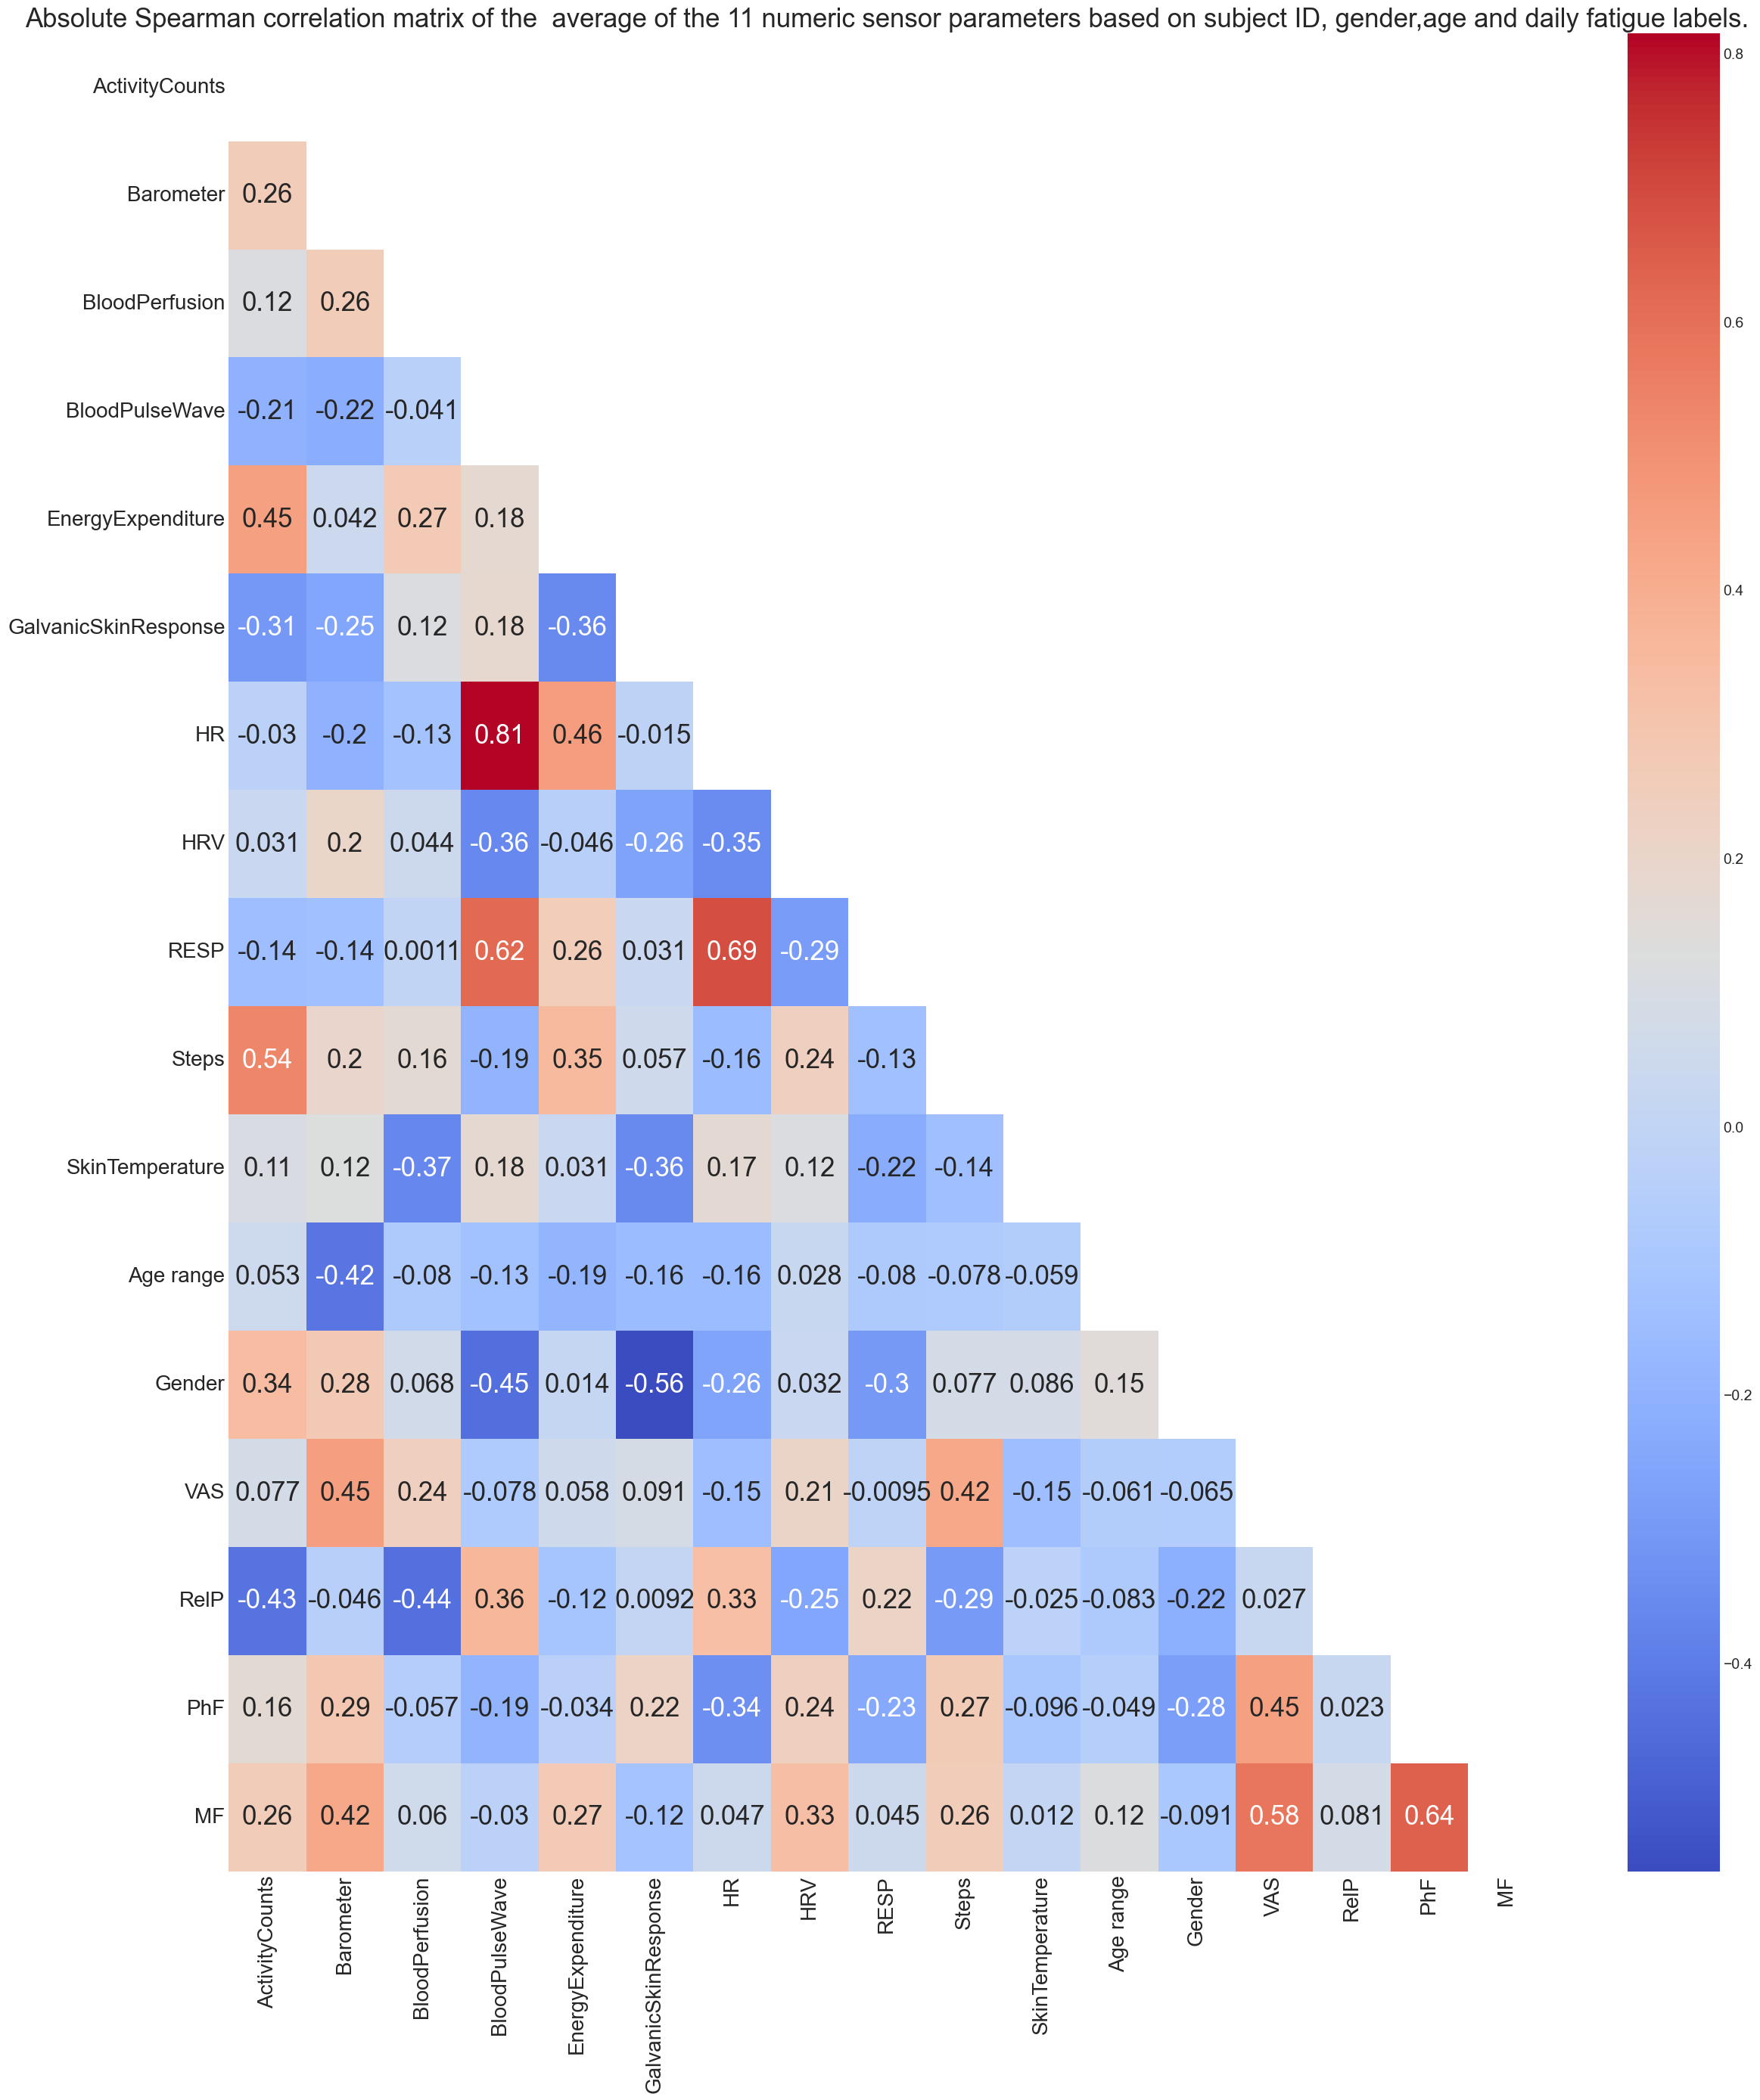

In [22]:
# Calculate the Spearman correlation
matrix = np.triu(sensor_data_fat.corr(method='spearman'))


# Create the heatmap
plt.figure(figsize=(25,30))
sns.heatmap(sensor_data_fat.corr(method='spearman'), annot=True, mask=matrix, cmap='coolwarm',annot_kws={"size": 25})
plt.title('Absolute Spearman correlation matrix of the  average of the 11 numeric sensor parameters based on subject ID, gender,age and daily fatigue labels.', size=25)
plt.xticks(size=20)  # Change the size of the x-axis tick labels
plt.yticks(size=20)
plt.show()


In [22]:
sensor_data_fat.corr(method='spearman')

ActivityCounts  Barometer  BloodPerfusion  \
ActivityCounts              1.000000   0.262178        0.116037   
Barometer                   0.262178   1.000000        0.263273   
BloodPerfusion              0.116037   0.263273        1.000000   
BloodPulseWave             -0.206897  -0.220580       -0.041051   
EnergyExpenditure           0.447729   0.042146        0.269294   
GalvanicSkinResponse       -0.306667  -0.251966        0.117265   
HR                         -0.029557  -0.204707       -0.126437   
HRV                         0.030651   0.202518        0.044335   
RESP                       -0.143404  -0.136289        0.001095   
Steps                       0.535851   0.198686        0.164204   
SkinTemperature             0.108374   0.124795       -0.365079   
Age range                   0.052548  -0.422167       -0.080158   
Gender                      0.339485   0.276114        0.067897   
VAS                         0.076750   0.454617        0.237533   
RelP                       -0.431551  -0.045816       -0.440879   
PhF                         0.163562   0.290137       -0.056712   
MF                          0.263469   0.421385        0.060315   

                      BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse  \
ActivityCounts             -0.206897           0.447729             -0.306667   
Barometer                  -0.220580           0.042146             -0.251966   
BloodPerfusion             -0.041051           0.269294              0.117265   
BloodPulseWave              1.000000           0.176245              0.182906   
EnergyExpenditure           0.176245           1.000000             -0.357265   
GalvanicSkinResponse        0.182906          -0.357265              1.000000   
HR                          0.814997           0.460317             -0.014701   
HRV                        -0.358511          -0.045977             -0.262906   
RESP                        0.617953           0.255610              0.031111   
Steps                      -0.191571           0.345375              0.057094   
SkinTemperature             0.175698           0.030651             -0.355214   
Age range                  -0.130035          -0.187927             -0.158676   
Gender                     -0.448120           0.013579             -0.555329   
VAS                        -0.077870           0.058263              0.091172   
RelP                        0.363787          -0.116324              0.009248   
PhF                        -0.194247          -0.033973              0.219446   
MF                         -0.030432           0.271145             -0.119521   

                            HR       HRV      RESP     Steps  SkinTemperature  \
ActivityCounts       -0.029557  0.030651 -0.143404  0.535851         0.108374   
Barometer            -0.204707  0.202518 -0.136289  0.198686         0.124795   
BloodPerfusion       -0.126437  0.044335  0.001095  0.164204        -0.365079   
BloodPulseWave        0.814997 -0.358511  0.617953 -0.191571         0.175698   
EnergyExpenditure     0.460317 -0.045977  0.255610  0.345375         0.030651   
GalvanicSkinResponse -0.014701 -0.262906  0.031111  0.057094        -0.355214   
HR                    1.000000 -0.349206  0.686918 -0.158183         0.169677   
HRV                  -0.349206  1.000000 -0.287904  0.240285         0.117679   
RESP                  0.686918 -0.287904  1.000000 -0.133552        -0.223864   
Steps                -0.158183  0.240285 -0.133552  1.000000        -0.142857   
SkinTemperature       0.169677  0.117679 -0.223864 -0.142857         1.000000   
Age range            -0.156754  0.027610 -0.080158 -0.078377        -0.058783   
Gender               -0.258008  0.031685 -0.303273  0.076950         0.086003   
VAS                  -0.148178  0.206441 -0.009524  0.423805        -0.146497   
RelP                  0.326201 -0.253499  0.215090 -0.294651        -0.024966   
PhF                  -0.337260  0.241370 -0.234795  0.267945

In [23]:
combined_df1

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0        14.03.19 14:38        0.784314     981.25           0.000   
1        14.03.19 14:39        1.176471     981.20           0.175   
2        14.03.19 14:40        2.352941     981.20           0.190   
3        14.03.19 14:41        1.176471     981.10           0.110   
4        14.03.19 14:42        1.176471     981.20           0.100   
...                 ...             ...        ...             ...   
1355470  13.05.19 09:54        2.352941    1000.60           0.325   
1355471  13.05.19 09:55        7.450980    1000.40           0.385   
1355472  13.05.19 09:56        3.529412    1000.40           0.440   
1355473  13.05.19 09:57        0.784314    1000.35           0.475   
1355474  13.05.19 09:58       11.372549    1000.40           0.710   

         BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0                  0.00         753.636566                   NaN  83.000000   
1                  1.90        1256.060944                   NaN  75.403633   
2                  1.82        1256.060944                   NaN  69.112653   
3                  1.94        1256.060944                   NaN  69.781164   
4                  1.68        1256.060944                   NaN  72.306609   
...                 ...                ...                   ...        ...   
1355470            2.30        1649.145098                   NaN  78.681343   
1355471            2.16        1479.952673                   NaN  74.764512   
1355472            2.56        1482.794317                   NaN  76.447207   
1355473            2.04        1356.516672                   NaN  69.102764   
1355474            1.58        1042.613398                   NaN  58.603489   

         HRV       RESP  Steps  SkinTemperature    SubjectID ActivityClass  
0        NaN        NaN    0.0           28.280  subjectID_1     undefined  
1        NaN        NaN    0.0           29.440  subjectID_1     undefined  
2        NaN  14.562500    0.0           30.410  subjectID_1     undefined  
3        NaN  12.175528    0.0           31.000  subjectID_1     undefined  
4        NaN  12.531234    0.0           31.455  subjectID_1     undefined  
...      ...        ...    ...              ...          ...           ...  
1355470  NaN        NaN  103.0           32.765  subjectID_9     undefined  
1355471  NaN  16.864421   16.0           32.440  subjectID_9     undefined  
1355472  NaN  19.536303   91.0           32.310  subjectID_9     undefined  
1355473  NaN  16.578595   13.0           32.280  subjectID_9     undefined  
1355474  NaN  14.363160    0.0           32.440  subjectID_9     undefined  

[621455 rows x 14 columns]

In [24]:
merged_data

DateTime Timezone  SubjectID VAS  RelP  PhF   MF sport  \
0   2017-12-13 21:00:00      CET         24   1  -1.0  1.0  1.0  None   
1   2017-12-14 21:00:00      CET         24   1   1.0  1.0  1.0  None   
2   2017-12-15 21:00:00      CET         24   1   0.0  1.0  1.0  None   
3   2017-12-16 21:00:00      CET         24   1   1.0  1.0  1.0  None   
4   2017-12-17 21:00:00      CET         24   0   1.0  1.0  1.0  None   
..                  ...      ...        ...  ..   ...  ...  ...   ...   
474 2019-12-06 20:29:00      UTC         14   0   1.0  1.0  1.0    No   
475 2019-06-15 20:02:00      UTC         20   1   1.0  1.0  1.0   Yes   
476 2019-06-17 21:58:00      UTC         20   1   1.0  1.0  1.0    No   
477 2019-06-18 22:29:00      UTC         20   1  -1.0  1.0  1.0   Yes   
478 2019-06-21 07:09:00      UTC         20   1   0.0  1.0  1.0    No   

    Age range Gender  
0       26-35      M  
1       26-35      M  
2       26-35      M  
3       26-35      M  
4       26-35      M  
..        ...    ...  
474     36-45      F  
475     46-55      M  
476     46-55      M  
477     46-55      M  
478     46-55      M  

[479 rows x 10 columns]

In [25]:
merged_data = merged_data.dropna(subset=['PhF','MF'])

In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 478
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   478 non-null    datetime64[ns]
 1   Timezone   478 non-null    object        
 2   SubjectID  478 non-null    int64         
 3   VAS        478 non-null    object        
 4   RelP       478 non-null    float64       
 5   PhF        478 non-null    float64       
 6   MF         478 non-null    float64       
 7   sport      163 non-null    object        
 8   Age range  478 non-null    object        
 9   Gender     478 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.1+ KB


In [27]:
# Convert 'Timestamp' column to datetime format in 'combined_df'
combined_df1['Timestamp'] = pd.to_datetime(combined_df1['Timestamp']) 

# Convert 'DateTime' column to datetime format in 'merged_data'
merged_data['DateTime'] = pd.to_datetime(merged_data['DateTime'])

# Extract the numerical part from the 'SubjectID' column in 'combined_df'
combined_df1['SubjectID'] = combined_df1['SubjectID'].str.split('_').str[-1]

# Convert the 'SubjectID' column to integer data type in 'combined_df'
combined_df1['SubjectID'] = combined_df1['SubjectID'].astype(int)

# Convert the 'SubjectID' column to integer data type in 'merged_data'
merged_data['SubjectID'] = merged_data['SubjectID'].astype(int)

# Merge the dataframes 'combined_df' and 'merged_data' based on specified columns
merged_df = pd.merge(combined_df1, merged_data, how='inner', left_on=['Timestamp', 'SubjectID'], right_on=['DateTime', 'SubjectID'])

# Display the merged DataFrame
merged_df


Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-03-14 20:01:00        4.705882     981.45           0.560   
1   2019-03-15 20:01:00        0.784314     989.90           1.340   
2   2019-03-16 20:47:00        2.352941     984.00           0.445   
3   2019-03-17 20:01:00        0.784314     987.50           0.970   
4   2019-03-18 20:13:00        1.960784     994.80           0.905   
..                  ...             ...        ...             ...   
345 2019-08-05 19:13:00        0.784314     975.35           0.790   
346 2019-09-05 21:08:00        1.176471     978.40           0.550   
347 2019-10-05 14:27:00        0.784314     980.80           0.400   
348 2019-11-05 17:31:00        0.784314     984.50           0.690   
349 2019-12-05 18:14:00        2.352941     997.20           0.320   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              1.78        1311.853180              4.720039  81.054318   
1              2.57        1311.853180              2.724856  71.733333   
2              3.49        1564.398731                   NaN  73.214010   
3              2.00        1311.853180              4.504256  61.254413   
4              2.25        1496.649544                   NaN  66.113844   
..              ...                ...                   ...        ...   
345            1.42        1330.995827                   NaN  58.534651   
346            1.81        1330.995827                   NaN  69.785286   
347            1.48        1330.995827                   NaN  57.934461   
348            2.30        1330.995827                   NaN  66.016667   
349            3.07        1330.995827                   NaN  76.561253   

           HRV       RESP  ...  ActivityClass            DateTime  Timezone  \
0    31.266667  16.796793  ...      undefined 2019-03-14 20:01:00       UTC   
1    28.600000  21.099766  ...      undefined 2019-03-15 20:01:00       UTC   
2    41.633333   7.458851  ...      undefined 2019-03-16 20:47:00       UTC   
3    49.150000  18.116667  ...      undefined 2019-03-17 20:01:00       UTC   
4          NaN  22.205708  ...      undefined 2019-03-18 20:13:00       UTC   
..         ...        ...  ...            ...                 ...       ...   
345  33.251923  13.850000  ...      undefined 2019-08-05 19:13:00       UTC   
346  52.966667  15.033377  ...      undefined 2019-09-05 21:08:00       UTC   
347  32.065970  13.695884  ...      undefined 2019-10-05 14:27:00       UTC   
348  23.193151  21.119940  ...        resting 2019-11-05 17:31:00       UTC   
349  41.466667  21.551075  ...      undefined 2019-12-05 18:14:00       UTC   

    VAS RelP  PhF   MF  sport  Age range  Gender  
0     0 -1.0  0.0  1.0     No      36-45       M  
1     0  1.0  1.0  1.0    Yes      36-45       M  
2     0  0.0  0.0  0.0     No      36-45       M  
3     0  0.0  1.0  0.0    Yes      36-45       M  
4     0 -1.0  1.0  0.0    Yes      36-45       M  
..   ..  ...  ...  ...    ...        ...     ...  
345   1 -1.0  0.0  0.0     No      36-45       M  
346   1  0.0  0.0  0.0     No      36-45       M  
347   1  0.0  0.0  0.0     No      36-45       M  
348   1 -1.0  0.0  0.0    Yes      36-45       M  
349   1  1.0  1.0  0.0    Yes      36-45       M  

[350 rows x 23 columns]

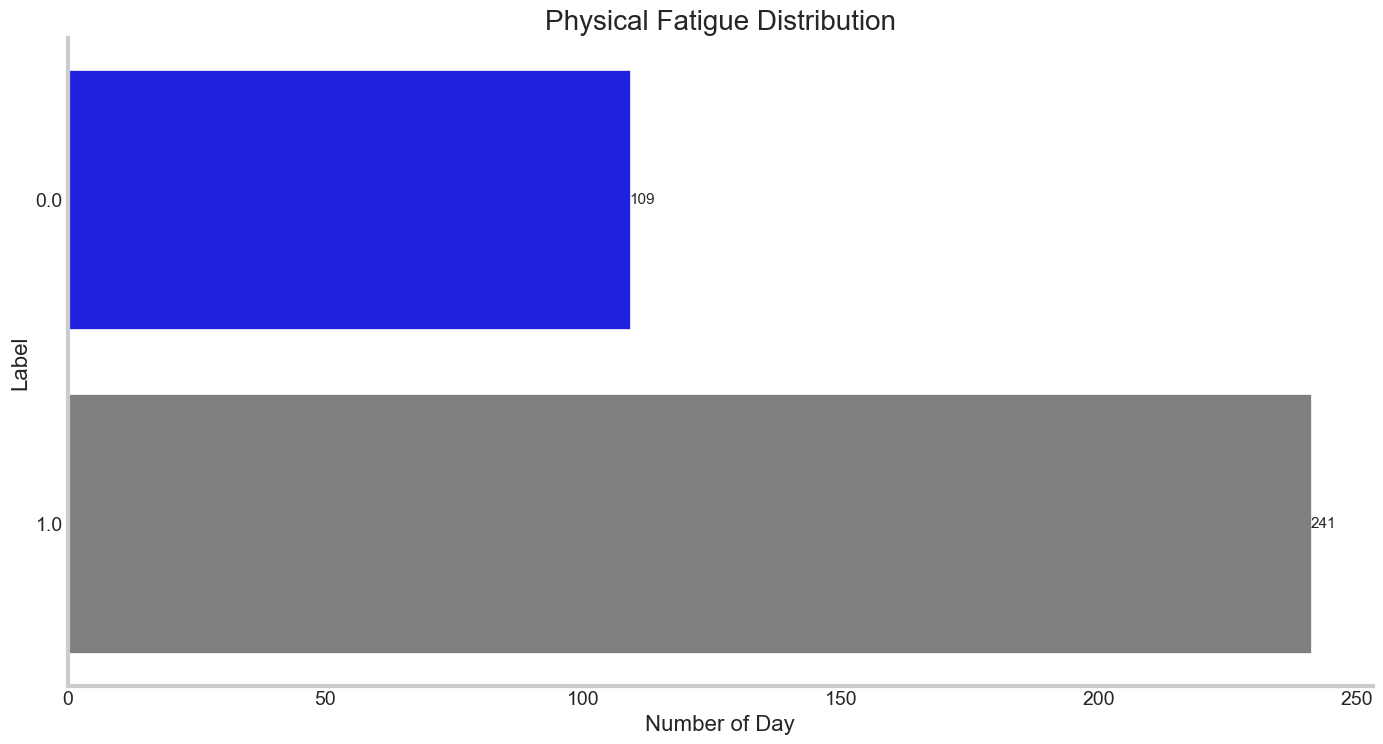

In [28]:
df=merged_df.copy()
# View Physical Distribution
plt.figure(figsize=(15, 8))

# Define Color Palette
color_palette = {0:'blue', 1:'grey'}
distribution = df['PhF'].value_counts().sort_values(ascending=False)

bar_plot = sns.barplot(
    x=distribution.values,
    y=list(distribution.keys()),
    orient='horizontal', palette=color_palette
);

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', fontsize=11)    
    
plt.title('Physical Fatigue Distribution', fontsize=20);
sns.despine();
plt.xlabel("Number of Day", fontsize=16);
plt.ylabel("Label", fontsize=16);

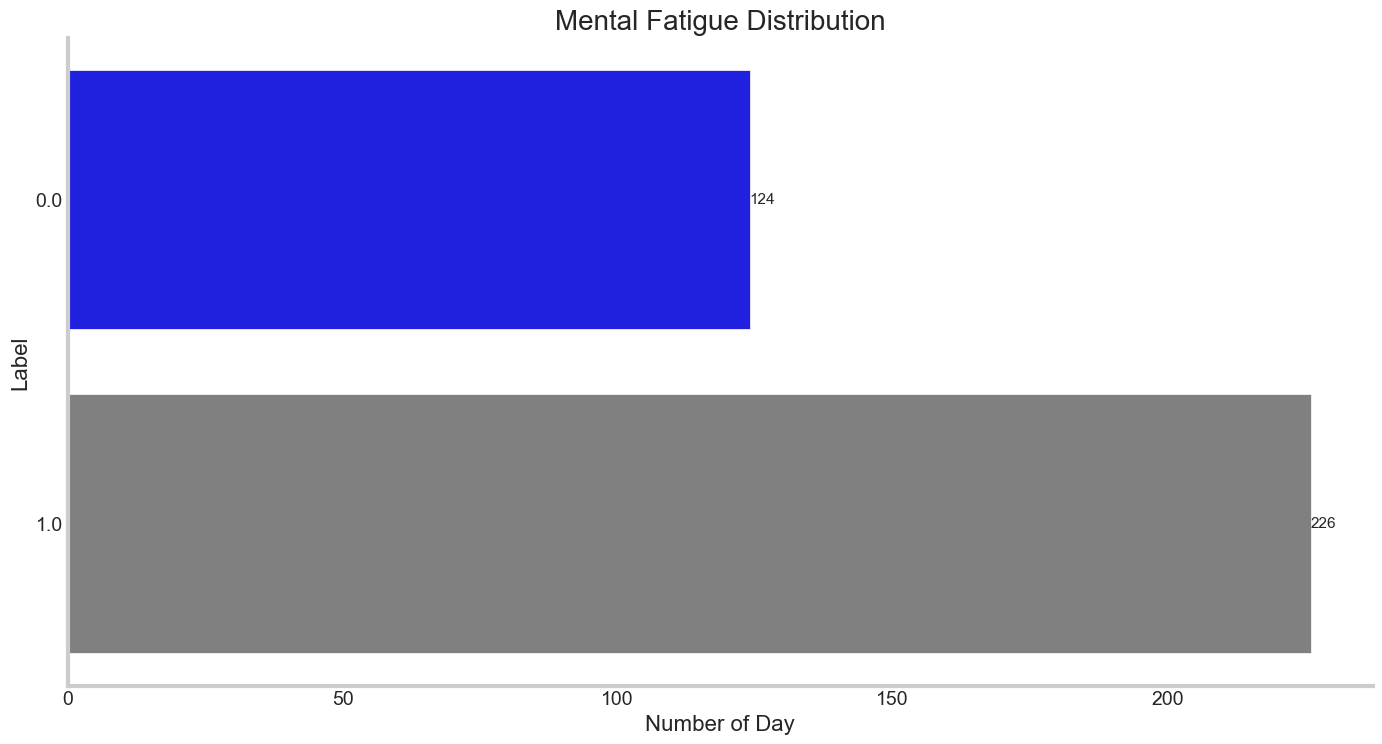

In [29]:
df=merged_df.copy()
# View Mental Distribution
plt.figure(figsize=(15, 8))

# Define Color Palette
color_palette = {0:'blue', 1:'grey'}
distribution = df['MF'].value_counts().sort_values(ascending=False)

bar_plot = sns.barplot(
    x=distribution.values,
    y=list(distribution.keys()),
    orient='horizontal', palette=color_palette
);

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', fontsize=11)    
    
plt.title('Mental Fatigue Distribution', fontsize=20);
sns.despine();
plt.xlabel("Number of Day", fontsize=16);
plt.ylabel("Label", fontsize=16);

In [30]:
df.columns

Index(['Timestamp', 'ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature', 'SubjectID', 'ActivityClass',
       'DateTime', 'Timezone', 'VAS', 'RelP', 'PhF', 'MF', 'sport',
       'Age range', 'Gender'],
      dtype='object')

In [31]:

pd.set_option('display.max_columns', None)

In [32]:
df.head(2)

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0 2019-03-14 20:01:00        4.705882     981.45            0.56   
1 2019-03-15 20:01:00        0.784314     989.90            1.34   

   BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0            1.78         1311.85318              4.720039  81.054318   
1            2.57         1311.85318              2.724856  71.733333   

         HRV       RESP  Steps  SkinTemperature  SubjectID ActivityClass  \
0  31.266667  16.796793    7.0            33.78          1     undefined   
1  28.600000  21.099766    0.0            34.19          1     undefined   

             DateTime Timezone VAS  RelP  PhF   MF sport Age range Gender  
0 2019-03-14 20:01:00      UTC   0  -1.0  0.0  1.0    No     36-45      M  
1 2019-03-15 20:01:00      UTC   0   1.0  1.0  1.0   Yes     36-45      M

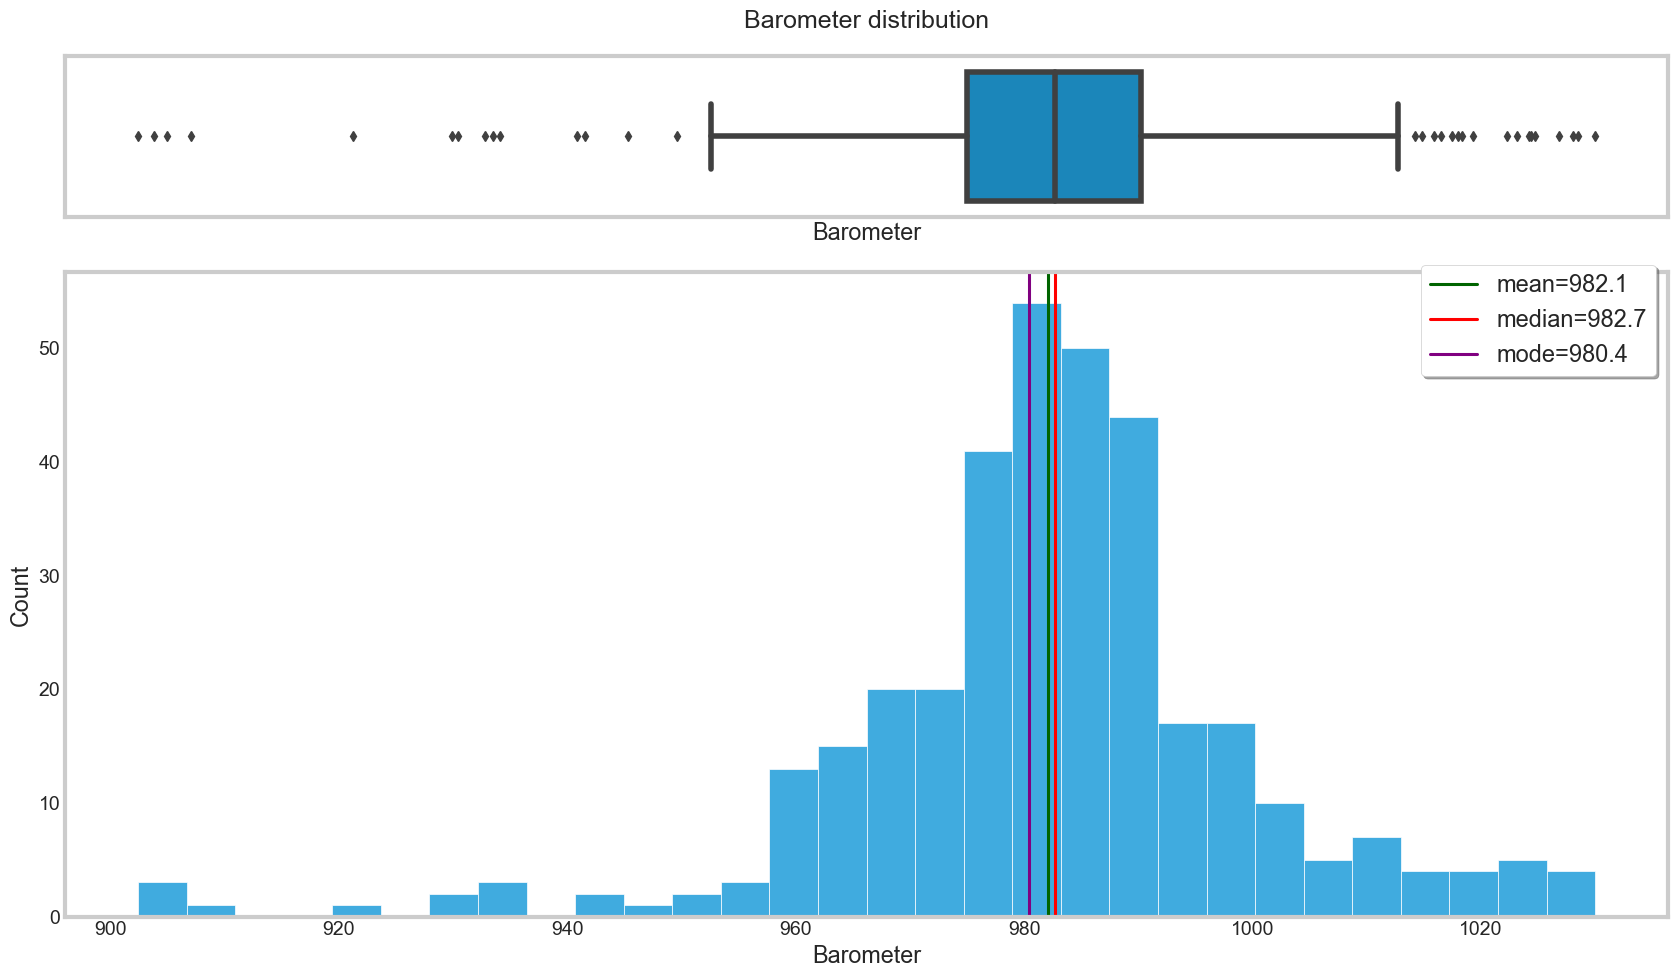

In [33]:
fig, ax = plt.subplots(2, 1, ], figsize=(17,10),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('Barometer distribution',fontsize=18,pad=20)
sns.boxplot(x='Barometer', data=df, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='Barometer', data=df, ax=ax[1])
plt.axvline(df['Barometer'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df['Barometer'].mean(),1)))
plt.axvline(df['Barometer'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df['Barometer'].median(),1)))
plt.axvline(df['Barometer'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df['Barometer'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

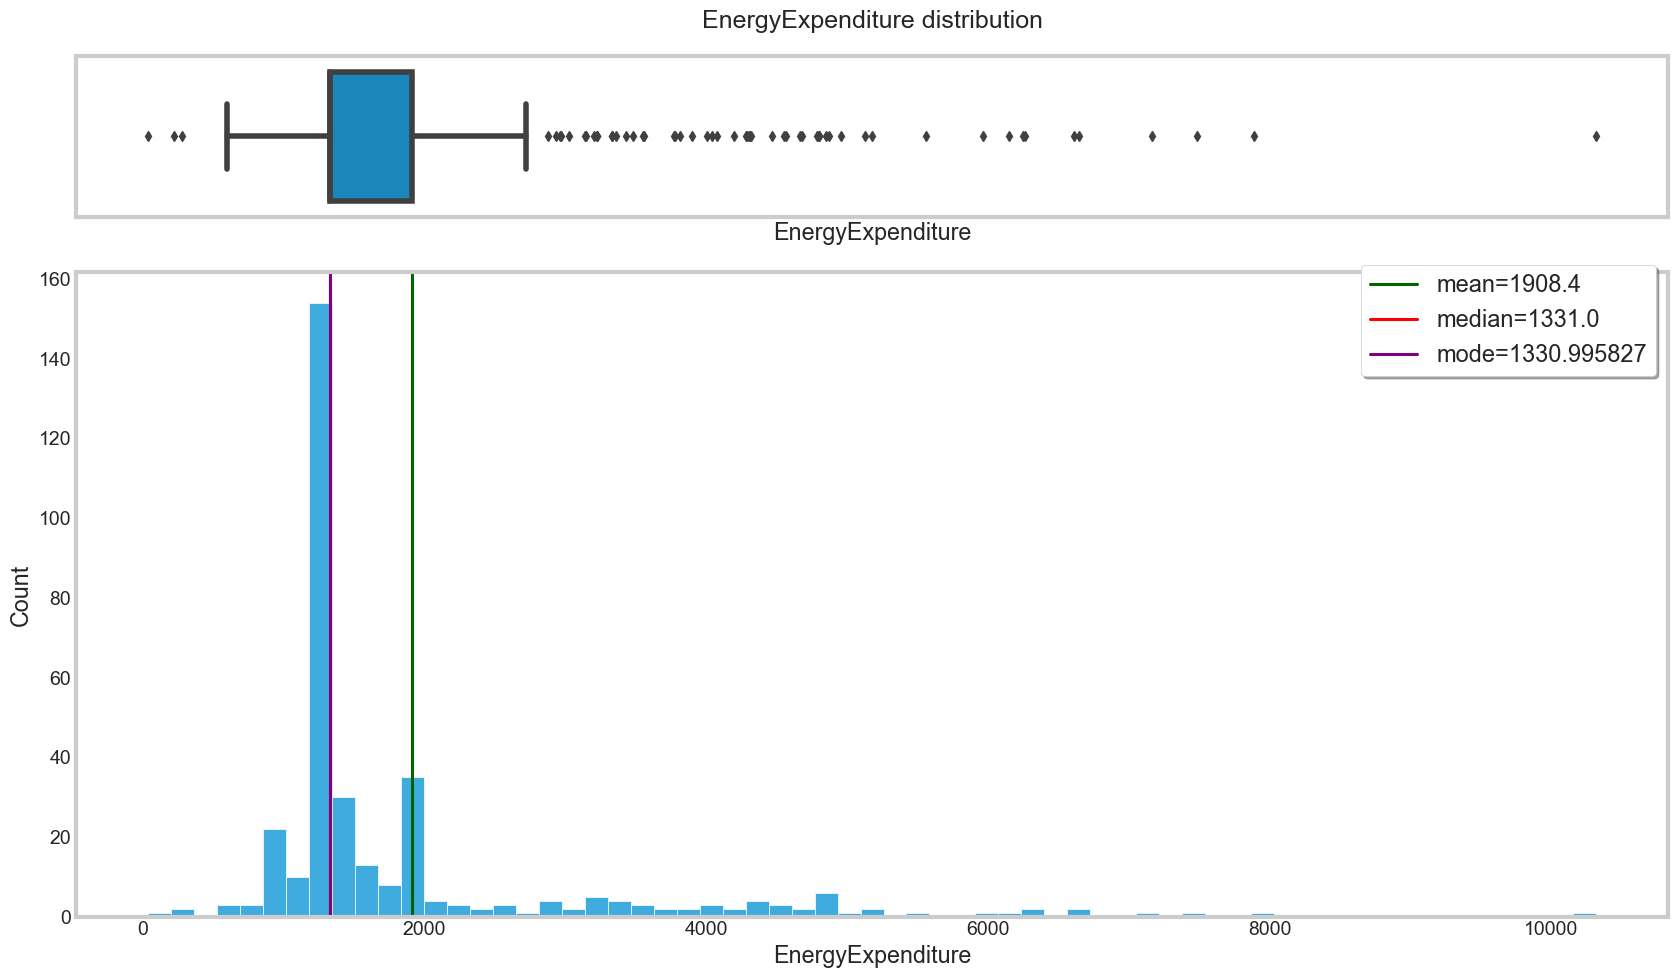

In [34]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,10),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('EnergyExpenditure distribution',fontsize=18,pad=20)
sns.boxplot(x='EnergyExpenditure', data=df, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='EnergyExpenditure', data=df, ax=ax[1])
plt.axvline(df['EnergyExpenditure'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df['EnergyExpenditure'].mean(),1)))
plt.axvline(df['EnergyExpenditure'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df['EnergyExpenditure'].median(),1)))
plt.axvline(df['EnergyExpenditure'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df['EnergyExpenditure'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

In [35]:
df.head(4)

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0 2019-03-14 20:01:00        4.705882     981.45           0.560   
1 2019-03-15 20:01:00        0.784314     989.90           1.340   
2 2019-03-16 20:47:00        2.352941     984.00           0.445   
3 2019-03-17 20:01:00        0.784314     987.50           0.970   

   BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0            1.78        1311.853180              4.720039  81.054318   
1            2.57        1311.853180              2.724856  71.733333   
2            3.49        1564.398731                   NaN  73.214010   
3            2.00        1311.853180              4.504256  61.254413   

         HRV       RESP  Steps  SkinTemperature  SubjectID ActivityClass  \
0  31.266667  16.796793    7.0            33.78          1     undefined   
1  28.600000  21.099766    0.0            34.19          1     undefined   
2  41.633333   7.458851   13.0            34.59          1     undefined   
3  49.150000  18.116667    0.0            34.91          1     undefined   

             DateTime Timezone VAS  RelP  PhF   MF sport Age range Gender  
0 2019-03-14 20:01:00      UTC   0  -1.0  0.0  1.0    No     36-45      M  
1 2019-03-15 20:01:00      UTC   0   1.0  1.0  1.0   Yes     36-45      M  
2 2019-03-16 20:47:00      UTC   0   0.0  0.0  0.0    No     36-45      M  
3 2019-03-17 20:01:00      UTC   0   0.0  1.0  0.0   Yes     36-45      M

In [36]:
df.columns

Index(['Timestamp', 'ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature', 'SubjectID', 'ActivityClass',
       'DateTime', 'Timezone', 'VAS', 'RelP', 'PhF', 'MF', 'sport',
       'Age range', 'Gender'],
      dtype='object')

In [37]:
merged_df

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-03-14 20:01:00        4.705882     981.45           0.560   
1   2019-03-15 20:01:00        0.784314     989.90           1.340   
2   2019-03-16 20:47:00        2.352941     984.00           0.445   
3   2019-03-17 20:01:00        0.784314     987.50           0.970   
4   2019-03-18 20:13:00        1.960784     994.80           0.905   
..                  ...             ...        ...             ...   
345 2019-08-05 19:13:00        0.784314     975.35           0.790   
346 2019-09-05 21:08:00        1.176471     978.40           0.550   
347 2019-10-05 14:27:00        0.784314     980.80           0.400   
348 2019-11-05 17:31:00        0.784314     984.50           0.690   
349 2019-12-05 18:14:00        2.352941     997.20           0.320   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              1.78        1311.853180              4.720039  81.054318   
1              2.57        1311.853180              2.724856  71.733333   
2              3.49        1564.398731                   NaN  73.214010   
3              2.00        1311.853180              4.504256  61.254413   
4              2.25        1496.649544                   NaN  66.113844   
..              ...                ...                   ...        ...   
345            1.42        1330.995827                   NaN  58.534651   
346            1.81        1330.995827                   NaN  69.785286   
347            1.48        1330.995827                   NaN  57.934461   
348            2.30        1330.995827                   NaN  66.016667   
349            3.07        1330.995827                   NaN  76.561253   

           HRV       RESP  Steps  SkinTemperature  SubjectID ActivityClass  \
0    31.266667  16.796793    7.0           33.780          1     undefined   
1    28.600000  21.099766    0.0           34.190          1     undefined   
2    41.633333   7.458851   13.0           34.590          1     undefined   
3    49.150000  18.116667    0.0           34.910          1     undefined   
4          NaN  22.205708    9.0           35.735          1     undefined   
..         ...        ...    ...              ...        ...           ...   
345  33.251923  13.850000    0.0           33.560          9     undefined   
346  52.966667  15.033377    0.0           33.560          9     undefined   
347  32.065970  13.695884    0.0           34.280          9     undefined   
348  23.193151  21.119940    0.0           35.000          9       resting   
349  41.466667  21.551075    0.0           34.720          9     undefined   

               DateTime Timezone VAS  RelP  PhF   MF sport Age range Gender  
0   2019-03-14 20:01:00      UTC   0  -1.0  0.0  1.0    No     36-45      M  
1   2019-03-15 20:01:00      UTC   0   1.0  1.0  1.0   Yes     36-45      M  
2   2019-03-16 20:47:00      UTC   0   0.0  0.0  0.0    No     36-45      M  
3   2019-03-17 20:01:00      UTC   0   0.0  1.0  0.0   Yes     36-45      M  
4   2019-03-18 20:13:00      UTC   0  -1.0  1.0  0.0   Yes     36-45      M  
..                  ...      ...  ..   ...  ...  ...   ...       ...    ...  
345 2019-08-05 19:13:00      UTC   1  -1.0  0.0  0.0    No     36-45      M  
346 2019-09-05 21:08:00      UTC   1   0.0  0.0  0.0    No     36-45      M  
347 2019-10-05 14:27:00      UTC   1   0.0  0.0  0.0    No     36-45      M  
348 2019-11-05 17:31:00      UTC   1  -1.0  0.0  0.0   Yes     36-45      M  
349 2019-12-05 18:14:00      UTC   1   1.0  1.0  0.0   Yes     36-45      M  

[350 rows x 23 columns]

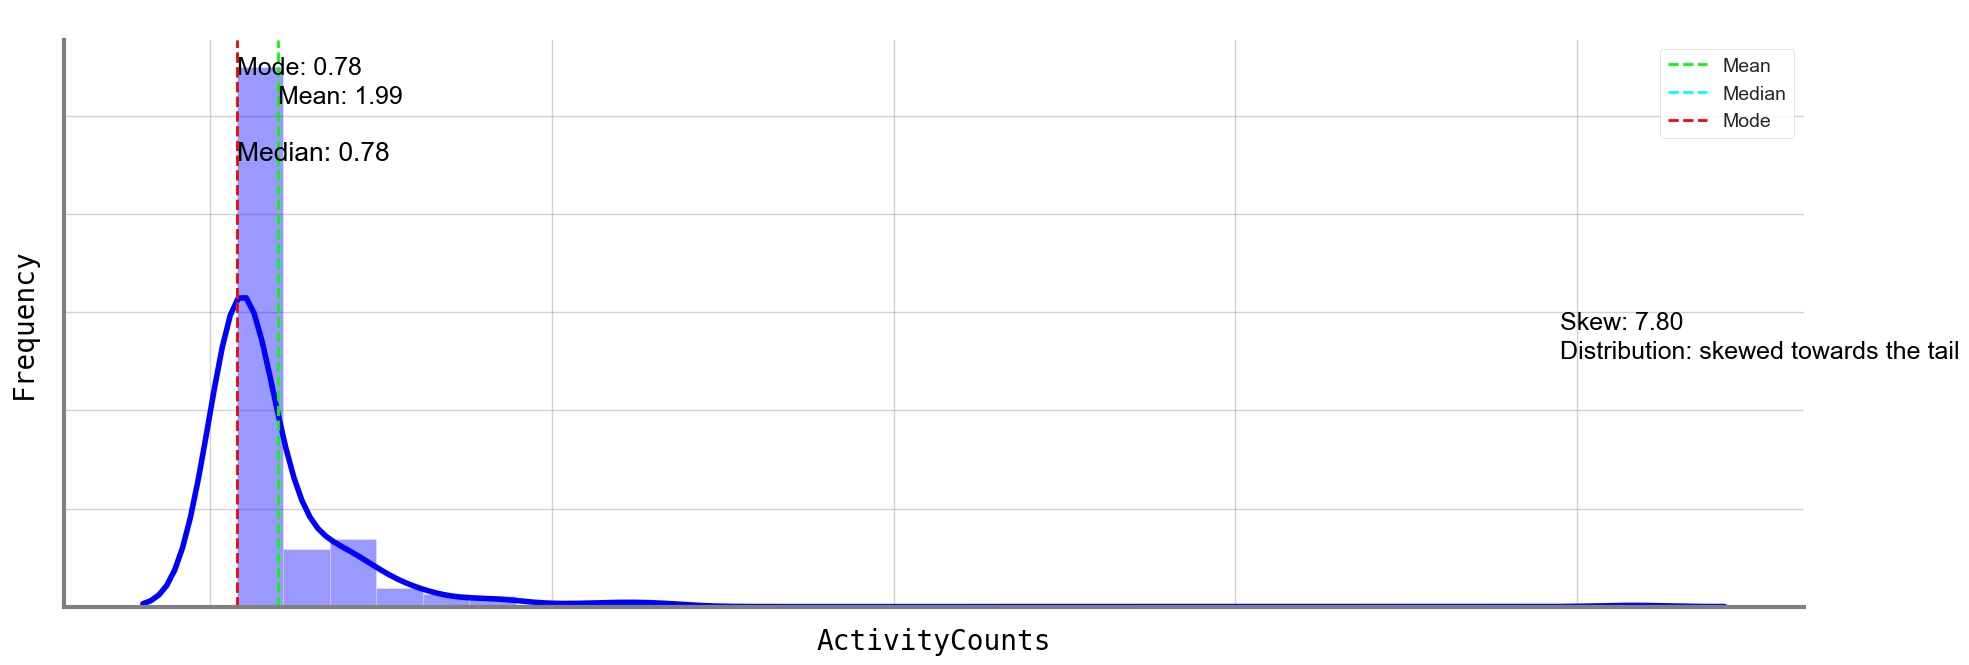

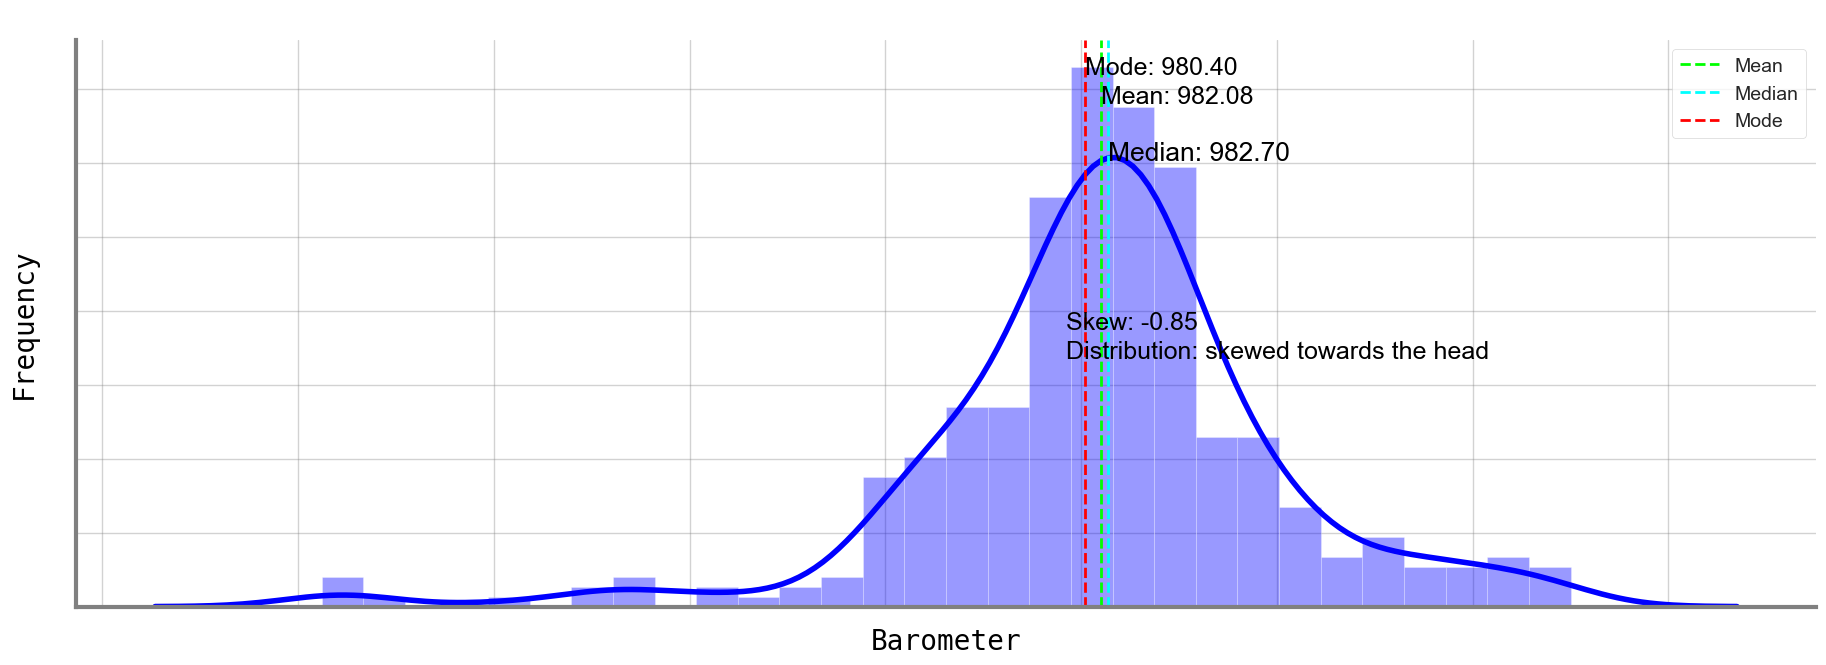

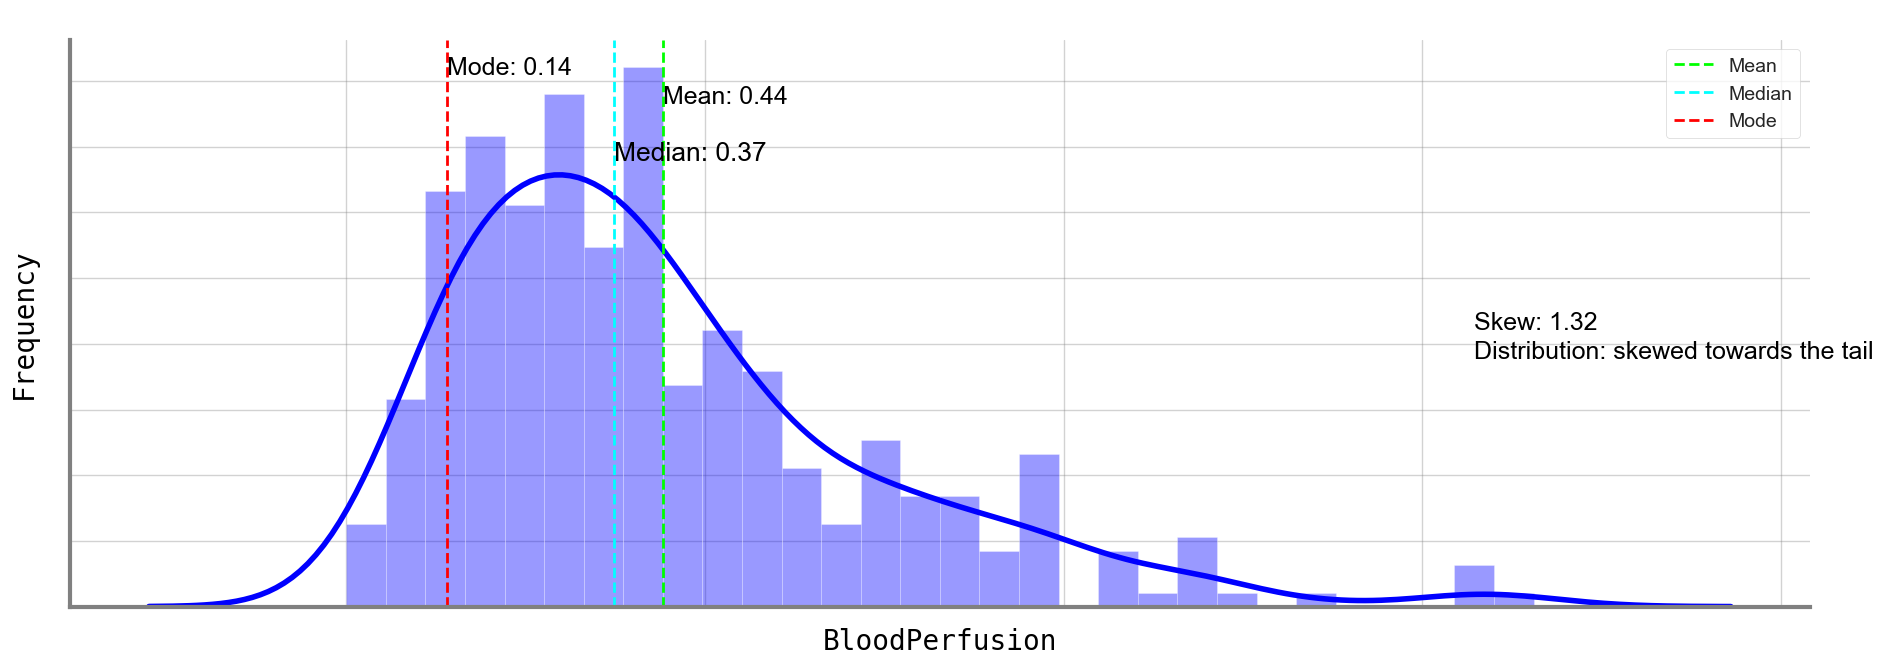

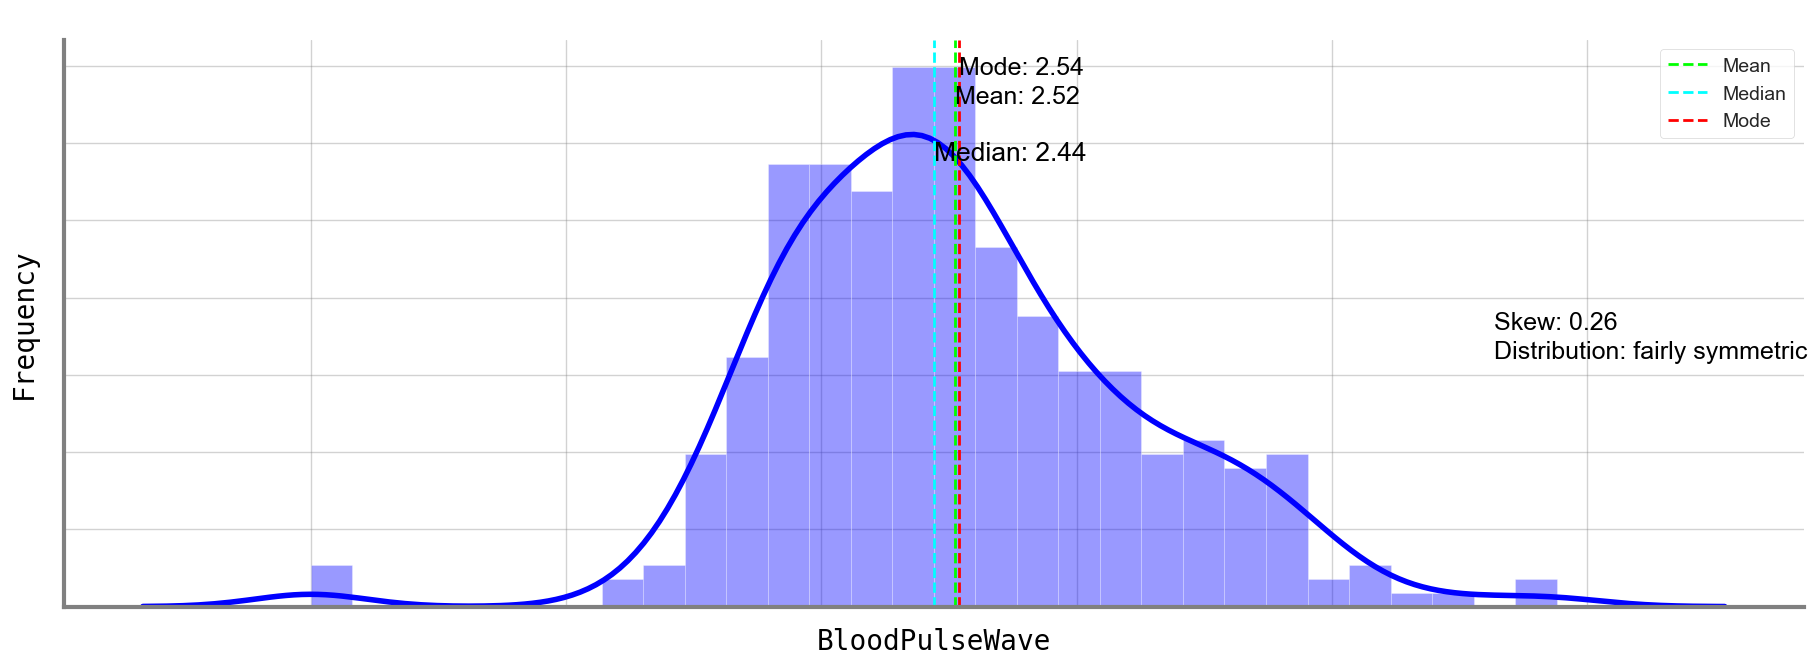

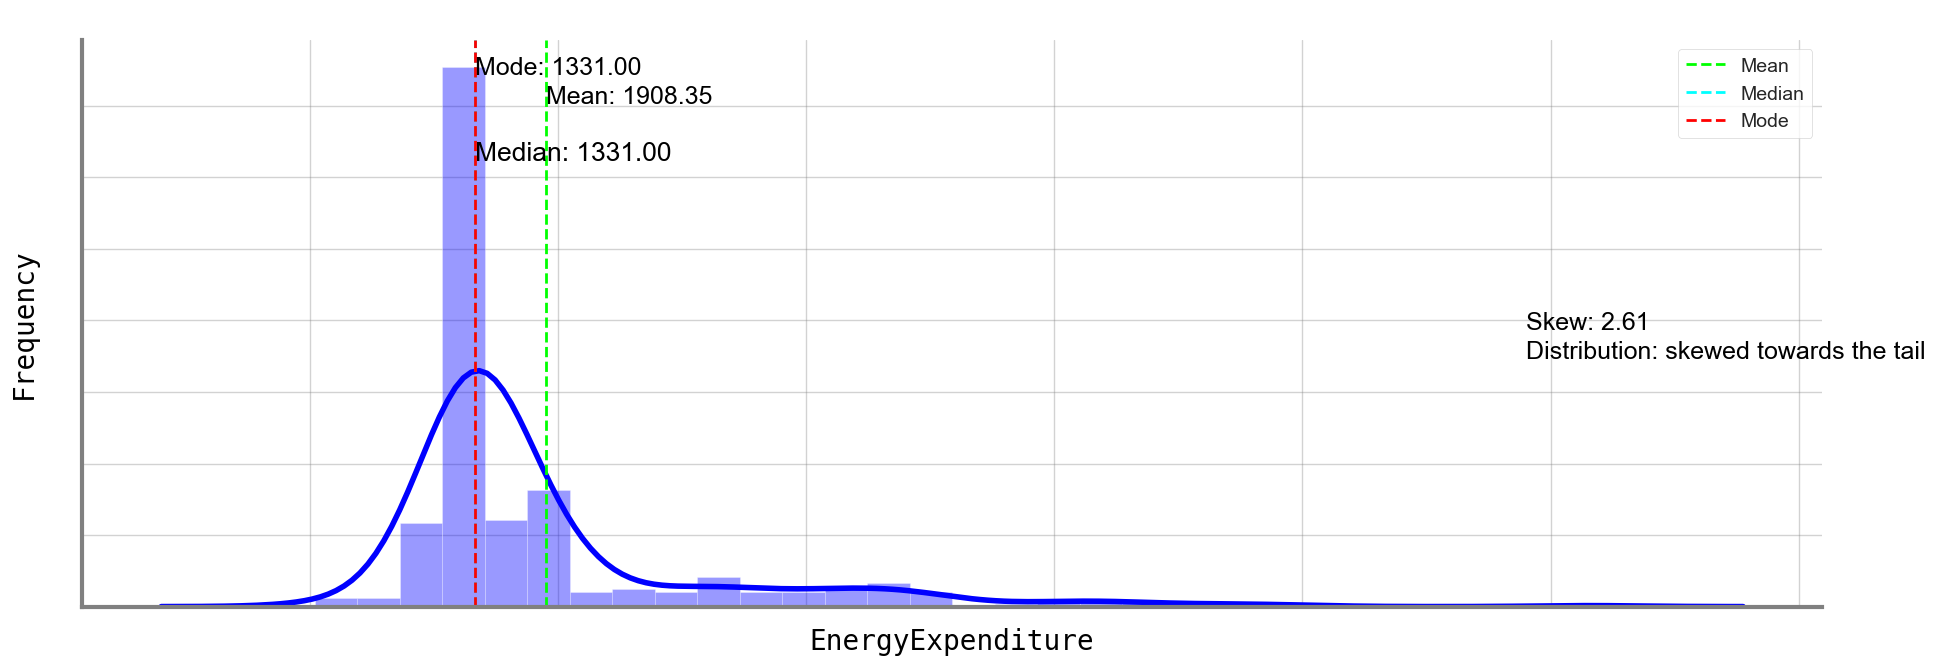

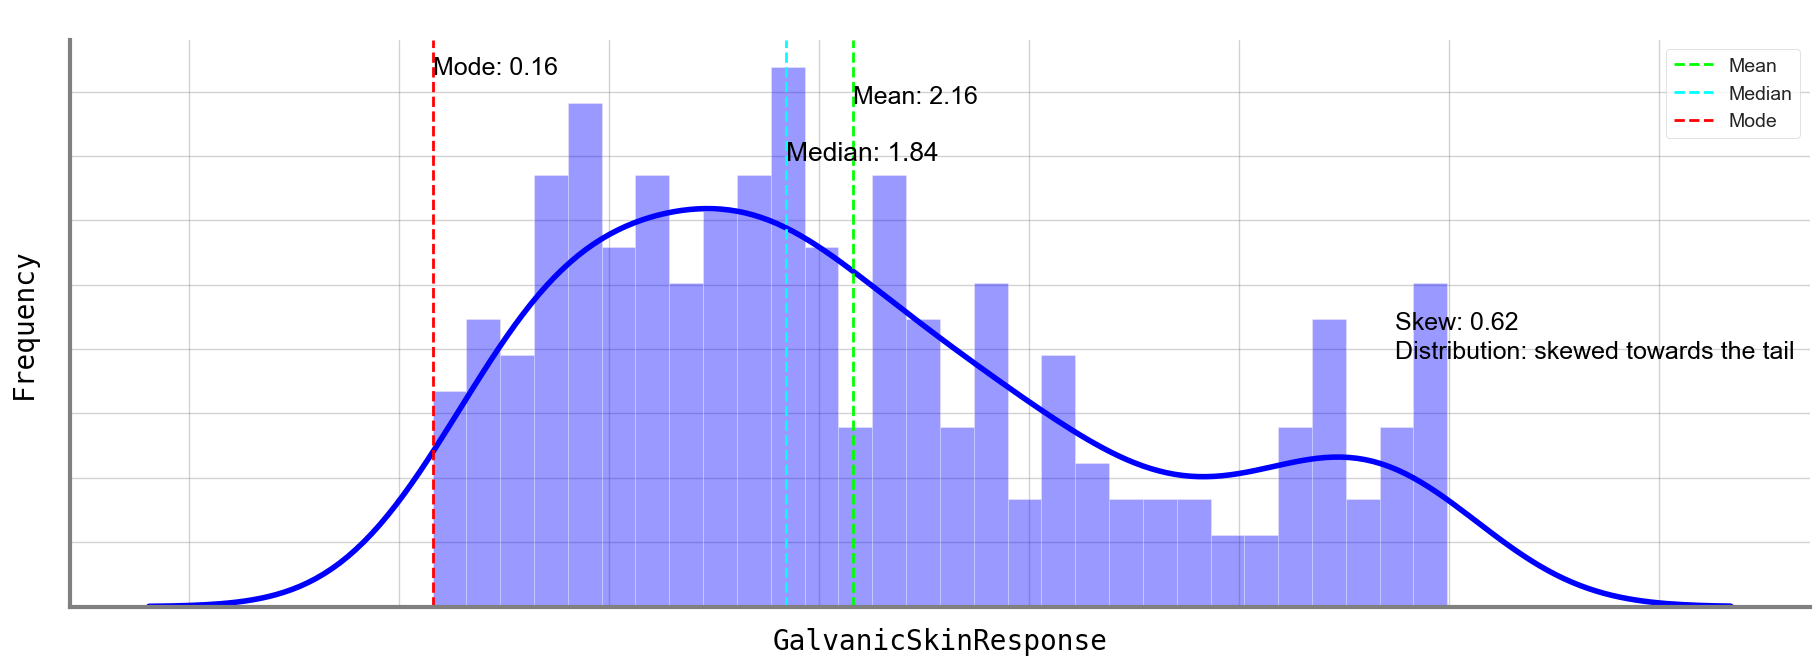

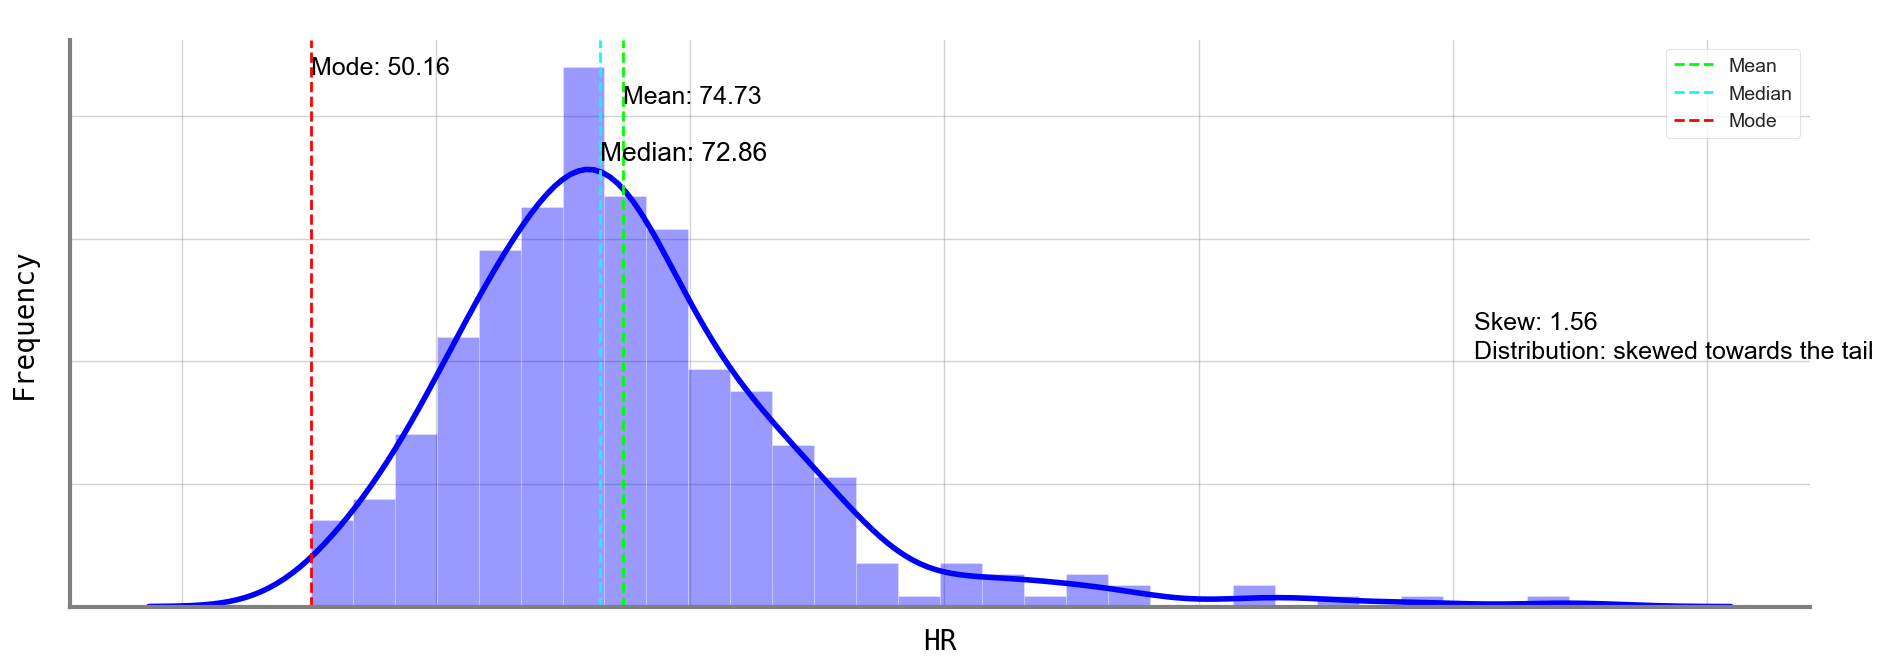

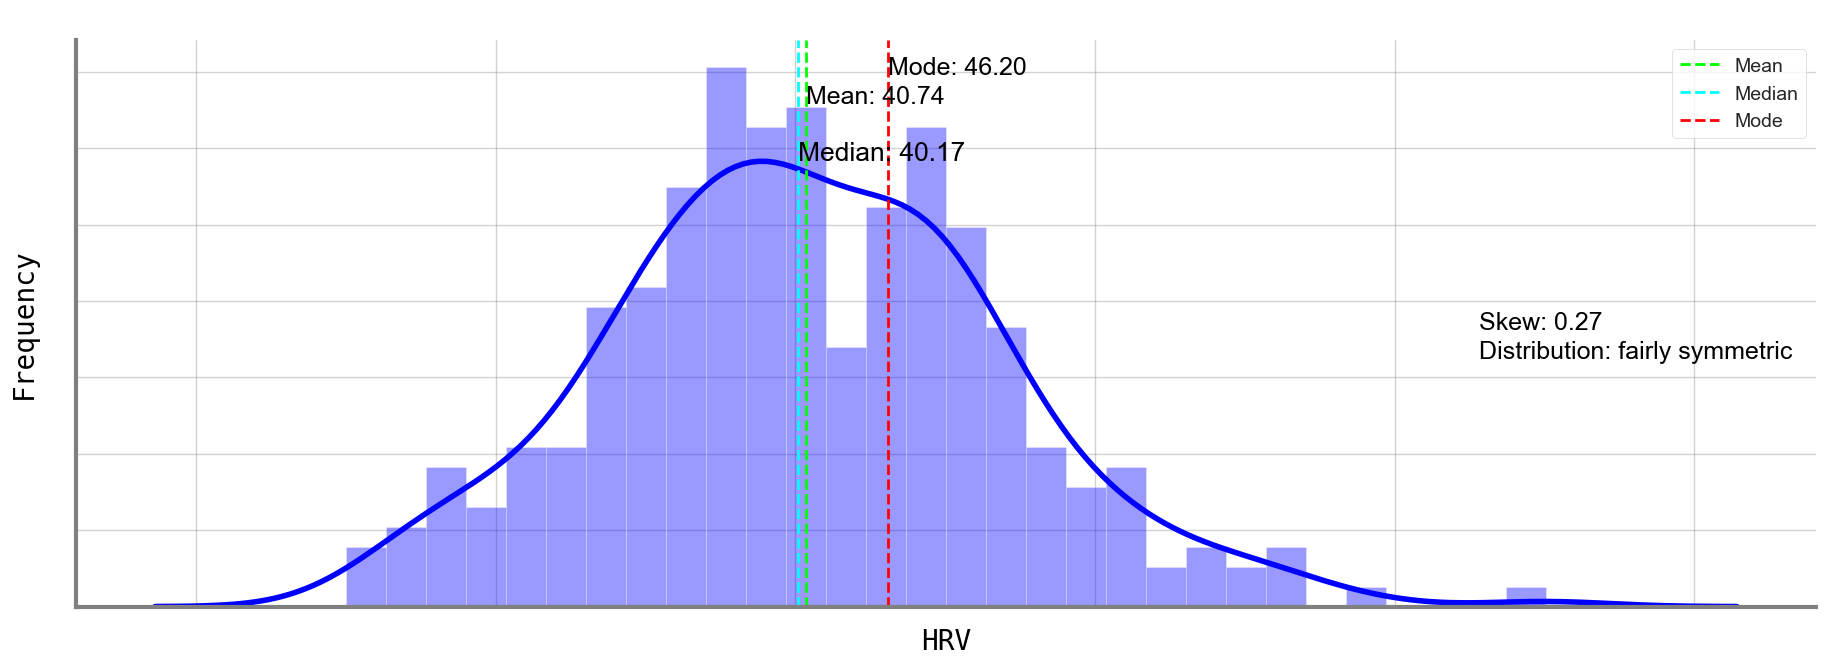

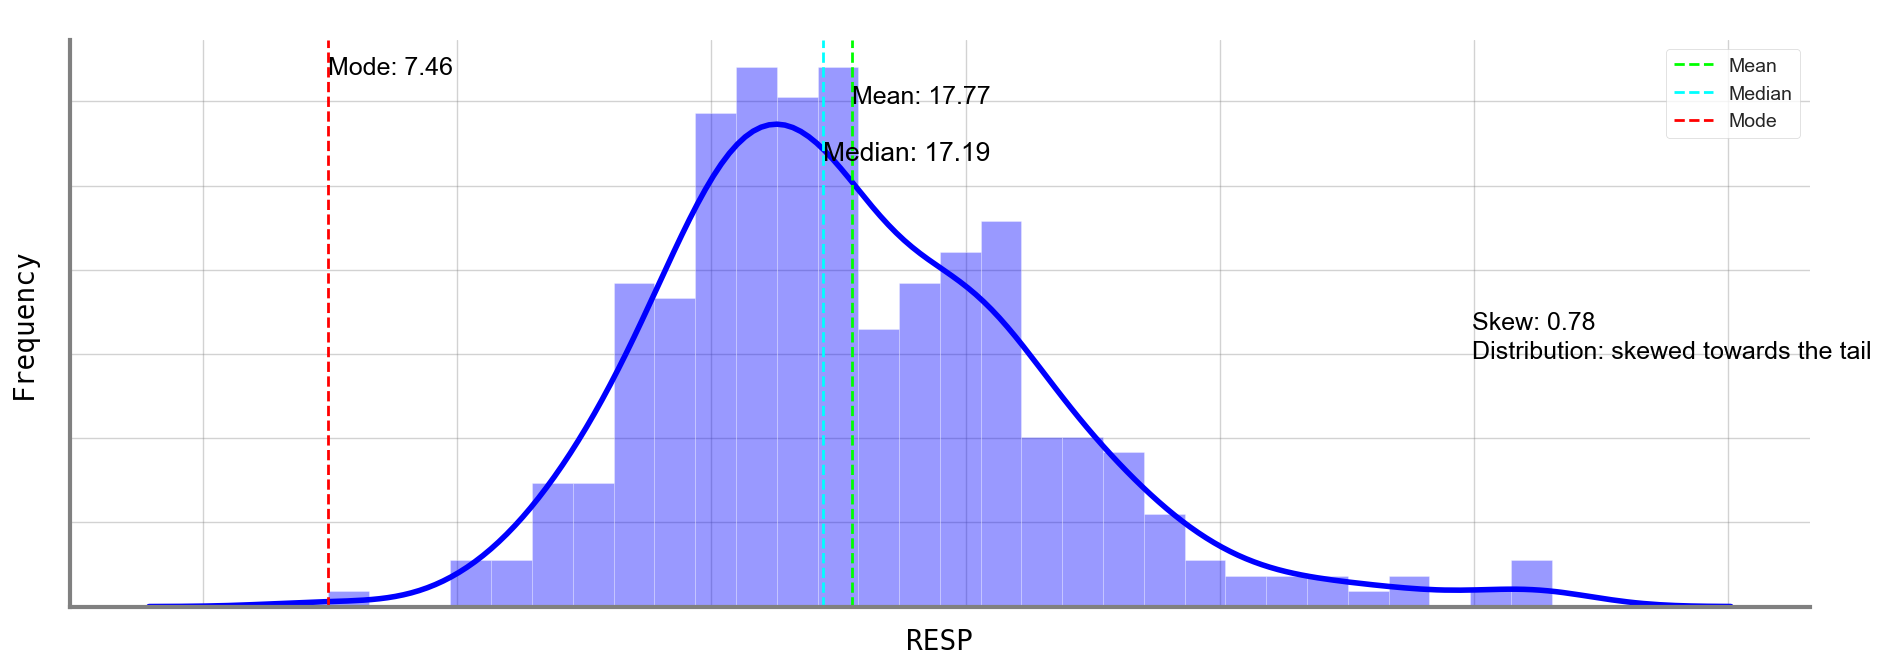

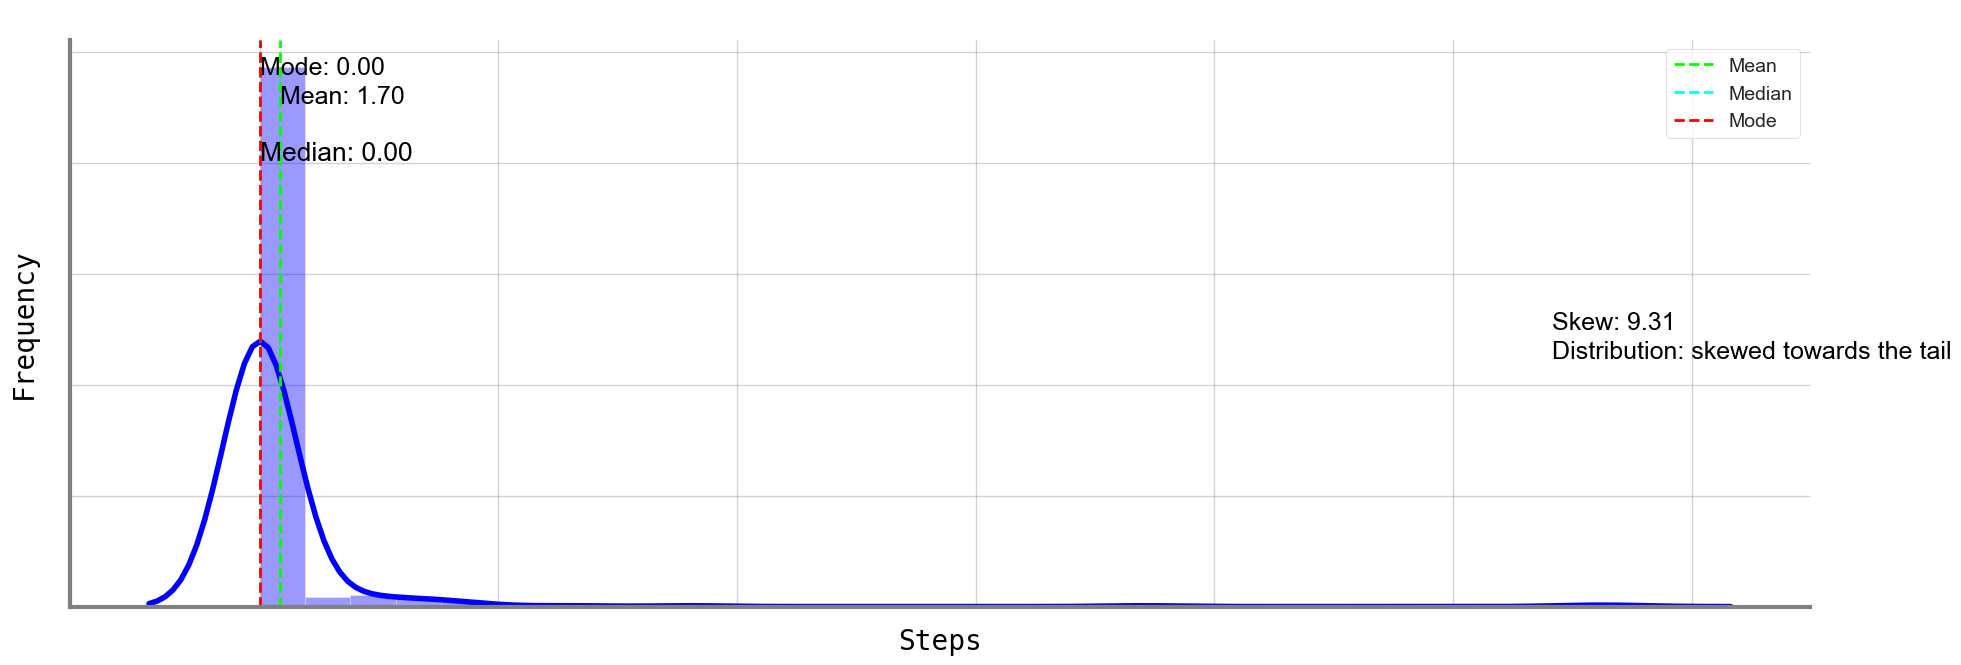

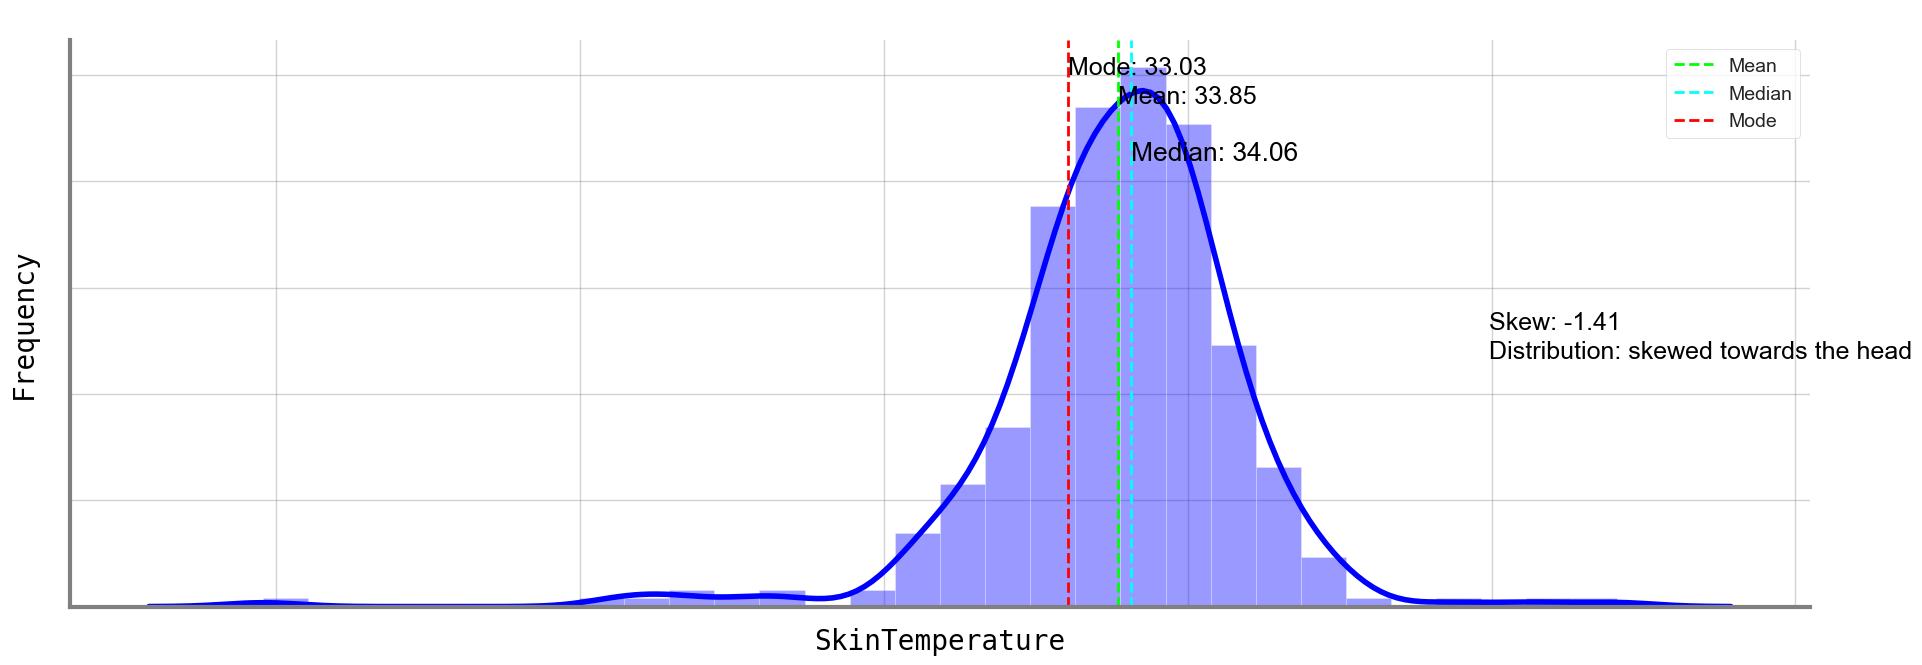

[None, None, None, None, None, None, None, None, None, None, None]

In [38]:
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

def skew_chart(x,var):

    median = x[var].median()
    mean = x[var].mean()
    mode = x[var].mode()[0]
    max=x[var].max()

    # Plotting the distribution of each column
    fig, ax = plt.subplots(figsize=(20, 7))
    sns.distplot(x[var].dropna(), kde=True, bins=30, color='blue')

    # Adding title and axis labels
    plt.title("Distribution of "+ str(var), color='white',fontsize=20,fontdict={'fontname': 'monospace'})
    plt.xlabel(var, color='black',fontsize=20,fontdict={'fontname': 'monospace'})
    plt.ylabel("Frequency", color='black',fontsize=20,fontdict={'fontname': 'monospace'})

    fig.set_facecolor('white')  # Changing the background color
    ax.set_facecolor('white')  # Changing the plot area background color
    ax.grid(color='gray', alpha=0.35)  # Changing the grid lines color

    plt.axvline(mean, color='lime', linestyle='--', linewidth=2, label='Mean')  # Adding a vertical line for mean
    plt.text(mean, ax.get_ylim()[1]*0.9, f"Mean: {mean:.2f}", color='black', fontsize=18, ha='left', va='center')  # Adding text for mean
    plt.axvline(median, color='cyan', linestyle='--', linewidth=2, label='Median')  # Adding a vertical line for median
    plt.text(median, ax.get_ylim()[1]*0.8, f"Median: {median:.2f}", color='black', fontsize=19, ha='left', va='center')  # Adding text for median
    plt.axvline(mode, color='red', linestyle='--', linewidth=2, label='Mode')  # Adding a vertical line for mode
    plt.text(mode, ax.get_ylim()[1]*0.95, f"Mode: {mode:.2f}", color='black', fontsize=18, ha='left', va='center')  # Adding text for mode
    plt.text(max*.95, ax.get_ylim()[1]*0.5, f"Skew: {x[var].skew():.2f}", color='black', fontsize=18, ha='left', va='center')  # Adding text for mode
    plt.text(max*.95, ax.get_ylim()[1]*0.45, f"Distribution: {skew_cat(x[var].skew())}", color='black', fontsize=18, ha='left', va='center')  # Adding text for mode
    plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
    plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks

    plt.setp(ax.spines.values(), color='gray') # Changing the color of the spines
    
    sns.despine()  # Removing the top and right spines
    plt.legend()  # Adding the legend
    plt.show()  # Displaying the plot

#creating list by type of variables
continuous=['ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature'] # creating a list of continuous attributes

target=['PhF'] # creating a list of target attribute

[skew_chart(df,i) for i in continuous]

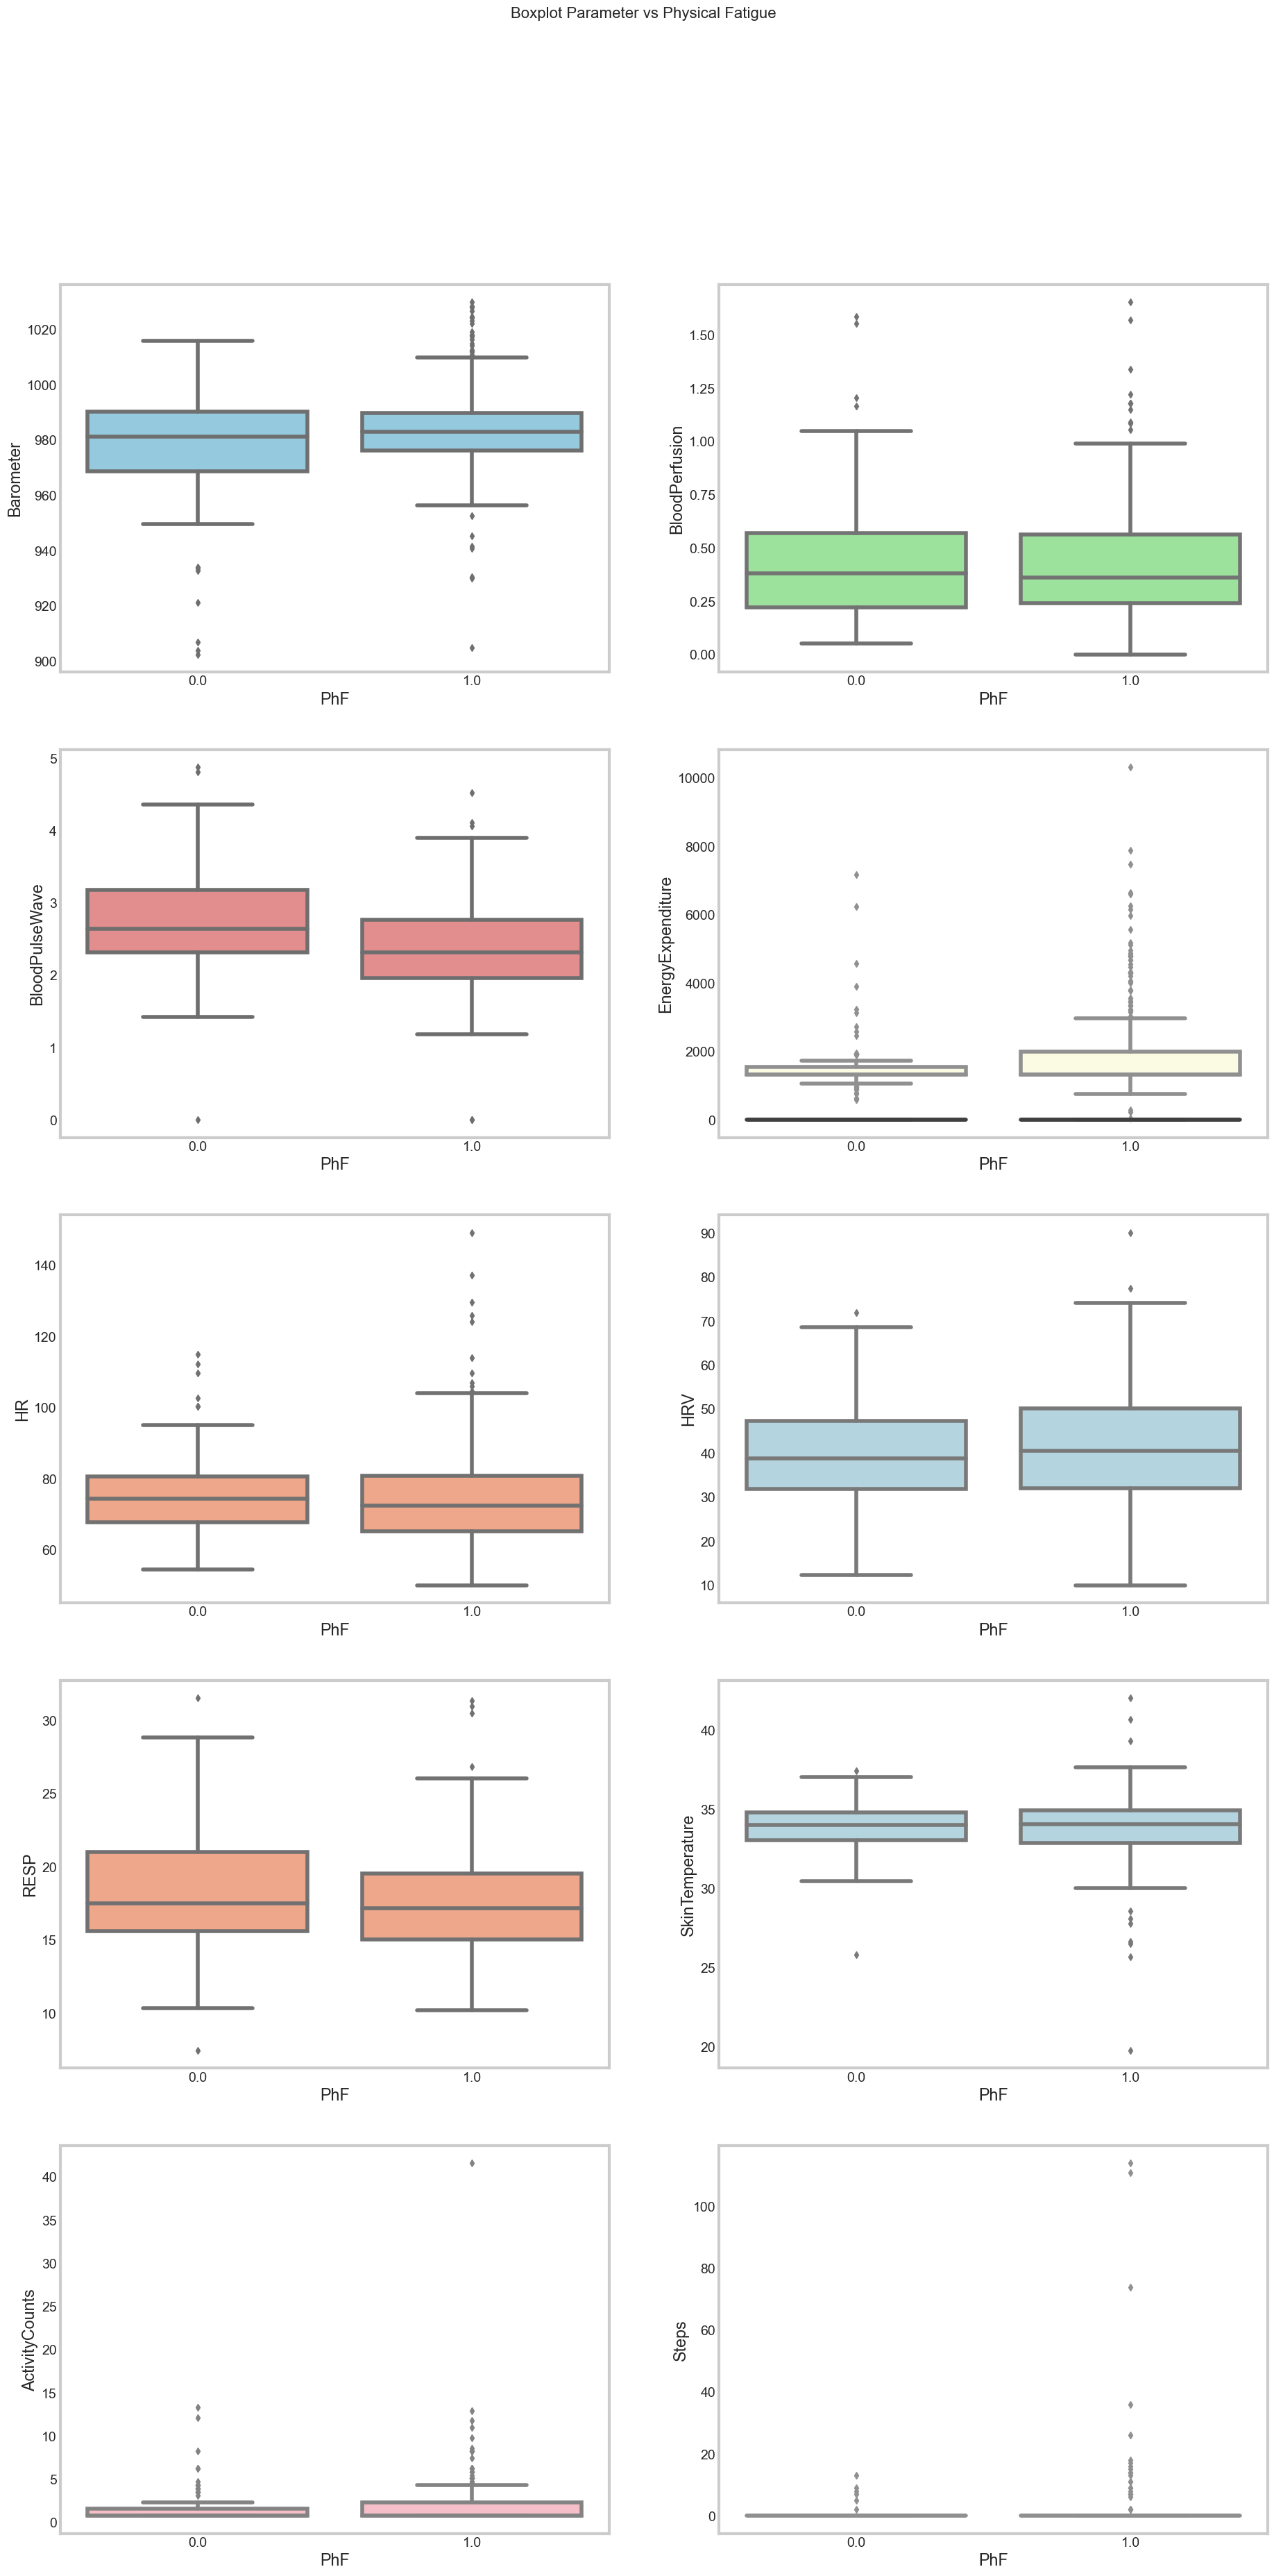

In [39]:
combined_df=df.copy()
fig, axes = plt.subplots(5, 2, figsize=(20, 40))


sns.boxplot(x='PhF', y='Barometer', data=combined_df, ax=axes[0, 0], color='skyblue')
sns.boxplot(x='PhF', y='BloodPerfusion', data=combined_df, ax=axes[0, 1], color='lightgreen')
sns.boxplot(x='PhF', y='BloodPulseWave', data=combined_df, ax=axes[1, 0], color='lightcoral')
sns.boxplot(x='PhF', y='GalvanicSkinResponse', data=combined_df, ax=axes[1, 1], color='lightseagreen')
sns.boxplot(x='PhF', y='HR', data=combined_df, ax=axes[2, 0], color='lightsalmon')
sns.boxplot(x='PhF', y="HRV", data=combined_df, ax=axes[2, 1], color='lightblue')

sns.boxplot(x='PhF', y='RESP', data=combined_df, ax=axes[3, 0], color='lightsalmon')
sns.boxplot(x='PhF', y="SkinTemperature", data=combined_df, ax=axes[3, 1], color='lightblue')

sns.boxplot(x='PhF', y='ActivityCounts', data=combined_df, ax=axes[4, 0], color='lightpink')


sns.boxplot(x='PhF', y='Steps', data=combined_df, ax=axes[4, 1], color='lightyellow')

sns.boxplot(x='PhF', y='EnergyExpenditure', data=combined_df, ax=axes[1, 1], color='lightyellow')

fig.suptitle("Boxplot Parameter vs Physical Fatigue", fontsize=16)
plt.show()


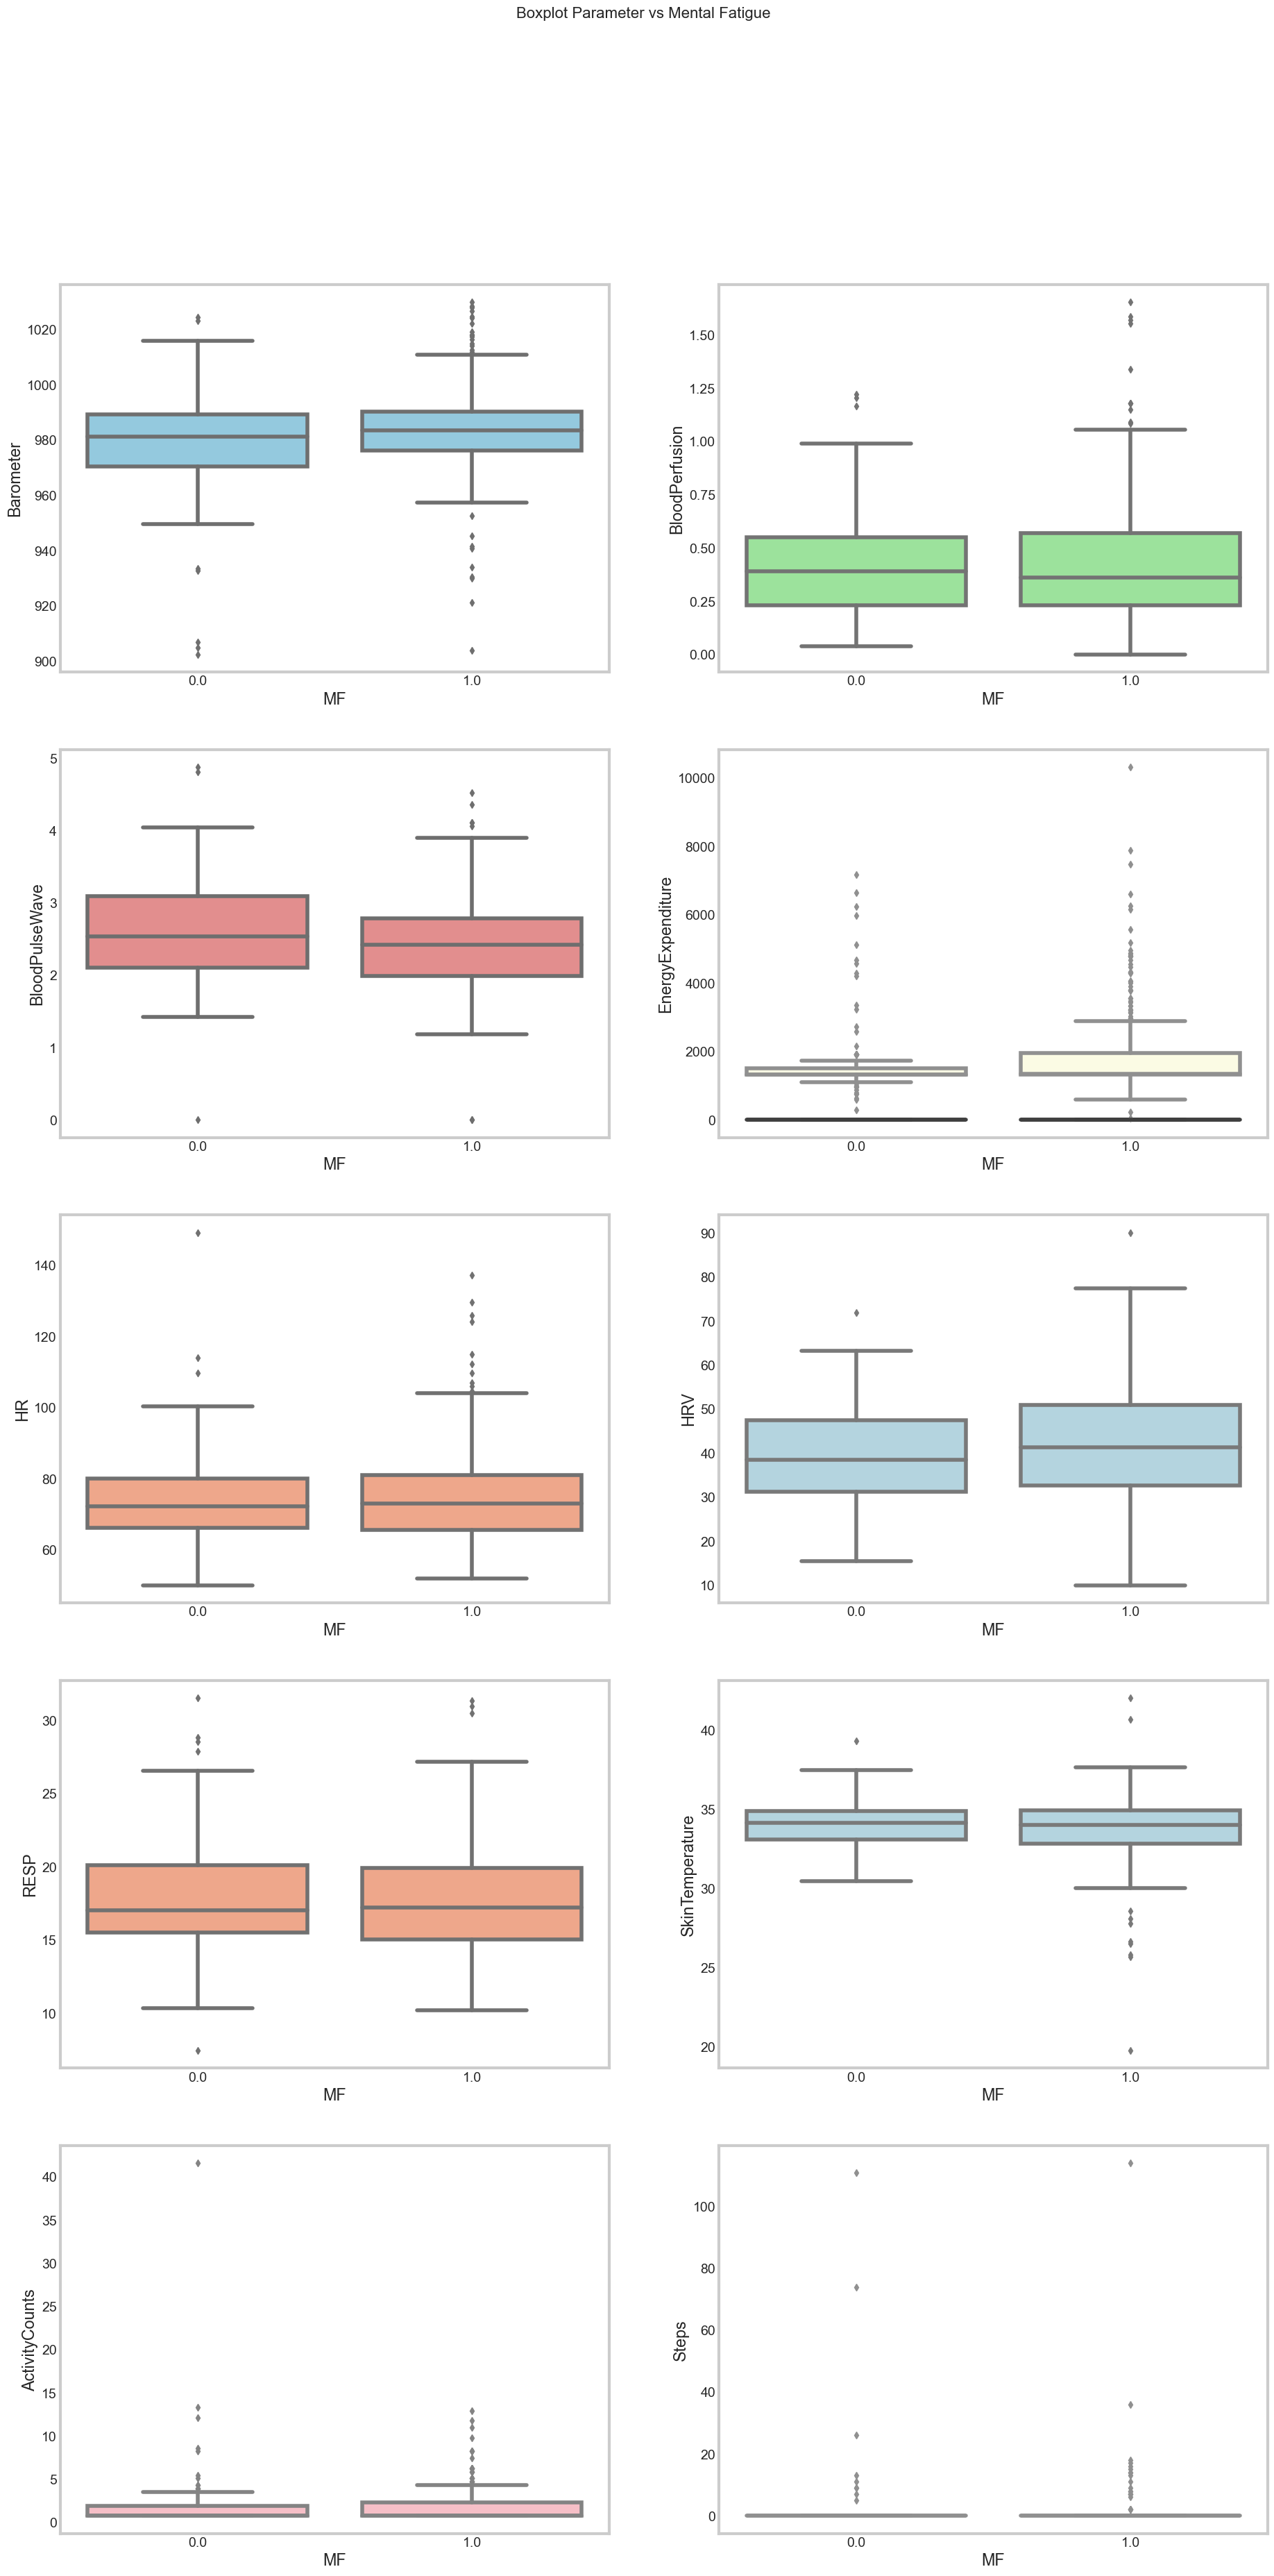

In [40]:
combined_df=df.copy()
fig, axes = plt.subplots(5, 2, figsize=(20, 40))


sns.boxplot(x='MF', y='Barometer', data=combined_df, ax=axes[0, 0], color='skyblue')
sns.boxplot(x='MF', y='BloodPerfusion', data=combined_df, ax=axes[0, 1], color='lightgreen')
sns.boxplot(x='MF', y='BloodPulseWave', data=combined_df, ax=axes[1, 0], color='lightcoral')
sns.boxplot(x='MF', y='GalvanicSkinResponse', data=combined_df, ax=axes[1, 1], color='lightseagreen')
sns.boxplot(x='MF', y='HR', data=combined_df, ax=axes[2, 0], color='lightsalmon')
sns.boxplot(x='MF', y="HRV", data=combined_df, ax=axes[2, 1], color='lightblue')

sns.boxplot(x='MF', y='RESP', data=combined_df, ax=axes[3, 0], color='lightsalmon')
sns.boxplot(x='MF', y="SkinTemperature", data=combined_df, ax=axes[3, 1], color='lightblue')

sns.boxplot(x='MF', y='ActivityCounts', data=combined_df, ax=axes[4, 0], color='lightpink')


sns.boxplot(x='MF', y='Steps', data=combined_df, ax=axes[4, 1], color='lightyellow')

sns.boxplot(x='MF', y='EnergyExpenditure', data=combined_df, ax=axes[1, 1], color='lightyellow')

fig.suptitle("Boxplot Parameter vs Mental Fatigue", fontsize=16)
plt.show()


In [41]:
# Display the merged DataFrame
merged_df

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-03-14 20:01:00        4.705882     981.45           0.560   
1   2019-03-15 20:01:00        0.784314     989.90           1.340   
2   2019-03-16 20:47:00        2.352941     984.00           0.445   
3   2019-03-17 20:01:00        0.784314     987.50           0.970   
4   2019-03-18 20:13:00        1.960784     994.80           0.905   
..                  ...             ...        ...             ...   
345 2019-08-05 19:13:00        0.784314     975.35           0.790   
346 2019-09-05 21:08:00        1.176471     978.40           0.550   
347 2019-10-05 14:27:00        0.784314     980.80           0.400   
348 2019-11-05 17:31:00        0.784314     984.50           0.690   
349 2019-12-05 18:14:00        2.352941     997.20           0.320   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              1.78        1311.853180              4.720039  81.054318   
1              2.57        1311.853180              2.724856  71.733333   
2              3.49        1564.398731                   NaN  73.214010   
3              2.00        1311.853180              4.504256  61.254413   
4              2.25        1496.649544                   NaN  66.113844   
..              ...                ...                   ...        ...   
345            1.42        1330.995827                   NaN  58.534651   
346            1.81        1330.995827                   NaN  69.785286   
347            1.48        1330.995827                   NaN  57.934461   
348            2.30        1330.995827                   NaN  66.016667   
349            3.07        1330.995827                   NaN  76.561253   

           HRV       RESP  Steps  SkinTemperature  SubjectID ActivityClass  \
0    31.266667  16.796793    7.0           33.780          1     undefined   
1    28.600000  21.099766    0.0           34.190          1     undefined   
2    41.633333   7.458851   13.0           34.590          1     undefined   
3    49.150000  18.116667    0.0           34.910          1     undefined   
4          NaN  22.205708    9.0           35.735          1     undefined   
..         ...        ...    ...              ...        ...           ...   
345  33.251923  13.850000    0.0           33.560          9     undefined   
346  52.966667  15.033377    0.0           33.560          9     undefined   
347  32.065970  13.695884    0.0           34.280          9     undefined   
348  23.193151  21.119940    0.0           35.000          9       resting   
349  41.466667  21.551075    0.0           34.720          9     undefined   

               DateTime Timezone VAS  RelP  PhF   MF sport Age range Gender  
0   2019-03-14 20:01:00      UTC   0  -1.0  0.0  1.0    No     36-45      M  
1   2019-03-15 20:01:00      UTC   0   1.0  1.0  1.0   Yes     36-45      M  
2   2019-03-16 20:47:00      UTC   0   0.0  0.0  0.0    No     36-45      M  
3   2019-03-17 20:01:00      UTC   0   0.0  1.0  0.0   Yes     36-45      M  
4   2019-03-18 20:13:00      UTC   0  -1.0  1.0  0.0   Yes     36-45      M  
..                  ...      ...  ..   ...  ...  ...   ...       ...    ...  
345 2019-08-05 19:13:00      UTC   1  -1.0  0.0  0.0    No     36-45      M  
346 2019-09-05 21:08:00      UTC   1   0.0  0.0  0.0    No     36-45      M  
347 2019-10-05 14:27:00      UTC   1   0.0  0.0  0.0    No     36-45      M  
348 2019-11-05 17:31:00      UTC   1  -1.0  0.0  0.0   Yes     36-45      M  
349 2019-12-05 18:14:00      UTC   1   1.0  1.0  0.0   Yes     36-45      M  

[350 rows x 23 columns]

In [42]:
# Convert categorical variable 'ActivityClass' to dummy/indicator variables
merged_df = pd.get_dummies(merged_df, columns=['ActivityClass'])

# Convert specific columns to integer type
merged_df['ActivityClass_biking'] = merged_df['ActivityClass_biking'].astype(int)
merged_df['ActivityClass_other'] = merged_df['ActivityClass_other'].astype(int)
merged_df['ActivityClass_resting'] =merged_df['ActivityClass_resting'].astype(int)
merged_df['ActivityClass_running'] = merged_df['ActivityClass_running'].astype(int)
merged_df['ActivityClass_undefined'] = merged_df['ActivityClass_undefined'].astype(int)
merged_df['ActivityClass_walking'] = merged_df['ActivityClass_walking'].astype(int)


In [43]:
df = merged_df.copy()
# Loop through each column and fill missing values based on the specified conditions for each subject
subjects = df['SubjectID'].unique()
for subject in subjects:
    subject_df = df[df['SubjectID'] == subject].copy()
    subject_df.reset_index(drop=True, inplace=True)
    # Calculate the time differences between consecutive timestamps
    subject_df['TimeDiff'] = subject_df['Timestamp'].diff().dt.total_seconds().div(60).fillna(0)
    # Define the columns for which missing values will be filled
    columns_with_missing_values = df.columns[df.isnull().any()].tolist()
    
    # Loop through each column and fill missing values based on the specified conditions
    for col in columns_with_missing_values:
        prev_missing = False
        for i in range(1, len(subject_df)):
            if subject_df.loc[i, 'TimeDiff'] > 5:
                prev_missing = False  # Reset prev_missing if the time difference is greater than 5 minutes
            if subject_df.loc[i, 'TimeDiff'] <= 2 and prev_missing:
                if pd.isna(subject_df.loc[i, col]):
                    subject_df.loc[i, col] = subject_df.loc[i - 1, col] if not pd.isna(subject_df.loc[i - 1, col]) else (subject_df.loc[i + 1, col] if i + 1 < len(subject_df) else np.nan)
            else:
                if pd.isna(subject_df.loc[i, col]):
                    prev_missing = True
                    if pd.isna(subject_df.loc[i - 1, col]):
                        subject_df.loc[i, col] = subject_df.loc[i - 1, col] if not pd.isna(subject_df.loc[i - 1, col]) else (subject_df.loc[i + 1, col] if i + 1 < len(subject_df) else np.nan)
    df.update(subject_df)

In [44]:
df= df.drop(columns=["DateTime","Timezone","sport"])

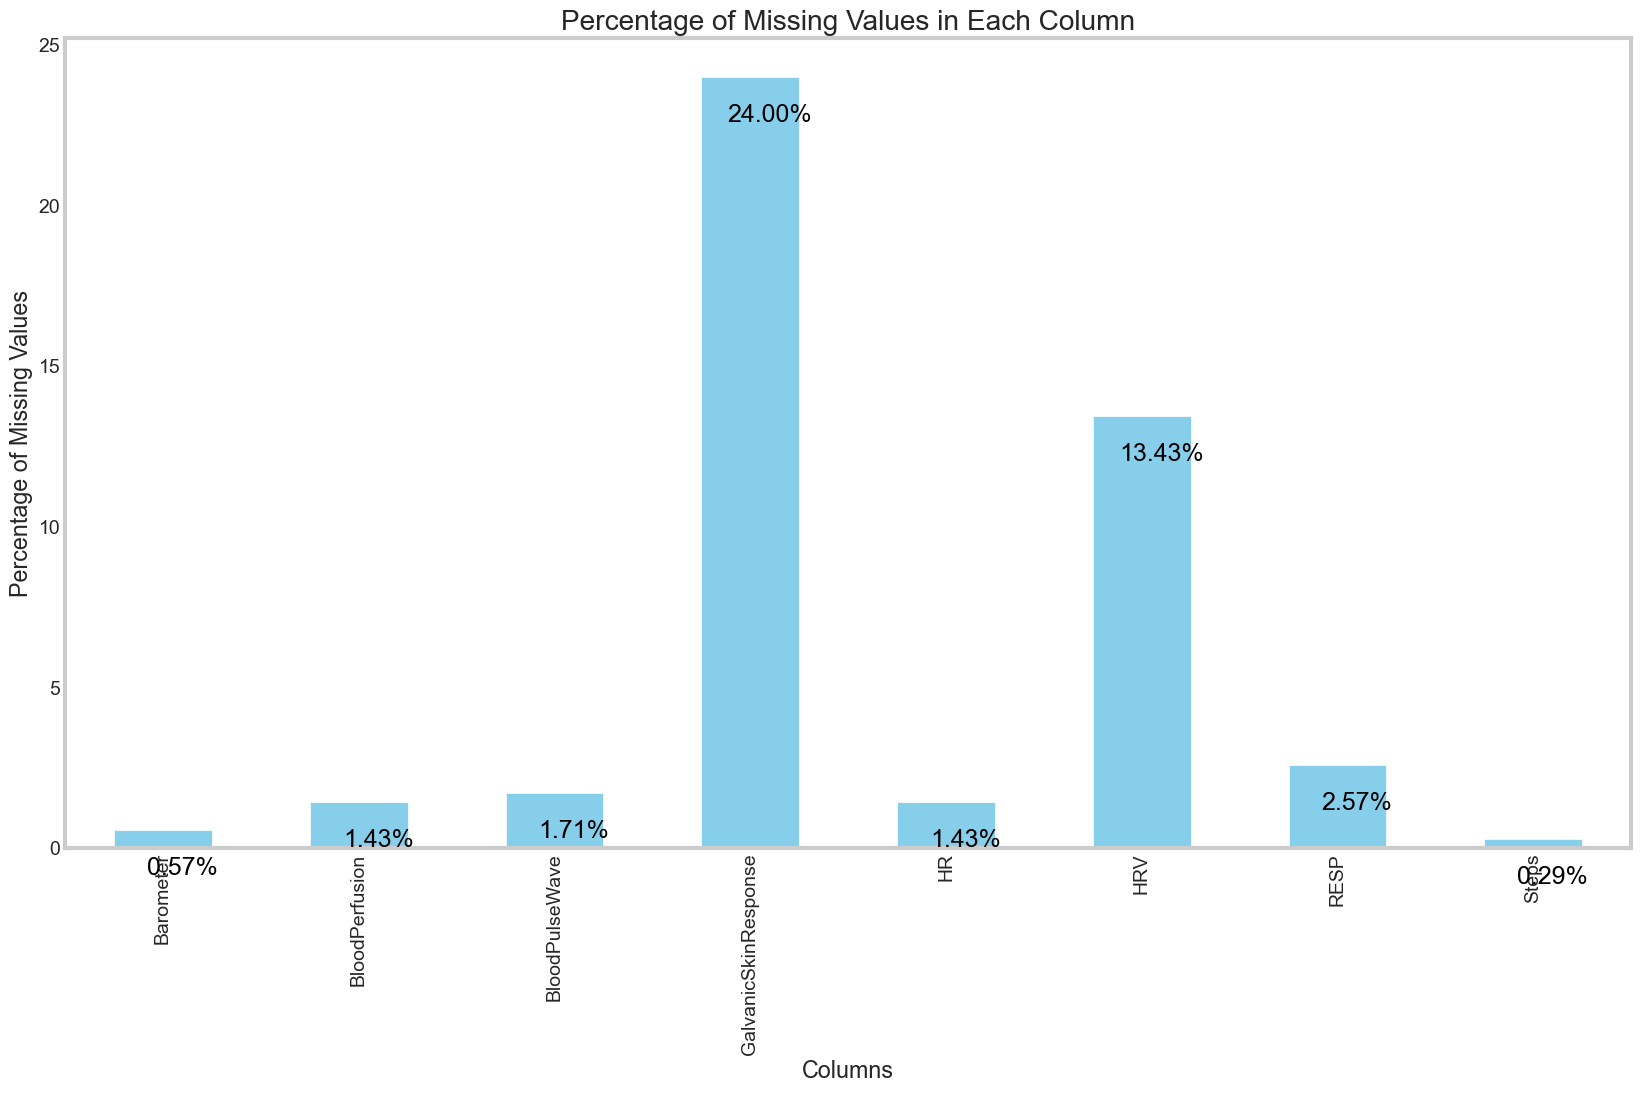

In [45]:
# Set the style of the plots
sns.set_style("whitegrid", {'axes.grid' : False})
# Assuming 'df' is your DataFrame
missing_percentages = df.isnull().mean() * 100
missing_percentages = missing_percentages[missing_percentages > 0]

# Plotting the graph
plt.figure(figsize=(18, 10))
ax = missing_percentages.plot(kind='bar', color='skyblue')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height():.2f}%', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='black', size=18)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [47]:
data=df.copy()
subjects = data['SubjectID'].unique()

for subject in subjects:
    # Get the subset of the DataFrame for this subject
    subject_df = data[data['SubjectID'] == subject]
    
     # Define the columns for which missing values will be filled
    columns_with_missing_values = subject_df.columns[subject_df.isnull().any()].tolist()
    
    # Loop through each column and fill missing values based on the specified conditions
    for col in columns_with_missing_values:
    
    # Fill missing values in this subset with mean (or any other value or method you prefer)
        subject_df[col].fillna(subject_df[col].mean(), inplace=True)
    
    # Update the original DataFrame with the filled values
    data.update(subject_df)

print(data.isna().sum())

Timestamp                   0
ActivityCounts              0
Barometer                   0
BloodPerfusion              0
BloodPulseWave              0
EnergyExpenditure           0
GalvanicSkinResponse       11
HR                          0
HRV                         5
RESP                        0
Steps                       0
SkinTemperature             0
SubjectID                   0
VAS                         0
RelP                        0
PhF                         0
MF                          0
Age range                   0
Gender                      0
ActivityClass_biking        0
ActivityClass_other         0
ActivityClass_resting       0
ActivityClass_running       0
ActivityClass_undefined     0
ActivityClass_walking       0
dtype: int64


In [48]:
data['VAS'] = data['VAS'].astype(int)

data.isna().sum()

# Assuming '36-45' is an 'Age range' category
age_mapping = {'26-35': 1,'36-45': 2,   '46-55': 3}
gender_mapping={"M":1, "F":0}
data['Age range'] = data['Age range'].map(age_mapping)
data['Gender'] = data['Gender'].map(gender_mapping)
data

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-06-05 18:49:00        5.098039     990.30            0.36   
1   2019-07-05 17:39:00        0.784314     982.30            0.36   
2   2019-08-05 19:13:00        0.784314     975.35            0.79   
3   2019-09-05 21:08:00        1.176471     978.40            0.55   
4   2019-10-05 14:27:00        0.784314     980.80            0.40   
..                  ...             ...        ...             ...   
345 2019-08-05 19:13:00        0.784314     975.35            0.79   
346 2019-09-05 21:08:00        1.176471     978.40            0.55   
347 2019-10-05 14:27:00        0.784314     980.80            0.40   
348 2019-11-05 17:31:00        0.784314     984.50            0.69   
349 2019-12-05 18:14:00        2.352941     997.20            0.32   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              3.68        2156.289318              3.437194  84.455276   
1              1.42        1330.995827              4.937549  60.564220   
2              1.42        1330.995827              4.728083  58.534651   
3              1.81        1330.995827              1.104944  69.785286   
4              1.48        1330.995827              1.833883  57.934461   
..              ...                ...                   ...        ...   
345            1.42        1330.995827              2.658671  58.534651   
346            1.81        1330.995827              2.658671  69.785286   
347            1.48        1330.995827              2.658671  57.934461   
348            2.30        1330.995827              2.658671  66.016667   
349            3.07        1330.995827              2.658671  76.561253   

           HRV       RESP  Steps  SkinTemperature  SubjectID  VAS  RelP  PhF  \
0    29.133333  25.304348  111.0            33.69          9    1   1.0  1.0   
1    35.000000  14.348831    0.0            34.47          9    1   1.0  1.0   
2    33.251923  13.850000    0.0            33.56          9    1  -1.0  0.0   
3    52.966667  15.033377    0.0            33.56          9    1   0.0  0.0   
4    32.065970  13.695884    0.0            34.28          9    1   0.0  0.0   
..         ...        ...    ...              ...        ...  ...   ...  ...   
345  33.251923  13.850000    0.0            33.56          9    1  -1.0  0.0   
346  52.966667  15.033377    0.0            33.56          9    1   0.0  0.0   
347  32.065970  13.695884    0.0            34.28          9    1   0.0  0.0   
348  23.193151  21.119940    0.0            35.00          9    1  -1.0  0.0   
349  41.466667  21.551075    0.0            34.72          9    1   1.0  1.0   

      MF  Age range  Gender  ActivityClass_biking  ActivityClass_other  \
0    0.0          2       1                     0                    0   
1    0.0          2       1                     0                    0   
2    0.0          2       1                     0                    0   
3    0.0          2       1                     0                    0   
4    0.0          2       1                     0                    0   
..   ...        ...     ...                   ...                  ...   
345  0.0          2       1                     0                    0   
346  0.0          2       1                     0                    0   
347  0.0          2       1                     0                    0   
348  0.0          2       1                     0                    0   
349  0.0          2       1                     0                    0   

     ActivityClass_resting  ActivityClass_running  ActivityClass_undefined  \
0                        0                      0                        0   
1                        0                      0                        1   
2                        0                      0                        1   
3                        0                      0                        1   
4                        0      

In [49]:
numerical_df = data.select_dtypes(include=['int64', 'float64'])
data.fillna(numerical_df.mean(),inplace=True)
data.isna().sum()

Timestamp                  0
ActivityCounts             0
Barometer                  0
BloodPerfusion             0
BloodPulseWave             0
EnergyExpenditure          0
GalvanicSkinResponse       0
HR                         0
HRV                        0
RESP                       0
Steps                      0
SkinTemperature            0
SubjectID                  0
VAS                        0
RelP                       0
PhF                        0
MF                         0
Age range                  0
Gender                     0
ActivityClass_biking       0
ActivityClass_other        0
ActivityClass_resting      0
ActivityClass_running      0
ActivityClass_undefined    0
ActivityClass_walking      0
dtype: int64

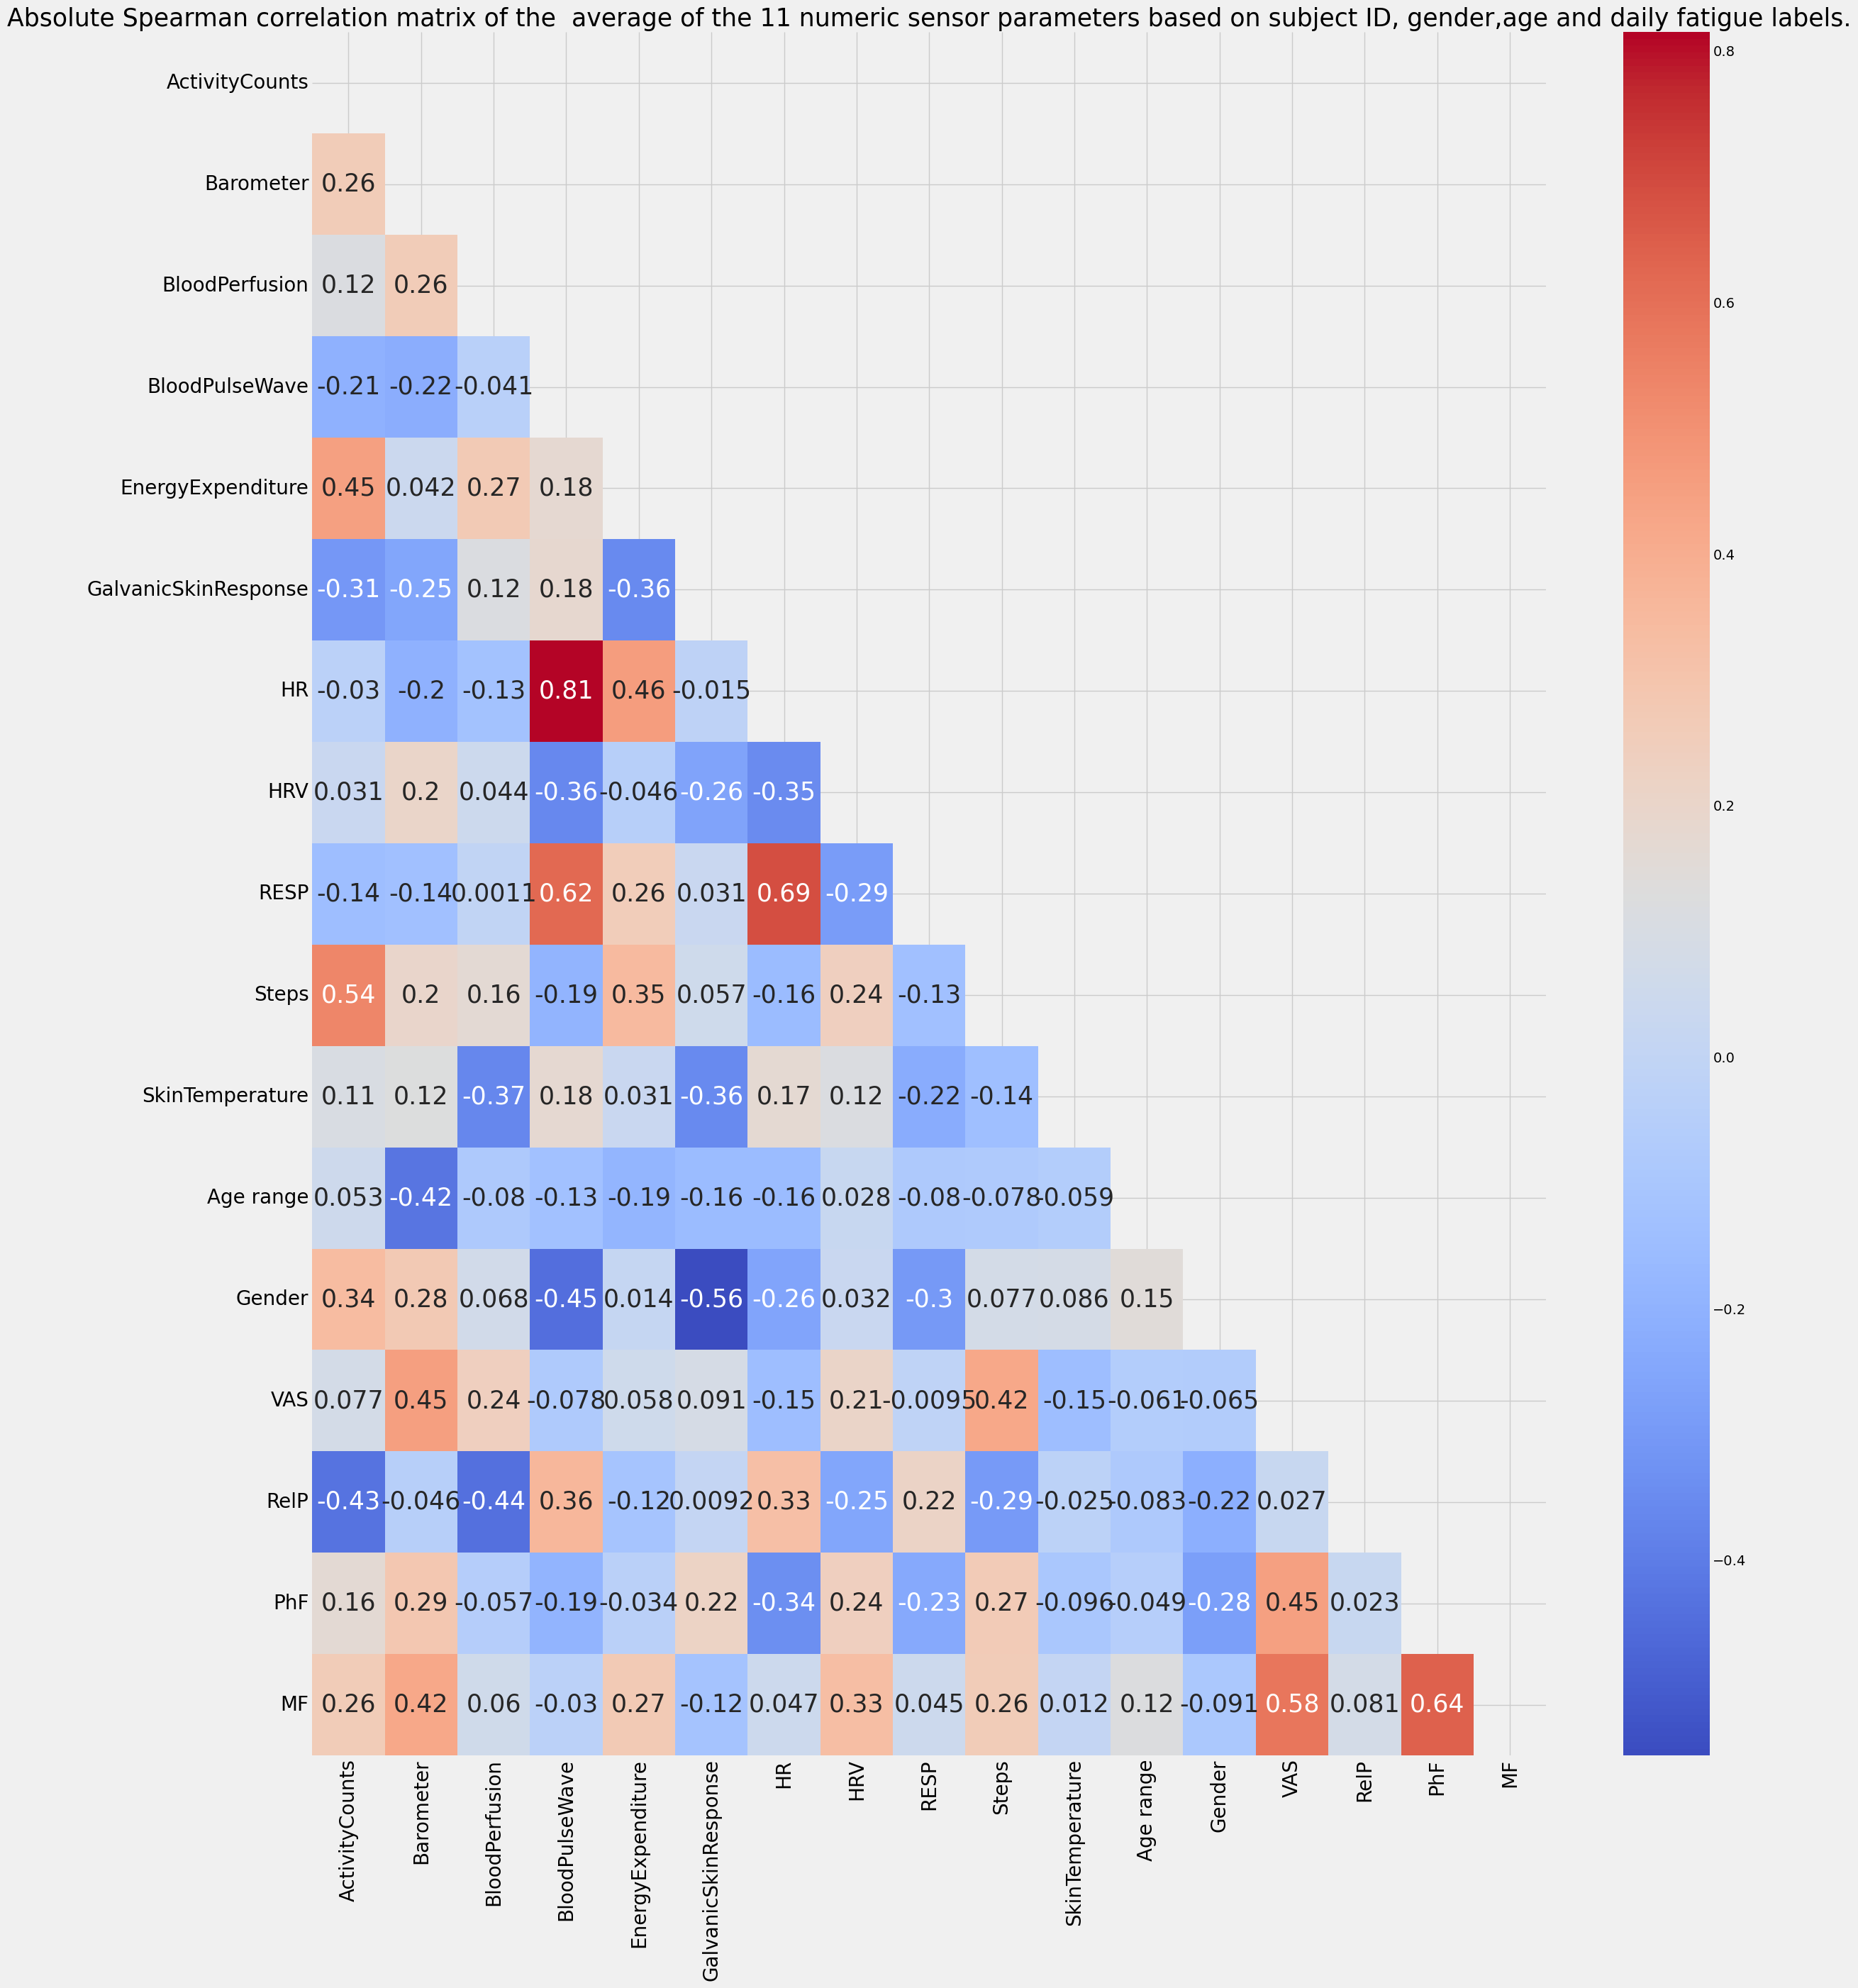

In [50]:
# Calculate the Spearman correlation
matrix = np.triu(sensor_data_fat.corr(method='spearman'))


# Create the heatmap
plt.figure(figsize=(25,30))
sns.heatmap(sensor_data_fat.corr(method='spearman'), annot=True, mask=matrix, cmap='coolwarm',annot_kws={"size": 25})
plt.title('Absolute Spearman correlation matrix of the  average of the 11 numeric sensor parameters based on subject ID, gender,age and daily fatigue labels.', size=25)
plt.xticks(size=20)  # Change the size of the x-axis tick labels
plt.yticks(size=20)
plt.show()


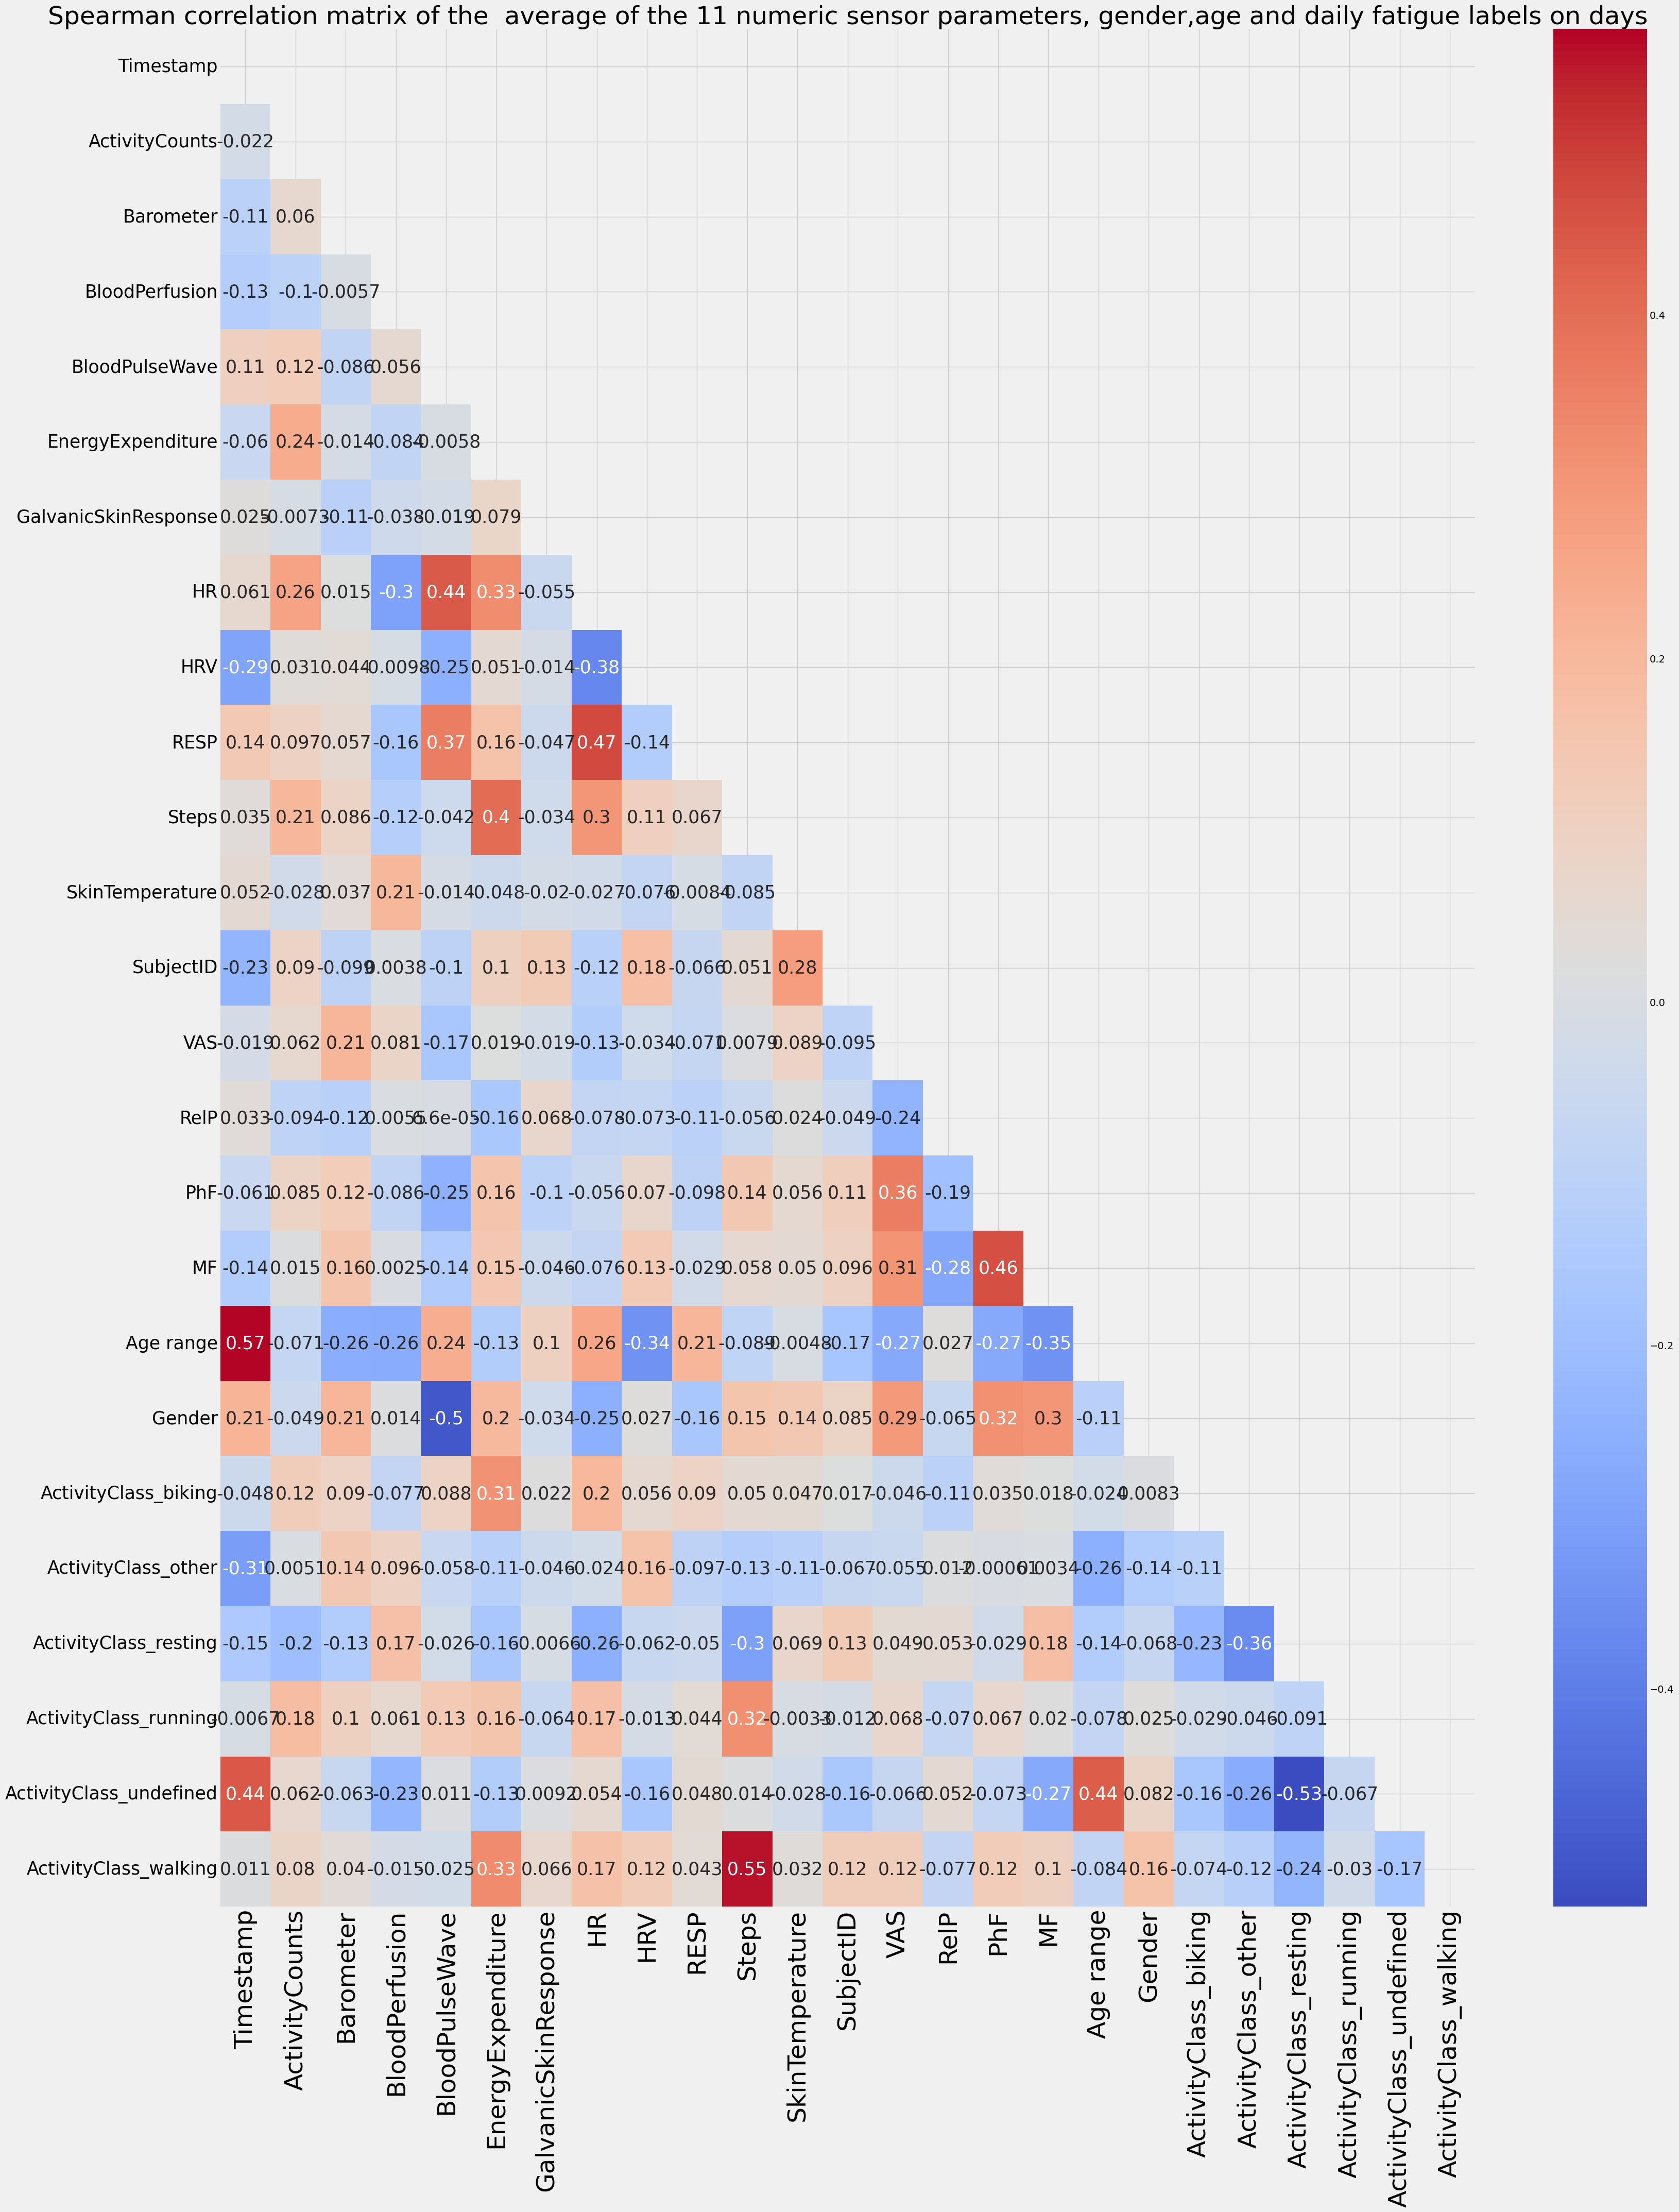

In [51]:
matrix = np.triu(data.corr(method='spearman'))

# Create the heatmap
plt.figure(figsize=(35,45))
sns.heatmap(data.corr(method='spearman'), annot=True, mask=matrix, cmap='coolwarm',annot_kws={"size": 25})
plt.title('Spearman correlation matrix of the  average of the 11 numeric sensor parameters, gender,age and daily fatigue labels on days', size=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=25)
plt.show()


In [52]:
data.columns

Index(['Timestamp', 'ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature', 'SubjectID', 'VAS', 'RelP',
       'PhF', 'MF', 'Age range', 'Gender', 'ActivityClass_biking',
       'ActivityClass_other', 'ActivityClass_resting', 'ActivityClass_running',
       'ActivityClass_undefined', 'ActivityClass_walking'],
      dtype='object')

## Step 4.1: Data Set Preparation for Model Implementation

In this step, the dataset will be prepared for model implementation. Various tasks will be performed, including data cleaning, normalization, and encoding categorical variables.



In [53]:


# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to be used for normalization
columns_for_normalization = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature','ActivityClass_biking', 'ActivityClass_other', 'ActivityClass_resting',
       'ActivityClass_running', 'ActivityClass_undefined',
       'ActivityClass_walking', 'Age range', 'Gender']

# Fit the scaler to the selected columns in the DataFrame
scaler.fit(data[columns_for_normalization])

# Normalize the selected columns in the DataFrame
data[columns_for_normalization] = scaler.transform(data[columns_for_normalization])

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                350 non-null    datetime64[ns]
 1   ActivityCounts           350 non-null    float64       
 2   Barometer                350 non-null    float64       
 3   BloodPerfusion           350 non-null    float64       
 4   BloodPulseWave           350 non-null    float64       
 5   EnergyExpenditure        350 non-null    float64       
 6   GalvanicSkinResponse     350 non-null    float64       
 7   HR                       350 non-null    float64       
 8   HRV                      350 non-null    float64       
 9   RESP                     350 non-null    float64       
 10  Steps                    350 non-null    float64       
 11  SkinTemperature          350 non-null    float64       
 12  SubjectID                350 non-nul

In [55]:
# Extracting features and target variables
X = data.drop(columns=["Timestamp", 'VAS','RelP', 'PhF', 'MF','SubjectID'])
y1 = data["PhF"]
y2 = data["MF"]

In [56]:
y2.value_counts()

MF
1.0    232
0.0    118
Name: count, dtype: int64

## Step 5. Working with models

In [58]:
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Function to train models and evaluate performance
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    clf = model
    strat_k_fold = StratifiedKFold(n_splits=5)
    
    # Define dictionary of scoring methods
    scoring = {'accuracy': make_scorer(accuracy_score), 
               'precision': make_scorer(precision_score, average='binary'),
               'recall': make_scorer(recall_score, average='binary'), 
               'f1_score': make_scorer(f1_score, average='binary')}
    
    # Perform cross-validation
    scores = cross_validate(clf, X, y1, cv=strat_k_fold, scoring=scoring)
    
    # Storing the evaluation metrics in a dictionary
    d['Name'].append(name)
    d['Testing Accuracy[%]'].append("{:.4f}±{:.4f}".format(scores['test_accuracy'].mean() * 100, np.std(scores['test_accuracy'])))
    d['Weighted Precision'].append("{:.4f}±{:.4f}".format(scores['test_precision'].mean(), np.std(scores['test_precision'])))
    d['Weighted Recall'].append("{:.4f}±{:.4f}".format(scores['test_recall'].mean(), np.std(scores['test_recall'])))
    d['Weighted F1-Score'].append("{:.4f}±{:.4f}".format(scores['test_f1_score'].mean(), np.std(scores['test_f1_score'])))
    

    print("**********" * 5)
    print()
    return d

# Dictionary to store the evaluation metrics
d = {'Name': [],
     'Testing Accuracy[%]': [],  'Weighted Precision': [],  'Weighted Recall': [], 'Weighted F1-Score': []}


# List of models to be trained and evaluated
models = [
    [RandomForestClassifier(n_estimators=350, random_state=seed), 'Random Forest'],
    [DecisionTreeClassifier(random_state=seed), 'Decision Tree'], 
    [LGBMClassifier(random_state=seed), 'LightGBM'],
    [MLPClassifier(max_iter=1000, random_state=seed), "MlpClassifer"],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(random_state=seed), 'Logistic Regression'], 
    [SVC(random_state=seed, probability=True), 'Support Vector Machine'],
    [XGBClassifier(random_state=seed), 'XGBoost'],
]

# Training the models and storing the results in the dictionary
for model in models:
    d = Models(model[0], model[1], d)

# Creating a dataframe from the dictionary
print("Performance Metric for single Algorithim for physical Fatigue")
acu_data = pd.DataFrame(data=d)
acu_data



Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 202, number of negative: 78
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.721429 -> initscore=0.951559
[LightGBM] [Info] Start training from score 0.951559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 202, number of negative: 78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.721429 -> initscore=0.951559
[LightGBM] [Info] Start training from score 0.951559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Name Testing Accuracy[%] Weighted Precision  \
0           Random Forest      75.4286±0.1104      0.7811±0.0639   
1           Decision Tree      67.1429±0.1777      0.8038±0.0637   
2                LightGBM      74.2857±0.0986      0.7785±0.0483   
3            MlpClassifer      70.0000±0.1331      0.7808±0.0682   
4             Naive Bayes      39.4286±0.0946      0.8973±0.1223   
5     Logistic Regression      68.8571±0.1273      0.7407±0.0578   
6  Support Vector Machine      62.5714±0.1217      0.6967±0.0439   
7                 XGBoost      72.0000±0.1152      0.7751±0.0627   

  Weighted Recall Weighted F1-Score  
0   0.9169±0.0947     0.8427±0.0734  
1   0.7080±0.2513     0.7296±0.1928  
2   0.8972±0.0963     0.8329±0.0680  
3   0.8098±0.1670     0.7888±0.1060  
4   0.1853±0.1402     0.2850±0.1759  
5   0.8608±0.1723     0.7913±0.1109  
6   0.8377±0.1921     0.7535±0.1049  
7   0.8613±0.1162     0.8140±0.0812

#### Mental Fatigue 

In [59]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Function to train models and evaluate performance
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    clf = model
    strat_k_fold = StratifiedKFold(n_splits=5)
    
    # Define dictionary of scoring methods
    scoring = {'accuracy': make_scorer(accuracy_score), 
               'precision': make_scorer(precision_score, average='binary'),
               'recall': make_scorer(recall_score, average='binary'), 
               'f1_score': make_scorer(f1_score, average='binary')}
    
    # Perform cross-validation
    scores = cross_validate(clf, X, y2, cv=strat_k_fold, scoring=scoring)
    
    # Storing the evaluation metrics in a dictionary
    d['Name'].append(name)
    d['Testing Accuracy[%]'].append("{:.4f}±{:.4f}".format(scores['test_accuracy'].mean() * 100, np.std(scores['test_accuracy'])))
    d['Weighted Precision'].append("{:.4f}±{:.4f}".format(scores['test_precision'].mean(), np.std(scores['test_precision'])))
    d['Weighted Recall'].append("{:.4f}±{:.4f}".format(scores['test_recall'].mean(), np.std(scores['test_recall'])))
    d['Weighted F1-Score'].append("{:.4f}±{:.4f}".format(scores['test_f1_score'].mean(), np.std(scores['test_f1_score'])))
    

    print("**********" * 5)
    print()
    return d

# Dictionary to store the evaluation metrics
d = {'Name': [],
     'Testing Accuracy[%]': [],  'Weighted Precision': [],  'Weighted Recall': [], 'Weighted F1-Score': []}


# List of models to be trained and evaluated
models = [
    [RandomForestClassifier(n_estimators=350, random_state=seed), 'Random Forest'],
    [DecisionTreeClassifier(random_state=seed), 'Decision Tree'], 
    [LGBMClassifier(random_state=seed), 'LightGBM'],
    [MLPClassifier(max_iter=1000, random_state=seed), "MlpClassifer"],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(random_state=seed), 'Logistic Regression'], 
    [SVC(random_state=seed, probability=True), 'Support Vector Machine'],
    [XGBClassifier(random_state=seed), 'XGBoost'],
]

# Training the models and storing the results in the dictionary
for model in models:
    d = Models(model[0], model[1], d)

# Creating a dataframe from the dictionary
print("Performance Metric for single Algo for Mental Fatigue")
acu_data = pd.DataFrame(data=d)
acu_data



Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 186, number of negative: 94
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.664286 -> initscore=0.682452
[LightGBM] [Info] Start training from score 0.682452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Name Testing Accuracy[%] Weighted Precision  \
0           Random Forest      72.5714±0.1953      0.8082±0.1552   
1           Decision Tree      65.4286±0.1505      0.7822±0.0753   
2                LightGBM      74.0000±0.1758      0.8042±0.1374   
3            MlpClassifer      70.0000±0.1598      0.7641±0.0942   
4             Naive Bayes      58.2857±0.1151      0.7739±0.0877   
5     Logistic Regression      65.7143±0.0658      0.7363±0.0439   
6  Support Vector Machine      62.0000±0.1592      0.6876±0.1188   
7                 XGBoost      74.8571±0.1444      0.8216±0.1021   

  Weighted Recall Weighted F1-Score  
0   0.7669±0.2917     0.7581±0.2209  
1   0.6718±0.2548     0.6908±0.1867  
2   0.8104±0.2162     0.7950±0.1553  
3   0.7669±0.2332     0.7536±0.1683  
4   0.5638±0.2663     0.5998±0.2065  
5   0.7762±0.1985     0.7379±0.0875  
6   0.7324±0.2839     0.6895±0.1954  
7   0.8018±0.2105     0.7964±0.1335

### Confusion Matrix and p-value

In [60]:
from scipy.stats import chi2_contingency


In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency
import numpy as np

# Function to train models and evaluate performance
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    clf = model
    
    # Define StratifiedKFold instance
    skf = StratifiedKFold(n_splits=5)
    
    # Initialize lists to store metrics
    TP_list, TN_list, FP_list, FN_list, p_list, test_set_error_list, mean_error_list = [], [], [], [], [], [], []
    
    # Perform cross-validation
    # Perform cross-validation
    for train_index, val_index in skf.split(X, y1):
        xtrain, xVal = X.iloc[train_index], X.iloc[val_index]
        y1train, y1Val = y1.iloc[train_index], y1.iloc[val_index]

        
        clf.fit(xtrain, y1train)
        predicted = clf.predict(xVal)
        te_confusion_matrix = confusion_matrix(y1Val, predicted)
        
        # Extracting True Positive, True Negative, False Positive, and False Negative from the confusion matrix
        TP = te_confusion_matrix[1, 1]
        TN = te_confusion_matrix[0, 0]
        FP = te_confusion_matrix[0, 1]
        FN = te_confusion_matrix[1, 0]
        
        # Applying McNemar's test
        chi2, p, dof, ex = chi2_contingency(te_confusion_matrix)
        
        # Calculating the test set error
        test_set_error = (FP + FN) / float(TP + TN + FP + FN)
        
        # Calculating the mean error
        mean_error = (FP + FN) / 2.0
        
        # Append to lists
        TP_list.append(TP)
        TN_list.append(TN)
        FP_list.append(FP)
        FN_list.append(FN)
        p_list.append(p)
        test_set_error_list.append(test_set_error)
        mean_error_list.append(mean_error)
    
    # Storing the evaluation metrics in a dictionary
    d['Name'].append(name)
    d['True Positive'].append(np.mean(TP_list))
    d['True Negative'].append(np.mean(TN_list))
    d['False Positive'].append(np.mean(FP_list))
    d['False Negative'].append(np.mean(FN_list))
    d['McNemar p-value'].append(np.mean(p_list))
    d['Test Set Error'].append(np.mean(test_set_error_list))
    d['Mean Error'].append(np.mean(mean_error_list))
    
    print("**********" * 5)
    print()
    return d

# Dictionary to store the evaluation metrics
d = {'Name': [], 'True Positive': [], 'True Negative': [], 'False Positive': [], 'False Negative': [],
     'McNemar p-value': [], 'Test Set Error': [], 'Mean Error': []}

# List of models to be trained and evaluated
models = [
    [RandomForestClassifier(n_estimators=350, random_state=seed), 'Random Forest'],
    [DecisionTreeClassifier(random_state=seed), 'Decision Tree'], 
    [LGBMClassifier(random_state=seed), 'LightGBM'],
    [MLPClassifier(max_iter=1000, random_state=seed), "MlpClassifer"],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(random_state=seed), 'Logistic Regression'], 
    #[SVC(random_state=seed, probability=True), 'Support Vector Machine'],
    [XGBClassifier(random_state=seed), 'XGBoost'],
]

# Training the models and storing the results in the dictionary
for model in models:
    d = Models(model[0], model[1], d)

# Creating a dataframe from the dictionary
print("Performance Metric for single Algorithm(confusion matrix) for Physical Fatigue")
acu_data = pd.DataFrame(data=d)
acu_data



Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 202, number of negative: 78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.721429 -> initscore=0.951559
[LightGBM] [Info] Start training from score 0.951559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 202, number of negative: 78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

**************************************************

Working on Naive Bayes model
**************************************************

Working on Logistic Regression model
**************************************************

Working on XGBoost model
**************************************************

Performance Metric for single Algorithm(confusion matrix) for Physical Fatigue


Name  True Positive  True Negative  False Positive  \
0        Random Forest           46.4            6.4            13.0   
1        Decision Tree           35.8           11.2             8.2   
2             LightGBM           45.4            6.6            12.8   
3         MlpClassifer           41.0            8.0            11.4   
4          Naive Bayes            9.4           18.2             1.2   
5  Logistic Regression           43.6            4.6            14.8   
6              XGBoost           43.6            6.8            12.6   

   False Negative  McNemar p-value  Test Set Error  Mean Error  
0             4.2         0.388787        0.245714         8.6  
1            14.8         0.446534        0.328571        11.5  
2             5.2         0.234133        0.257143         9.0  
3             9.6         0.301598        0.300000        10.5  
4            41.2         0.499592        0.605714        21.2  
5             7.0         0.436794        0.311429        10.9  
6             7.0         0.279452        0.280000         9.8

### Mental Fatigue

In [62]:
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency
import numpy as np

# Function to train models and evaluate performance
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    clf = model
    
    # Define StratifiedKFold instance
    skf = StratifiedKFold(n_splits=5)
    
    # Initialize lists to store metrics
    TP_list, TN_list, FP_list, FN_list, p_list, test_set_error_list, mean_error_list = [], [], [], [], [], [], []
    
    
    # Perform cross-validation
    for train_index, val_index in skf.split(X, y2):
        xtrain, xVal = X.iloc[train_index], X.iloc[val_index]
        y2train, y2Val = y1.iloc[train_index], y2.iloc[val_index]
    
    

        
        clf.fit(xtrain, y2train)
        predicted = clf.predict(xVal)
        te_confusion_matrix = confusion_matrix(y2Val, predicted)
        
        # Extracting True Positive, True Negative, False Positive, and False Negative from the confusion matrix
        TP = te_confusion_matrix[1, 1]
        TN = te_confusion_matrix[0, 0]
        FP = te_confusion_matrix[0, 1]
        FN = te_confusion_matrix[1, 0]
        
        # Applying McNemar's test
        chi2, p, dof, ex = chi2_contingency(te_confusion_matrix)
        
        # Calculating the test set error
        test_set_error = (FP + FN) / float(TP + TN + FP + FN)
        
        # Calculating the mean error
        mean_error = (FP + FN) / 2.0
        
        # Append to lists
        TP_list.append(TP)
        TN_list.append(TN)
        FP_list.append(FP)
        FN_list.append(FN)
        p_list.append(p)
        test_set_error_list.append(test_set_error)
        mean_error_list.append(mean_error)
    
    # Storing the evaluation metrics in a dictionary
    d['Name'].append(name)
    d['True Positive'].append(np.mean(TP_list))
    d['True Negative'].append(np.mean(TN_list))
    d['False Positive'].append(np.mean(FP_list))
    d['False Negative'].append(np.mean(FN_list))
    d['McNemar p-value'].append(np.mean(p_list))
    d['Test Set Error'].append(np.mean(test_set_error_list))
    d['Mean Error'].append(np.mean(mean_error_list))
    
    print("**********" * 5)
    print()
    return d

# Dictionary to store the evaluation metrics
d = {'Name': [], 'True Positive': [], 'True Negative': [], 'False Positive': [], 'False Negative': [],
     'McNemar p-value': [], 'Test Set Error': [], 'Mean Error': []}

# List of models to be trained and evaluated
models = [
    [RandomForestClassifier(n_estimators=350, random_state=seed), 'Random Forest'],
    [DecisionTreeClassifier(random_state=seed), 'Decision Tree'], 
    [LGBMClassifier(random_state=seed), 'LightGBM'],
    [MLPClassifier(max_iter=1000, random_state=seed), "MlpClassifer"],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(random_state=seed), 'Logistic Regression'], 
    #[SVC(random_state=seed, probability=True), 'Support Vector Machine'],
    [XGBClassifier(random_state=seed), 'XGBoost'],
]

# Training the models and storing the results in the dictionary
for model in models:
    d = Models(model[0], model[1], d)

# Creating a dataframe from the dictionary
print("Performance Metric for single Algorithm(confusion matrix) for Mental Fatigue")
acu_data = pd.DataFrame(data=d)
acu_data



Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 82
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.707143 -> initscore=0.881548
[LightGBM] [Info] Start training from score 0.881548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 201, number of negative: 79
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.717857 -> initscore=0.933857
[LightGBM] [Info] Start training from score 0.933857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

**************************************************

Working on MlpClassifer model
**************************************************

Working on Naive Bayes model
**************************************************

Working on Logistic Regression model
**************************************************

Working on XGBoost model
**************************************************

Performance Metric for single Algorithm(confusion matrix) for Mental Fatigue


Name  True Positive  True Negative  False Positive  \
0        Random Forest           44.0            7.0            16.6   
1        Decision Tree           37.2           10.8            12.8   
2             LightGBM           42.2            6.8            16.8   
3         MlpClassifer           40.6            9.8            13.8   
4          Naive Bayes            5.8           21.2             2.4   
5  Logistic Regression           40.6            5.8            17.8   
6              XGBoost           42.6            7.0            16.6   

   False Negative  McNemar p-value  Test Set Error  Mean Error  
0             2.4         0.084835        0.271429         9.5  
1             9.2         0.199151        0.314286        11.0  
2             4.2         0.246322        0.300000        10.5  
3             5.8         0.115520        0.280000         9.8  
4            40.6         0.850346        0.614286        21.5  
5             5.8         0.379763        0.337143        11.8  
6             3.8         0.218469        0.291429        10.2

## Hypertunning the Model

### Random Forest

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [63]:
from sklearn.model_selection import cross_val_predict
seed = 42

# Define the scoring functions
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1': make_scorer(f1_score, average='weighted')
}

# Define the StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5)
# Define the hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [3, 10, 50, 100, 300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Evaluate the Random Forest model for physical fatigue
results_dict = {"Physical Fatigue": {}, "Mental Fatigue": {}}
rf = RandomForestClassifier(random_state=seed)
# Modify the GridSearchCV call
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=strat_k_fold, scoring=scoring, n_jobs=-1, refit='Accuracy')
grid_search.fit(X, y1)
best_rf_ = grid_search.best_estimator_
y1_pred = cross_val_predict(best_rf_, X, y1, cv=strat_k_fold)
conf_mat1 = confusion_matrix(y1, y1_pred)

for metric in scoring.keys():
    scores = cross_val_score(best_rf_,X, y1 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Physical Fatigue"][f"Mean {metric}"] = f"{mean_score:.2f}"
    results_dict["Physical Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"

    
# Evaluate the Random Forest model for mental fatigue 
rf = RandomForestClassifier(random_state=seed)
# Modify the GridSearchCV call
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=strat_k_fold, scoring=scoring, n_jobs=-1, refit='Accuracy')
grid_search.fit(X, y2)
best_rf = grid_search.best_estimator_

y2_pred = cross_val_predict(best_rf, X, y2, cv=strat_k_fold)
conf_mat1 = confusion_matrix(y2, y2_pred)

for metric in scoring.keys():
    scores = cross_val_score(best_rf,X, y2 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Mental Fatigue"][f"Mean {metric}"] = f"{mean_score:.4f}"
    results_dict["Mental Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"


In [64]:
pd.DataFrame(data=results_dict)

Physical Fatigue Mental Fatigue
Mean Accuracy              0.76         0.7600
Accuracy Std               0.09           0.12
Mean Precision             0.77         0.7841
Precision Std              0.12           0.10
Mean Recall                0.76         0.7600
Recall Std                 0.09           0.12
Mean F1                    0.73         0.7535
F1 Std                     0.10           0.11

<Axes: title={'center': 'Heatmap for the confusion matrix for Random Forest for Physical Fatigue'}>

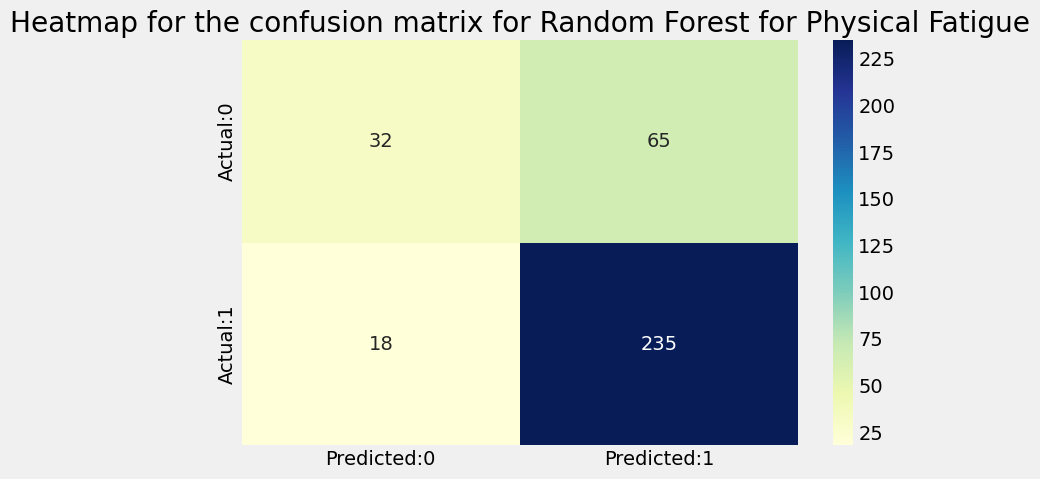

In [69]:
conf_mat=pd.DataFrame(data=conf_mat1,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for Random Forest for Physical Fatigue")
sns.heatmap(conf_mat,annot=True, fmt="d",cmap="YlGnBu")

<Axes: title={'center': 'Heatmap for the confusion matrix for Random Forest for Mental Fatigue'}>

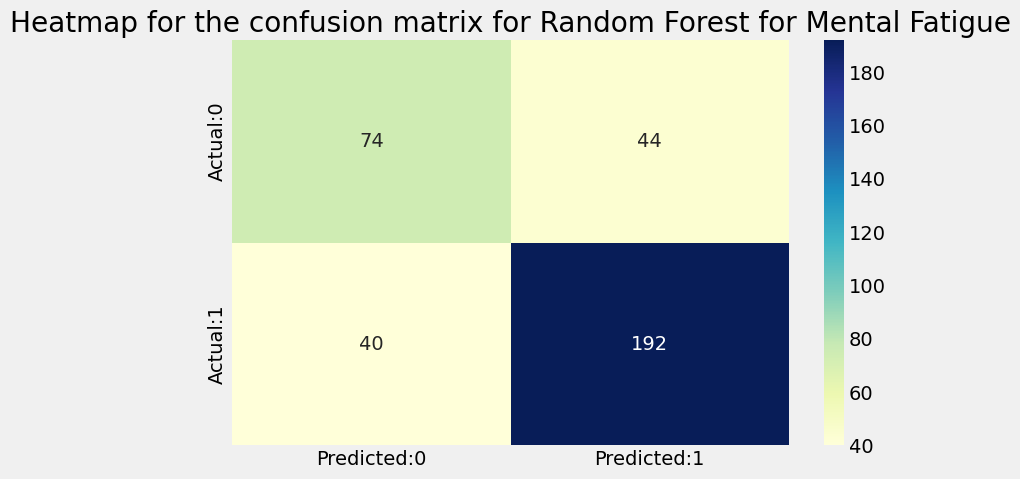

In [67]:
conf_mat1=pd.DataFrame(data=conf_mat1,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for Random Forest for Mental Fatigue")
sns.heatmap(conf_mat1,annot=True, fmt="d",cmap="YlGnBu")

### XGBoost Classifier

In [65]:
import optuna
  # Set the level of log

In [66]:
from sklearn.model_selection import cross_val_predict
seed = 42

# Define the scoring functions
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1': make_scorer(f1_score, average='weighted')
}

# Define the StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5)

# Evaluate the Random Forest model for physical fatigue
results_dict= {"Physical Fatigue": {}, "Mental Fatigue": {}}

# Define the function for the Optuna objective
def objective(trial):
    # Providing a different range of hyperparameters that Optuna will work with
    params = {
        "objective": "binary:logistic",  # for classification tasks
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = xgb.XGBClassifier(**params, random_state=seed)  # using XGBoost classifier
    scores = cross_val_score(model, X, y1, cv=strat_k_fold, scoring=scoring[metric])  # use cross-validation
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    return mean_score  # return the mean score

for metric in scoring.keys():
    study_PH = optuna.create_study(direction='minimize') # creating an Optuna study object
    study_PH.optimize(objective, n_trials=10)
    model = xgb.XGBClassifier(**study_PH.best_params, random_state=seed)  # using the best parameters from the study
    scores = cross_val_score(model, X, y1 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Physical Fatigue"][f"Mean {metric}"] = f"{mean_score:.4f}"
    results_dict["Physical Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"

y1_pred = cross_val_predict(model, X, y1, cv=strat_k_fold)
conf_mat_xph = confusion_matrix(y1, y1_pred)
    
    
# Define the function for the Optuna objective
def objective(trial):
    # Providing a different range of hyperparameters that Optuna will work with
    params = {
        "objective": "binary:logistic",  # for classification tasks
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = xgb.XGBClassifier(**params, random_state=seed)  # using XGBoost classifier
    scores = cross_val_score(model, X, y2, cv=strat_k_fold, scoring=scoring[metric])  # use cross-validation
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    return mean_score  # return the mean score

for metric in scoring.keys():
    study_PH = optuna.create_study(direction='minimize') # creating an Optuna study object
    study_PH.optimize(objective, n_trials=10)
    model = xgb.XGBClassifier(**study_PH.best_params, random_state=seed)  # using the best parameters from the study
    scores = cross_val_score(model, X, y2 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Mental Fatigue"][f"Mean {metric}"] = f"{mean_score:.4f}"
    results_dict["Mental Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"
    
    
y2_pred = cross_val_predict(model, X, y2, cv=strat_k_fold)
conf_mat_xmf = confusion_matrix(y2, y2_pred)



[I 2023-12-19 10:57:26,052] A new study created in memory with name: no-name-fb747d95-6437-42c5-9ebf-2718a7f5f5eb
[I 2023-12-19 10:57:30,036] Trial 0 finished with value: 0.7228571428571429 and parameters: {'learning_rate': 0.004071237835000423, 'max_depth': 3, 'subsample': 0.3408360359542225, 'colsample_bytree': 0.4568484551823874, 'min_child_weight': 12}. Best is trial 0 with value: 0.7228571428571429.
[I 2023-12-19 10:57:34,042] Trial 1 finished with value: 0.7228571428571429 and parameters: {'learning_rate': 0.0017219354986648886, 'max_depth': 1, 'subsample': 0.2758537725203401, 'colsample_bytree': 0.7825746481607806, 'min_child_weight': 10}. Best is trial 0 with value: 0.7228571428571429.
[I 2023-12-19 10:57:43,102] Trial 2 finished with value: 0.72 and parameters: {'learning_rate': 0.02912532887426116, 'max_depth': 1, 'subsample': 0.880354770439548, 'colsample_bytree': 0.14223618220845097, 'min_child_weight': 3}. Best is trial 2 with value: 0.72.
[I 2023-12-19 10:57:46,877] Trial

[I 2023-12-19 10:59:40,822] Trial 8 finished with value: 0.7085714285714285 and parameters: {'learning_rate': 0.07763563694605956, 'max_depth': 9, 'subsample': 0.2267148029895555, 'colsample_bytree': 0.7265304447155864, 'min_child_weight': 6}. Best is trial 0 with value: 0.7057142857142857.
[I 2023-12-19 10:59:46,645] Trial 9 finished with value: 0.7228571428571429 and parameters: {'learning_rate': 0.024519537649484762, 'max_depth': 6, 'subsample': 0.15521422409206784, 'colsample_bytree': 0.5036140286867089, 'min_child_weight': 9}. Best is trial 0 with value: 0.7057142857142857.
[I 2023-12-19 10:59:47,683] A new study created in memory with name: no-name-05749034-0751-437f-a9cb-cc6fa6b2d1ff
[I 2023-12-19 10:59:55,400] Trial 0 finished with value: 0.695232749706434 and parameters: {'learning_rate': 0.07610730485960666, 'max_depth': 8, 'subsample': 0.8282865234344978, 'colsample_bytree': 0.2758523672393523, 'min_child_weight': 11}. Best is trial 0 with value: 0.695232749706434.
[I 2023-1

[I 2023-12-19 11:02:19,778] Trial 5 finished with value: 0.8171314024696923 and parameters: {'learning_rate': 0.036653413048783265, 'max_depth': 3, 'subsample': 0.6672313429964006, 'colsample_bytree': 0.36778168911099507, 'min_child_weight': 1}. Best is trial 1 with value: 0.4394285714285714.
[I 2023-12-19 11:02:23,660] Trial 6 finished with value: 0.7003146670746202 and parameters: {'learning_rate': 0.07640499420030802, 'max_depth': 10, 'subsample': 0.5525500616529185, 'colsample_bytree': 0.7168276829396996, 'min_child_weight': 14}. Best is trial 1 with value: 0.4394285714285714.
[I 2023-12-19 11:02:32,617] Trial 7 finished with value: 0.7706637285173104 and parameters: {'learning_rate': 0.006405876973418236, 'max_depth': 10, 'subsample': 0.878178704589193, 'colsample_bytree': 0.8114582394452758, 'min_child_weight': 3}. Best is trial 1 with value: 0.4394285714285714.
[I 2023-12-19 11:02:45,197] Trial 8 finished with value: 0.8097665968215715 and parameters: {'learning_rate': 0.0273920

In [67]:
pd.DataFrame(data=results_dict)

Physical Fatigue Mental Fatigue
Mean Accuracy            0.7171         0.6629
Accuracy Std               0.02           0.01
Mean Precision           0.5226         0.4394
Precision Std              0.01           0.01
Mean Recall              0.7171         0.6629
Recall Std                 0.02           0.01
Mean F1                  0.6066         0.5285
F1 Std                     0.01           0.01

<Axes: title={'center': 'Heatmap for the confusion matrix for Xgboost Physical fatigue'}>

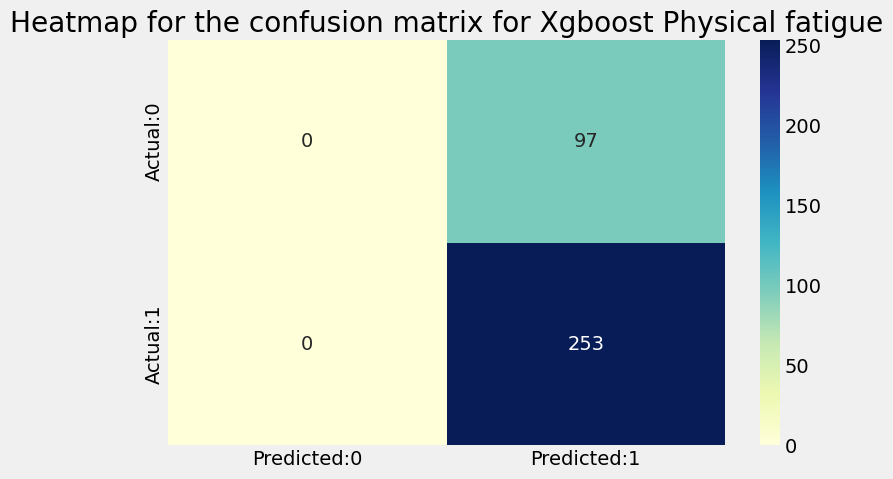

In [68]:

conf_matrix=pd.DataFrame(data=conf_mat_xph,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for Xgboost Physical fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")


<Axes: title={'center': 'Heatmap for the confusion matrix for Xgboost Mental fatigue'}>

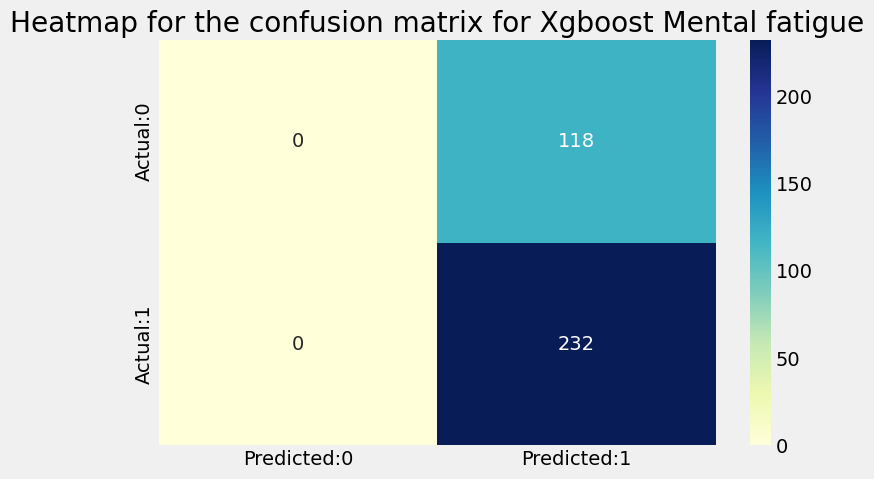

In [69]:

conf_matrix=pd.DataFrame(data=conf_mat_xmf,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for Xgboost Mental fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

### Convolutional Neural Networks (CNN)  for Deep Learning

In [70]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


num_features = X.shape[1]
num_classes = len(set(y1))

# Assuming you have X_train, y_train as your training data
# and X_test, y_test as your test data

seed = 123
np.random.seed(seed)
np.random.seed(123)
tf.random.set_seed(1234)

def build_model(hp):
    # Set the random seed
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(
            filters=hp.Int('hidden_neurons_conv1', min_value=32, max_value=128, step=32),
            kernel_size=hp.Int('kernel_size_conv1', min_value=3, max_value=5, step=2),
            activation='relu',
            input_shape=(num_features, 1)
        ),
        tf.keras.layers.Conv1D(
            filters=hp.Int('hidden_neurons_conv2', min_value=32, max_value=128, step=32),
            kernel_size=hp.Int('kernel_size_conv2', min_value=3, max_value=5, step=2),
            activation='relu'
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            units=hp.Int('hidden_neurons_fc1', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate_fc1', min_value=0.0, max_value=0.5)),
        tf.keras.layers.Dense(
            units=hp.Int('hidden_neurons_fc2', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate_fc2', min_value=0.0, max_value=0.5)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    # Use a variable learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Define the StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the performance metric functions
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize lists to store metrics
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Loop through the folds
for train_index, test_index in strat_k_fold.split(X, y1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
    )
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 callbacks=[early_stopping]) 
    # Get the optimal hyperparameters
    best_hps_cnn=tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
    model = tuner.hypermodel.build(best_hps_cnn)
    if model is not None:
        history = model.fit(X_train, y_train,
                            epochs=100,
                            validation_data=(X_test, y_test))

        val_acc_per_epoch = history.history['val_accuracy']
        best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
        print('Best epoch: %d' % (best_epoch,))
        hypermodel = tuner.hypermodel.build(best_hps_cnn)

        # Retrain the model
        history=hypermodel.fit(X_train, y_train,
                       epochs=best_epoch,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping],
                       verbose=1)
        
        y_pred_val = np.argmax(hypermodel.predict(X_test), axis=-1)

        # Calculate performance metrics
        accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_val)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
        
        
# Make predictions
y_pred = np.argmax(hypermodel.predict(X), axis=-1)
conf_mat1 = confusion_matrix(y1, y_pred)
conf_mat1
        
        
# Calculate mean and standard deviation of metrics
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Print or use the metrics as needed
print(f'Mean Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')
print(f'Mean Precision: {mean_precision:.2f} ± {std_precision:.2f}')
print(f'Mean Recall: {mean_recall:.2f} ± {std_recall:.2f}')
print(f'Mean F1 Score: {mean_f1:.2f} ± {std_f1:.2f}')


Using TensorFlow backend
Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 8s 140ms/step - loss: 0.5960 - accuracy: 0.6964 - val_loss: 0.5243 - val_accuracy: 0.7286
Epoch 2/100
9/9 [==============================] - 0s 20ms/step - loss: 0.5038 - accuracy: 0.7214 - val_loss: 0.4757 - val_accuracy: 0.7286
Epoch 3/100
9/9 [==============================] - 0s 21ms/step - loss: 0.4940 - accuracy: 0.7214 - val_loss: 0.4727 - val_accuracy: 0.7286
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4502 - accuracy: 0.7214 - val_loss: 0.4672 - val_accuracy: 0.7286
Epoch 5/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4306 - accuracy: 0.7429 - val_loss: 0.4684 - val_accuracy: 0.6857
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3916 - accuracy: 0.8000 - val_loss: 0.4788 - val_accuracy: 0.7143
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3733 - a

9/9 [==============================] - 0s 35ms/step - loss: 0.3624 - accuracy: 0.8071 - val_loss: 0.7800 - val_accuracy: 0.7000
Epoch 6/100
9/9 [==============================] - 0s 29ms/step - loss: 0.3298 - accuracy: 0.8250 - val_loss: 0.8533 - val_accuracy: 0.7571
Epoch 7/100
9/9 [==============================] - 0s 32ms/step - loss: 0.3021 - accuracy: 0.8500 - val_loss: 0.8406 - val_accuracy: 0.7571
Epoch 8/100
9/9 [==============================] - 0s 31ms/step - loss: 0.2796 - accuracy: 0.8536 - val_loss: 0.9105 - val_accuracy: 0.7857
Epoch 9/100
9/9 [==============================] - 0s 26ms/step - loss: 0.2400 - accuracy: 0.8929 - val_loss: 0.9668 - val_accuracy: 0.7286
Epoch 10/100
9/9 [==============================] - 0s 21ms/step - loss: 0.2078 - accuracy: 0.9000 - val_loss: 1.5276 - val_accuracy: 0.7571
Epoch 11/100
9/9 [==============================] - 0s 23ms/step - loss: 0.2150 - accuracy: 0.9250 - val_loss: 1.2994 - val_accuracy: 0.7857
Epoch 12/100
9/9 [============

9/9 [==============================] - 0s 30ms/step - loss: 0.3953 - accuracy: 0.8250 - val_loss: 0.5006 - val_accuracy: 0.6714
Epoch 7/100
9/9 [==============================] - 0s 25ms/step - loss: 0.3696 - accuracy: 0.8321 - val_loss: 0.4549 - val_accuracy: 0.7429
Epoch 8/100
9/9 [==============================] - 0s 23ms/step - loss: 0.3303 - accuracy: 0.8607 - val_loss: 0.5825 - val_accuracy: 0.6857
Epoch 9/100
9/9 [==============================] - 1s 76ms/step - loss: 0.3059 - accuracy: 0.8643 - val_loss: 0.5697 - val_accuracy: 0.7286
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2375 - accuracy: 0.8929 - val_loss: 0.6788 - val_accuracy: 0.6857
Epoch 11/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2265 - accuracy: 0.8964 - val_loss: 0.8755 - val_accuracy: 0.7000
Epoch 12/100
9/9 [==============================] - 0s 18ms/step - loss: 0.1769 - accuracy: 0.9357 - val_loss: 0.6969 - val_accuracy: 0.7714
Epoch 13/100
9/9 [===========

9/9 [==============================] - 0s 18ms/step - loss: 0.0912 - accuracy: 0.9750 - val_loss: 1.2302 - val_accuracy: 0.7286
Epoch 16/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1307 - accuracy: 0.9536 - val_loss: 1.2621 - val_accuracy: 0.7143
Epoch 17/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0926 - accuracy: 0.9643 - val_loss: 1.2139 - val_accuracy: 0.7000
Epoch 18/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0849 - accuracy: 0.9714 - val_loss: 1.3302 - val_accuracy: 0.7000
Epoch 19/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0847 - accuracy: 0.9643 - val_loss: 1.5608 - val_accuracy: 0.7286
Epoch 20/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0915 - accuracy: 0.9679 - val_loss: 2.0467 - val_accuracy: 0.6857
Epoch 21/100
9/9 [==============================] - 0s 23ms/step - loss: 0.1637 - accuracy: 0.9464 - val_loss: 1.9976 - val_accuracy: 0.7000
Epoch 22/100
9/9 [========

Epoch 20/100
9/9 [==============================] - 0s 27ms/step - loss: 0.1118 - accuracy: 0.9536 - val_loss: 1.7329 - val_accuracy: 0.7286
Epoch 21/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0942 - accuracy: 0.9679 - val_loss: 1.9150 - val_accuracy: 0.7429
Epoch 22/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0878 - accuracy: 0.9786 - val_loss: 2.2397 - val_accuracy: 0.7286
Epoch 23/100
9/9 [==============================] - 0s 24ms/step - loss: 0.1195 - accuracy: 0.9643 - val_loss: 2.5512 - val_accuracy: 0.7429
Epoch 24/100
9/9 [==============================] - 0s 36ms/step - loss: 0.1089 - accuracy: 0.9750 - val_loss: 2.5563 - val_accuracy: 0.6571
Epoch 25/100
9/9 [==============================] - 0s 60ms/step - loss: 0.1612 - accuracy: 0.9500 - val_loss: 2.0520 - val_accuracy: 0.7571
Epoch 26/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0907 - accuracy: 0.9679 - val_loss: 1.8083 - val_accuracy: 0.7143
Epoch 27/100


Epoch 78/100
9/9 [==============================] - 0s 22ms/step - loss: 3.3477e-04 - accuracy: 1.0000 - val_loss: 3.8286 - val_accuracy: 0.7714
Epoch 79/100
9/9 [==============================] - 0s 17ms/step - loss: 3.5287e-04 - accuracy: 1.0000 - val_loss: 3.8421 - val_accuracy: 0.7714
Epoch 80/100
9/9 [==============================] - 0s 20ms/step - loss: 2.9476e-04 - accuracy: 1.0000 - val_loss: 3.8669 - val_accuracy: 0.7714
Epoch 81/100
9/9 [==============================] - 0s 17ms/step - loss: 2.9716e-04 - accuracy: 1.0000 - val_loss: 3.8873 - val_accuracy: 0.7714
Epoch 82/100
9/9 [==============================] - 0s 20ms/step - loss: 2.7260e-04 - accuracy: 1.0000 - val_loss: 3.9025 - val_accuracy: 0.7714
Epoch 83/100
9/9 [==============================] - 0s 23ms/step - loss: 2.5344e-04 - accuracy: 1.0000 - val_loss: 3.9143 - val_accuracy: 0.7714
Epoch 84/100
9/9 [==============================] - 0s 19ms/step - loss: 2.6209e-04 - accuracy: 1.0000 - val_loss: 3.9325 - val_ac

In [67]:
from sklearn.metrics import confusion_matrix

<Axes: title={'center': 'Heatmap for the confusion matrix for CNN Physical fatigue'}>

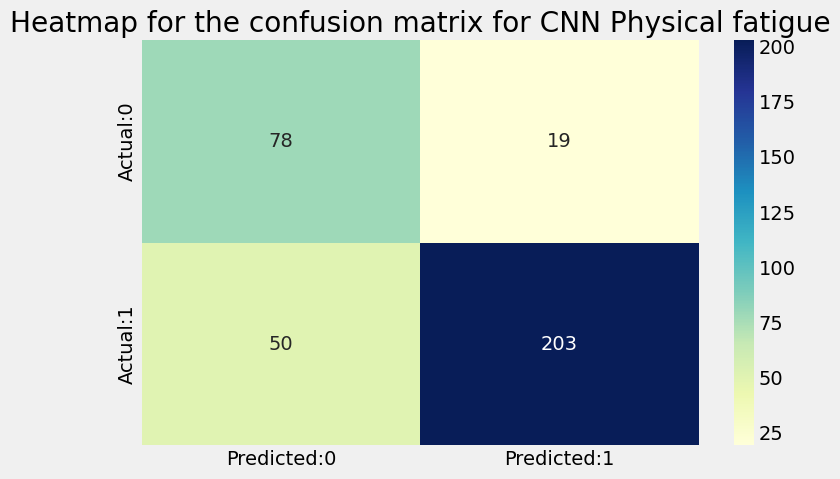

In [68]:
conf_mat1 = confusion_matrix(y1, y_pred)
conf_matrix=pd.DataFrame(data=conf_mat1,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for CNN Physical fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

In [73]:
import random as python_random

In [74]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

# Assuming you have X_train, y_train as your training data
# and X_test, y_test as your test data

# Define the CNN model
def build_model(hp):
    # Set the random seed
    np.random.seed(123)
    tf.random.set_seed(1234)

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(
            filters=hp.Int('hidden_neurons_conv1', min_value=32, max_value=128, step=32),
            kernel_size=hp.Int('kernel_size_conv1', min_value=3, max_value=5, step=2),
            activation='relu',
            input_shape=(num_features, 1)
        ),
        tf.keras.layers.Conv1D(
            filters=hp.Int('hidden_neurons_conv2', min_value=32, max_value=128, step=32),
            kernel_size=hp.Int('kernel_size_conv2', min_value=3, max_value=5, step=2),
            activation='relu'
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            units=hp.Int('hidden_neurons_fc1', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate_fc1', min_value=0.0, max_value=0.5)),
        tf.keras.layers.Dense(
            units=hp.Int('hidden_neurons_fc2', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate_fc2', min_value=0.0, max_value=0.5)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    # Use a variable learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Define the StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the performance metric functions
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize lists to store metrics
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Loop through the folds
for train_index, test_index in strat_k_fold.split(X, y2):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]
    
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
    )
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 callbacks=[early_stopping]) 
    # Get the optimal hyperparameters
    best_hps_cnn_m=tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
    model = tuner.hypermodel.build(best_hps_cnn_m)
    if model is not None:
        history = model.fit(X_train, y_train,
                            epochs=100,
                            validation_data=(X_test, y_test))

        val_acc_per_epoch = history.history['val_accuracy']
        best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
        print('Best epoch: %d' % (best_epoch,))
        hypermodel = tuner.hypermodel.build(best_hps_cnn_m)

        # Retrain the model
        history=hypermodel.fit(X_train, y_train,
                       epochs=best_epoch,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping],
                       verbose=0)
        
        y_pred_val = np.argmax(hypermodel.predict(X_test), axis=-1)

        # Calculate performance metrics
        accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_val)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
        
        
# Make predictions
y_pred = np.argmax(hypermodel.predict(X), axis=-1)
conf_mat2 = confusion_matrix(y2, y_pred)

        
        
# Calculate mean and standard deviation of metrics
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Print or use the metrics as needed
print(f' Mental Fatigue')
print(f'Mean Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')
print(f'Mean Precision: {mean_precision:.2f} ± {std_precision:.2f}')
print(f'Mean Recall: {mean_recall:.2f} ± {std_recall:.2f}')
print(f'Mean F1 Score: {mean_f1:.2f} ± {std_f1:.2f}')


Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 4s 104ms/step - loss: 0.6685 - accuracy: 0.6107 - val_loss: 0.6348 - val_accuracy: 0.6429
Epoch 2/100
9/9 [==============================] - 0s 23ms/step - loss: 0.5382 - accuracy: 0.7071 - val_loss: 0.6869 - val_accuracy: 0.5857
Epoch 3/100
9/9 [==============================] - 0s 21ms/step - loss: 0.5251 - accuracy: 0.7607 - val_loss: 0.8006 - val_accuracy: 0.6714
Epoch 4/100
9/9 [==============================] - 0s 34ms/step - loss: 0.4496 - accuracy: 0.8000 - val_loss: 0.6987 - val_accuracy: 0.6429
Epoch 5/100
9/9 [==============================] - 0s 25ms/step - loss: 0.4134 - accuracy: 0.8214 - val_loss: 0.7788 - val_accuracy: 0.6143
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.3889 - accuracy: 0.8286 - val_loss: 0.8540 - val_accuracy: 0.5857
Epoch 7/100
9/9 [==============================] - 0s 22ms/step - loss: 0.3677 - accuracy: 0.8286 - val_los

Epoch 59/100
9/9 [==============================] - 0s 29ms/step - loss: 0.0036 - accuracy: 0.9964 - val_loss: 3.4077 - val_accuracy: 0.6571
Epoch 60/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0041 - accuracy: 0.9964 - val_loss: 3.4147 - val_accuracy: 0.6571
Epoch 61/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.4712 - val_accuracy: 0.6571
Epoch 62/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0037 - accuracy: 0.9964 - val_loss: 3.5635 - val_accuracy: 0.6429
Epoch 63/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.5689 - val_accuracy: 0.6571
Epoch 64/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0035 - accuracy: 0.9964 - val_loss: 3.5315 - val_accuracy: 0.6571
Epoch 65/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 3.5520 - val_accuracy: 0.6571
Epoch 66/100


9/9 [==============================] - 0s 21ms/step - loss: 8.9834e-04 - accuracy: 1.0000 - val_loss: 4.3581 - val_accuracy: 0.6857
Epoch 75/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3962 - val_accuracy: 0.6857
Epoch 76/100
9/9 [==============================] - 0s 15ms/step - loss: 7.0867e-04 - accuracy: 1.0000 - val_loss: 4.4534 - val_accuracy: 0.6857
Epoch 77/100
9/9 [==============================] - 0s 16ms/step - loss: 5.4174e-04 - accuracy: 1.0000 - val_loss: 4.5001 - val_accuracy: 0.6857
Epoch 78/100
9/9 [==============================] - 0s 15ms/step - loss: 5.2405e-04 - accuracy: 1.0000 - val_loss: 4.5441 - val_accuracy: 0.6857
Epoch 79/100
9/9 [==============================] - 0s 16ms/step - loss: 4.6018e-04 - accuracy: 1.0000 - val_loss: 4.5812 - val_accuracy: 0.6857
Epoch 80/100
9/9 [==============================] - 0s 17ms/step - loss: 3.7724e-04 - accuracy: 1.0000 - val_loss: 4.6132 - val_accuracy: 0.6857
Ep

Epoch 31/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0847 - accuracy: 0.9750 - val_loss: 2.6629 - val_accuracy: 0.7571
Epoch 32/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1522 - accuracy: 0.9607 - val_loss: 2.7406 - val_accuracy: 0.7286
Epoch 33/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0997 - accuracy: 0.9750 - val_loss: 2.3373 - val_accuracy: 0.7714
Epoch 34/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0869 - accuracy: 0.9714 - val_loss: 2.6140 - val_accuracy: 0.7429
Epoch 35/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0871 - accuracy: 0.9750 - val_loss: 2.4315 - val_accuracy: 0.7429
Epoch 36/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1079 - accuracy: 0.9714 - val_loss: 2.4666 - val_accuracy: 0.7714
Epoch 37/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0947 - accuracy: 0.9714 - val_loss: 2.7327 - val_accuracy: 0.7429
Epoch 38/100


9/9 [==============================] - 0s 20ms/step - loss: 3.0663e-04 - accuracy: 1.0000 - val_loss: 2.3570 - val_accuracy: 0.7714
Epoch 47/100
9/9 [==============================] - 0s 20ms/step - loss: 2.8949e-04 - accuracy: 1.0000 - val_loss: 2.3706 - val_accuracy: 0.7714
Epoch 48/100
9/9 [==============================] - 0s 21ms/step - loss: 2.5740e-04 - accuracy: 1.0000 - val_loss: 2.3829 - val_accuracy: 0.7714
Epoch 49/100
9/9 [==============================] - 0s 18ms/step - loss: 2.3098e-04 - accuracy: 1.0000 - val_loss: 2.3951 - val_accuracy: 0.7714
Epoch 50/100
9/9 [==============================] - 0s 18ms/step - loss: 2.0995e-04 - accuracy: 1.0000 - val_loss: 2.4061 - val_accuracy: 0.7714
Epoch 51/100
9/9 [==============================] - 0s 19ms/step - loss: 1.9040e-04 - accuracy: 1.0000 - val_loss: 2.4185 - val_accuracy: 0.7714
Epoch 52/100
9/9 [==============================] - 0s 19ms/step - loss: 1.7659e-04 - accuracy: 1.0000 - val_loss: 2.4332 - val_accuracy: 0.771

3/3 [==============================] - 0s 5ms/step
Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 6s 120ms/step - loss: 0.6476 - accuracy: 0.6357 - val_loss: 0.5748 - val_accuracy: 0.6714
Epoch 2/100
9/9 [==============================] - 0s 26ms/step - loss: 0.5457 - accuracy: 0.6750 - val_loss: 0.5355 - val_accuracy: 0.7429
Epoch 3/100
9/9 [==============================] - 0s 33ms/step - loss: 0.4771 - accuracy: 0.7464 - val_loss: 0.5844 - val_accuracy: 0.6429
Epoch 4/100
9/9 [==============================] - 0s 18ms/step - loss: 0.4553 - accuracy: 0.7714 - val_loss: 0.5339 - val_accuracy: 0.6286
Epoch 5/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4014 - accuracy: 0.8036 - val_loss: 0.6271 - val_accuracy: 0.7286
Epoch 6/100
9/9 [==============================] - 0s 21ms/step - loss: 0.3701 - accuracy: 0.8357 - val_loss: 0.6083 - val_accuracy: 0.7143
Epoch 7/100
9/9 [==============================] - 0s 17

11/11 [==============================] - 0s 4ms/step


<Axes: title={'center': 'Heatmap for the confusion matrix for CNN Mental fatigue'}>

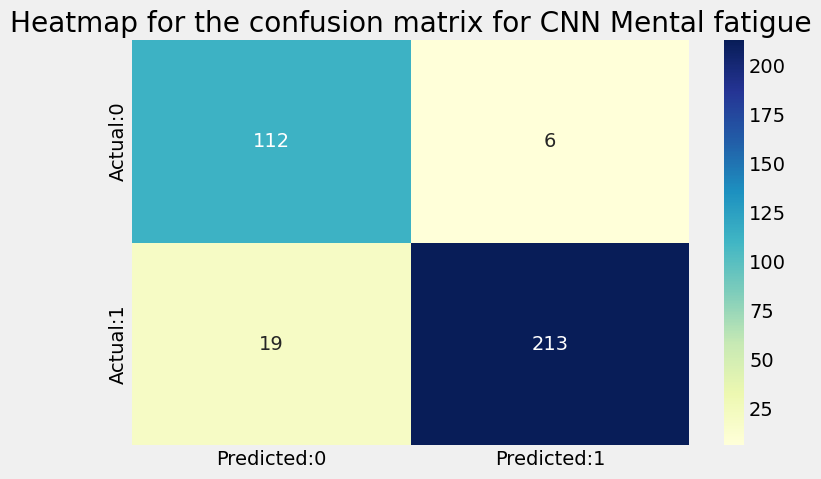

In [79]:
y_pred = np.argmax(hypermodel.predict(X), axis=-1)
conf_mat2 = confusion_matrix(y2, y_pred)
conf_matrix=pd.DataFrame(data=conf_mat2,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for CNN Mental fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

### Artificial Neural Networks (ANN) for deep learning

In [75]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

from tensorflow import keras


num_features = X.shape[1]
num_classes = len(set(y1))

# Assuming you have X_train, y_train as your training data
# and X_test, y_test as your test data

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=num_features))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the performance metric functions
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize lists to store metrics
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Loop through the folds
for train_index, test_index in strat_k_fold.split(X, y1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
    )
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 callbacks=[early_stopping]) 
    # Get the optimal hyperparameters
    best_hps_ann=tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
    model = tuner.hypermodel.build(best_hps_ann)
    if model is not None:
        history = model.fit(X_train, y_train,
                            epochs=100,
                            validation_data=(X_test, y_test))

        val_acc_per_epoch = history.history['val_accuracy']
        best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
        print('Best epoch: %d' % (best_epoch,))
        hypermodel = tuner.hypermodel.build(best_hps_ann)

        # Retrain the model
        history=hypermodel.fit(X_train, y_train,
                       epochs=best_epoch,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping],
                       verbose=0)
        
        y_pred_val = np.argmax(hypermodel.predict(X_test), axis=-1)

        # Calculate performance metrics
        accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_val)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
        
        
# Make predictions
y_pred = np.argmax(hypermodel.predict(X), axis=-1)
conf_mat_ann = confusion_matrix(y1, y_pred)

        
        
# Calculate mean and standard deviation of metrics
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Print or use the metrics as needed
print(f'ANN Physical Fatigue')
print(f'Mean Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')
print(f'Mean Precision: {mean_precision:.2f} ± {std_precision:.2f}')
print(f'Mean Recall: {mean_recall:.2f} ± {std_recall:.2f}')
print(f'Mean F1 Score: {mean_f1:.2f} ± {std_f1:.2f}')


Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 2s 60ms/step - loss: 0.6366 - accuracy: 0.6679 - val_loss: 0.4816 - val_accuracy: 0.7143
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 0.5225 - accuracy: 0.7071 - val_loss: 0.4913 - val_accuracy: 0.6714
Epoch 3/100
9/9 [==============================] - 0s 18ms/step - loss: 0.4801 - accuracy: 0.7464 - val_loss: 0.5208 - val_accuracy: 0.6857
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 0.4541 - accuracy: 0.7571 - val_loss: 0.5248 - val_accuracy: 0.6714
Epoch 5/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4217 - accuracy: 0.7571 - val_loss: 0.5191 - val_accuracy: 0.6714
Epoch 6/100
9/9 [==============================] - 0s 17ms/step - loss: 0.4217 - accuracy: 0.7821 - val_loss: 0.4934 - val_accuracy: 0.7286
Epoch 7/100
9/9 [==============================] - 0s 16ms/step - loss: 0.4249 - accuracy: 0.7964 - val_loss

Epoch 59/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1585 - accuracy: 0.9286 - val_loss: 0.7293 - val_accuracy: 0.7000
Epoch 60/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1782 - accuracy: 0.9393 - val_loss: 0.7648 - val_accuracy: 0.6857
Epoch 61/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1761 - accuracy: 0.9286 - val_loss: 0.7569 - val_accuracy: 0.7143
Epoch 62/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1798 - accuracy: 0.9321 - val_loss: 0.7327 - val_accuracy: 0.7000
Epoch 63/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1272 - accuracy: 0.9607 - val_loss: 0.7363 - val_accuracy: 0.6857
Epoch 64/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1332 - accuracy: 0.9464 - val_loss: 0.7416 - val_accuracy: 0.7000
Epoch 65/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1684 - accuracy: 0.9286 - val_loss: 0.7423 - val_accuracy: 0.7143
Epoch 66/100


9/9 [==============================] - 0s 15ms/step - loss: 0.1637 - accuracy: 0.9393 - val_loss: 0.9508 - val_accuracy: 0.8143
Epoch 75/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1633 - accuracy: 0.9429 - val_loss: 0.9780 - val_accuracy: 0.7857
Epoch 76/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1549 - accuracy: 0.9321 - val_loss: 0.9899 - val_accuracy: 0.7857
Epoch 77/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1641 - accuracy: 0.9536 - val_loss: 1.0209 - val_accuracy: 0.8143
Epoch 78/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1518 - accuracy: 0.9500 - val_loss: 1.0166 - val_accuracy: 0.7857
Epoch 79/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1491 - accuracy: 0.9393 - val_loss: 1.0350 - val_accuracy: 0.7857
Epoch 80/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1407 - accuracy: 0.9536 - val_loss: 1.0653 - val_accuracy: 0.7714
Epoch 81/100
9/9 [========

9/9 [==============================] - 0s 14ms/step - loss: 0.1441 - accuracy: 0.9500 - val_loss: 0.8248 - val_accuracy: 0.7714
Epoch 90/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1440 - accuracy: 0.9429 - val_loss: 0.8926 - val_accuracy: 0.7714
Epoch 91/100
9/9 [==============================] - 0s 18ms/step - loss: 0.1196 - accuracy: 0.9643 - val_loss: 0.9502 - val_accuracy: 0.7714
Epoch 92/100
9/9 [==============================] - 0s 18ms/step - loss: 0.1088 - accuracy: 0.9643 - val_loss: 0.9021 - val_accuracy: 0.7429
Epoch 93/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1437 - accuracy: 0.9357 - val_loss: 0.8976 - val_accuracy: 0.7571
Epoch 94/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1460 - accuracy: 0.9464 - val_loss: 0.8891 - val_accuracy: 0.7714
Epoch 95/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1122 - accuracy: 0.9679 - val_loss: 0.8818 - val_accuracy: 0.7857
Epoch 96/100
9/9 [========

9/9 [==============================] - 0s 29ms/step - loss: 0.5279 - accuracy: 0.7179 - val_loss: 0.5323 - val_accuracy: 0.7429
Epoch 4/100
9/9 [==============================] - 0s 42ms/step - loss: 0.5258 - accuracy: 0.7107 - val_loss: 0.5209 - val_accuracy: 0.7429
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 0.4873 - accuracy: 0.7321 - val_loss: 0.5082 - val_accuracy: 0.7571
Epoch 6/100
9/9 [==============================] - 0s 16ms/step - loss: 0.4503 - accuracy: 0.7500 - val_loss: 0.5038 - val_accuracy: 0.7571
Epoch 7/100
9/9 [==============================] - 0s 34ms/step - loss: 0.4437 - accuracy: 0.7679 - val_loss: 0.5035 - val_accuracy: 0.7429
Epoch 8/100
9/9 [==============================] - 1s 76ms/step - loss: 0.4566 - accuracy: 0.7679 - val_loss: 0.5106 - val_accuracy: 0.7714
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4074 - accuracy: 0.7714 - val_loss: 0.5123 - val_accuracy: 0.7857
Epoch 10/100
9/9 [==============

<Axes: title={'center': 'Heatmap for the confusion matrix for ANN PhysiCal fatigue'}>

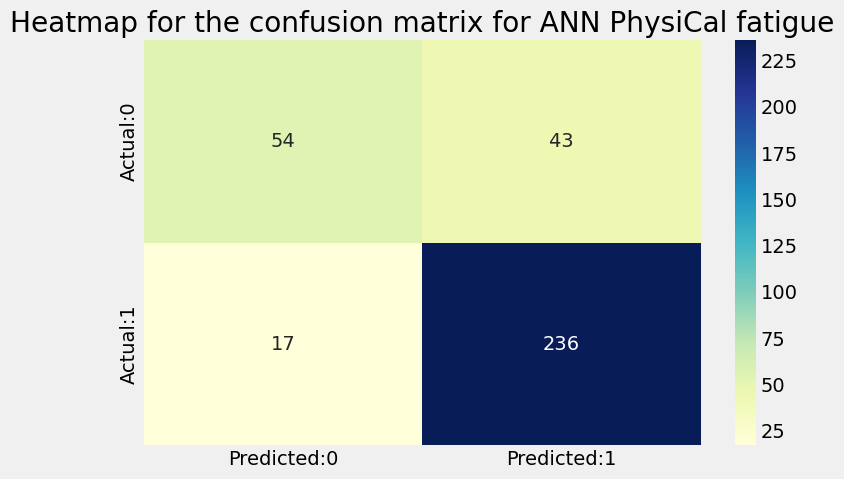

In [76]:

conf_matrix=pd.DataFrame(data=conf_mat_ann,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for ANN PhysiCal fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

In [84]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

from tensorflow import keras


num_features = X.shape[1]
num_classes = len(set(y1))

# Assuming you have X_train, y_train as your training data
# and X_test, y_test as your test data

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=num_features))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the performance metric functions
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize lists to store metrics
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Loop through the folds
for train_index, test_index in strat_k_fold.split(X, y1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
    )
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 callbacks=[early_stopping]) 
    # Get the optimal hyperparameters
    best_hps_ann1=tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
    model = tuner.hypermodel.build(best_hps_ann)
    if model is not None:
        history = model.fit(X_train, y_train,
                            epochs=100,
                            validation_data=(X_test, y_test))

        val_acc_per_epoch = history.history['val_accuracy']
        best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
        print('Best epoch: %d' % (best_epoch,))
        hypermodel = tuner.hypermodel.build(best_hps_ann1)

        # Retrain the model
        history=hypermodel.fit(X_train, y_train,
                       epochs=best_epoch,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping],
                       verbose=0)
        
        y_pred_val = np.argmax(hypermodel.predict(X_test), axis=-1)

        # Calculate performance metrics
        accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_val)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
        
        
# Make predictions
y_pred = np.argmax(hypermodel.predict(X), axis=-1)
conf_mat_ann1 = confusion_matrix(y1, y_pred)

        
        
# Calculate mean and standard deviation of metrics
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Print or use the metrics as needed
print(f'ANN Mental Fatigue')
print(f'Mean Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')
print(f'Mean Precision: {mean_precision:.2f} ± {std_precision:.2f}')
print(f'Mean Recall: {mean_recall:.2f} ± {std_recall:.2f}')
print(f'Mean F1 Score: {mean_f1:.2f} ± {std_f1:.2f}')


Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 2s 71ms/step - loss: 0.6179 - accuracy: 0.6464 - val_loss: 0.5930 - val_accuracy: 0.7286
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 0.5426 - accuracy: 0.7571 - val_loss: 0.5504 - val_accuracy: 0.7571
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4991 - accuracy: 0.7536 - val_loss: 0.5269 - val_accuracy: 0.7429
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4841 - accuracy: 0.7464 - val_loss: 0.5176 - val_accuracy: 0.7286
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 0.4700 - accuracy: 0.7607 - val_loss: 0.5113 - val_accuracy: 0.7429
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4597 - accuracy: 0.7643 - val_loss: 0.5057 - val_accuracy: 0.7429
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4706 - accuracy: 0.7571 - val_loss

Epoch 59/100
9/9 [==============================] - 0s 11ms/step - loss: 0.2175 - accuracy: 0.9214 - val_loss: 0.6609 - val_accuracy: 0.7286
Epoch 60/100
9/9 [==============================] - 0s 13ms/step - loss: 0.2394 - accuracy: 0.8857 - val_loss: 0.6722 - val_accuracy: 0.7286
Epoch 61/100
9/9 [==============================] - 0s 12ms/step - loss: 0.2146 - accuracy: 0.9036 - val_loss: 0.6703 - val_accuracy: 0.7286
Epoch 62/100
9/9 [==============================] - 0s 14ms/step - loss: 0.2512 - accuracy: 0.9000 - val_loss: 0.6569 - val_accuracy: 0.7286
Epoch 63/100
9/9 [==============================] - 0s 12ms/step - loss: 0.2087 - accuracy: 0.9143 - val_loss: 0.6712 - val_accuracy: 0.7571
Epoch 64/100
9/9 [==============================] - 0s 13ms/step - loss: 0.2163 - accuracy: 0.9179 - val_loss: 0.6727 - val_accuracy: 0.7429
Epoch 65/100
9/9 [==============================] - 0s 12ms/step - loss: 0.2124 - accuracy: 0.9214 - val_loss: 0.6821 - val_accuracy: 0.7286
Epoch 66/100


9/9 [==============================] - 0s 13ms/step - loss: 0.2086 - accuracy: 0.9214 - val_loss: 0.9224 - val_accuracy: 0.8286
Epoch 75/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1678 - accuracy: 0.9286 - val_loss: 0.9265 - val_accuracy: 0.8286
Epoch 76/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1788 - accuracy: 0.9357 - val_loss: 0.9402 - val_accuracy: 0.8429
Epoch 77/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1621 - accuracy: 0.9393 - val_loss: 0.9321 - val_accuracy: 0.8429
Epoch 78/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1783 - accuracy: 0.9179 - val_loss: 0.9355 - val_accuracy: 0.8429
Epoch 79/100
9/9 [==============================] - 0s 11ms/step - loss: 0.1671 - accuracy: 0.9464 - val_loss: 0.9311 - val_accuracy: 0.8286
Epoch 80/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1522 - accuracy: 0.9393 - val_loss: 0.9213 - val_accuracy: 0.8571
Epoch 81/100
9/9 [========

9/9 [==============================] - 0s 13ms/step - loss: 0.1565 - accuracy: 0.9393 - val_loss: 0.8962 - val_accuracy: 0.6571
Epoch 90/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1360 - accuracy: 0.9464 - val_loss: 0.9031 - val_accuracy: 0.6571
Epoch 91/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1537 - accuracy: 0.9321 - val_loss: 0.8844 - val_accuracy: 0.7286
Epoch 92/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1584 - accuracy: 0.9429 - val_loss: 0.9230 - val_accuracy: 0.7143
Epoch 93/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1499 - accuracy: 0.9429 - val_loss: 0.9347 - val_accuracy: 0.7000
Epoch 94/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1798 - accuracy: 0.9214 - val_loss: 0.9291 - val_accuracy: 0.7143
Epoch 95/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1649 - accuracy: 0.9214 - val_loss: 0.9232 - val_accuracy: 0.7000
Epoch 96/100
9/9 [========

9/9 [==============================] - 0s 14ms/step - loss: 0.5245 - accuracy: 0.7179 - val_loss: 0.5734 - val_accuracy: 0.6571
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.5095 - accuracy: 0.7321 - val_loss: 0.5642 - val_accuracy: 0.7286
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 0.4873 - accuracy: 0.7357 - val_loss: 0.5621 - val_accuracy: 0.7143
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.4743 - accuracy: 0.7536 - val_loss: 0.5493 - val_accuracy: 0.7286
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4596 - accuracy: 0.7429 - val_loss: 0.5209 - val_accuracy: 0.7143
Epoch 8/100
9/9 [==============================] - 0s 15ms/step - loss: 0.4416 - accuracy: 0.7571 - val_loss: 0.5204 - val_accuracy: 0.7286
Epoch 9/100
9/9 [==============================] - 0s 13ms/step - loss: 0.4012 - accuracy: 0.7893 - val_loss: 0.5290 - val_accuracy: 0.7571
Epoch 10/100
9/9 [==============

<Axes: title={'center': 'Heatmap for the confusion matrix for ANN Mental Fatigue'}>

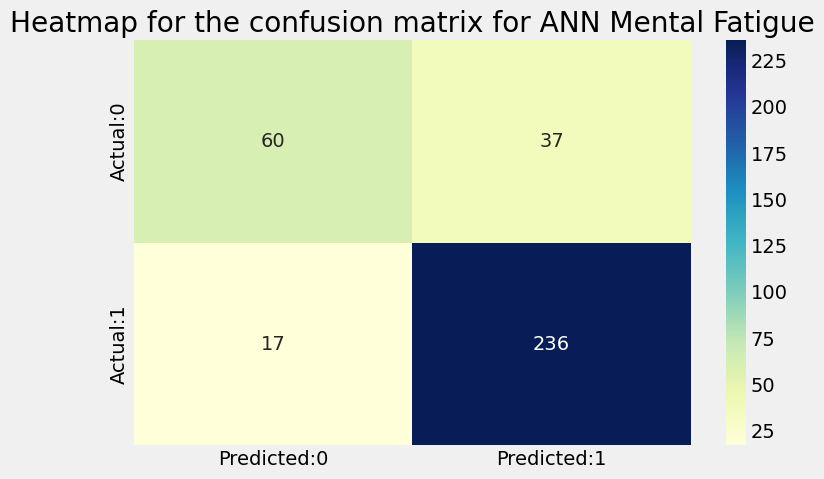

In [85]:

conf_matrix=pd.DataFrame(data=conf_mat_ann1 ,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for ANN Mental Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")


### Recurrent Neural Networks (RNN) for deep learning

In [86]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

from tensorflow import keras


num_features = X.shape[1]
num_classes = len(set(y1))

# Assuming you have X_train, y_train as your training data
# and X_test, y_test as your test data

# Define the model-building function
def build_model(hp):
    model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(hp.Int('hidden_neurons_rnn', min_value=32, max_value=128, step=32), activation='relu', input_shape=(num_features, 1)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    # Use a variable learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the performance metric functions
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize lists to store metrics
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Loop through the folds
for train_index, test_index in strat_k_fold.split(X, y1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
    )
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 callbacks=[early_stopping]) 
    # Get the optimal hyperparameters
    best_hps_rnn=tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
    model = tuner.hypermodel.build(best_hps_rnn)
    if model is not None:
        history = model.fit(X_train, y_train,
                            epochs=100,
                            validation_data=(X_test, y_test))

        val_acc_per_epoch = history.history['val_accuracy']
        best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
        print('Best epoch: %d' % (best_epoch,))
        hypermodel = tuner.hypermodel.build(best_hps_rnn)

        # Retrain the model
        history=hypermodel.fit(X_train, y_train,
                       epochs=best_epoch,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping],
                       verbose=0)
        
        y_pred_val = np.argmax(hypermodel.predict(X_test), axis=-1)

        # Calculate performance metrics
        accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_val)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
        
        
# Make predictions
y_pred = np.argmax(hypermodel.predict(X), axis=-1)
conf_mat_rnn = confusion_matrix(y1, y_pred)

        
        
# Calculate mean and standard deviation of metrics
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Print or use the metrics as needed
print(f'RNN Physical Fatigue')
print(f'Mean Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')
print(f'Mean Precision: {mean_precision:.2f} ± {std_precision:.2f}')
print(f'Mean Recall: {mean_recall:.2f} ± {std_recall:.2f}')
print(f'Mean F1 Score: {mean_f1:.2f} ± {std_f1:.2f}')


Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 3s 97ms/step - loss: 0.6196 - accuracy: 0.6893 - val_loss: 0.5618 - val_accuracy: 0.7286
Epoch 2/100
9/9 [==============================] - 0s 23ms/step - loss: 0.5818 - accuracy: 0.7214 - val_loss: 0.5401 - val_accuracy: 0.7286
Epoch 3/100
9/9 [==============================] - 0s 22ms/step - loss: 0.5755 - accuracy: 0.7214 - val_loss: 0.5362 - val_accuracy: 0.7286
Epoch 4/100
9/9 [==============================] - 0s 23ms/step - loss: 0.5563 - accuracy: 0.7214 - val_loss: 0.4860 - val_accuracy: 0.7286
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.5536 - accuracy: 0.7179 - val_loss: 0.4807 - val_accuracy: 0.7286
Epoch 6/100
9/9 [==============================] - 0s 21ms/step - loss: 0.5232 - accuracy: 0.7214 - val_loss: 0.4962 - val_accuracy: 0.7000
Epoch 7/100
9/9 [==============================] - 0s 27ms/step - loss: 0.5084 - accuracy: 0.7250 - val_loss

Epoch 59/100
9/9 [==============================] - 0s 34ms/step - loss: 0.3275 - accuracy: 0.8321 - val_loss: 0.8507 - val_accuracy: 0.7000
Epoch 60/100
9/9 [==============================] - 0s 30ms/step - loss: 0.3220 - accuracy: 0.8607 - val_loss: 0.6189 - val_accuracy: 0.6857
Epoch 61/100
9/9 [==============================] - 0s 26ms/step - loss: 0.3086 - accuracy: 0.8607 - val_loss: 0.7389 - val_accuracy: 0.7000
Epoch 62/100
9/9 [==============================] - 0s 42ms/step - loss: 0.2416 - accuracy: 0.8964 - val_loss: 0.9012 - val_accuracy: 0.7714
Epoch 63/100
9/9 [==============================] - 0s 26ms/step - loss: 0.2276 - accuracy: 0.8929 - val_loss: 0.9024 - val_accuracy: 0.7571
Epoch 64/100
9/9 [==============================] - 0s 22ms/step - loss: 0.2450 - accuracy: 0.8821 - val_loss: 0.9507 - val_accuracy: 0.7286
Epoch 65/100
9/9 [==============================] - 0s 22ms/step - loss: 0.2472 - accuracy: 0.8607 - val_loss: 1.0365 - val_accuracy: 0.7000
Epoch 66/100


9/9 [==============================] - 0s 17ms/step - loss: 0.0786 - accuracy: 0.9786 - val_loss: 1.3015 - val_accuracy: 0.8143
Epoch 75/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0388 - accuracy: 0.9964 - val_loss: 1.3851 - val_accuracy: 0.7429
Epoch 76/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0238 - accuracy: 0.9964 - val_loss: 1.5112 - val_accuracy: 0.7143
Epoch 77/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0366 - accuracy: 0.9964 - val_loss: 1.4982 - val_accuracy: 0.7286
Epoch 78/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 1.5816 - val_accuracy: 0.7857
Epoch 79/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0346 - accuracy: 0.9821 - val_loss: 1.8010 - val_accuracy: 0.7286
Epoch 80/100
9/9 [==============================] - 0s 18ms/step - loss: 0.2409 - accuracy: 0.9250 - val_loss: 1.1853 - val_accuracy: 0.7000
Epoch 81/100
9/9 [========

9/9 [==============================] - 0s 23ms/step - loss: 0.3666 - accuracy: 0.8250 - val_loss: 0.6649 - val_accuracy: 0.7143
Epoch 90/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4061 - accuracy: 0.8286 - val_loss: 0.6281 - val_accuracy: 0.6714
Epoch 91/100
9/9 [==============================] - 0s 21ms/step - loss: 0.4703 - accuracy: 0.7750 - val_loss: 0.5828 - val_accuracy: 0.6857
Epoch 92/100
9/9 [==============================] - 0s 21ms/step - loss: 0.4038 - accuracy: 0.8357 - val_loss: 0.5414 - val_accuracy: 0.7000
Epoch 93/100
9/9 [==============================] - 0s 21ms/step - loss: 0.4176 - accuracy: 0.8214 - val_loss: 0.5582 - val_accuracy: 0.6714
Epoch 94/100
9/9 [==============================] - 0s 26ms/step - loss: 0.4008 - accuracy: 0.7893 - val_loss: 0.5717 - val_accuracy: 0.6286
Epoch 95/100
9/9 [==============================] - 0s 21ms/step - loss: 0.4203 - accuracy: 0.7857 - val_loss: 0.6253 - val_accuracy: 0.6000
Epoch 96/100
9/9 [========

9/9 [==============================] - 0s 19ms/step - loss: 0.5795 - accuracy: 0.7250 - val_loss: 0.5801 - val_accuracy: 0.7143
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 0.5706 - accuracy: 0.7250 - val_loss: 0.5528 - val_accuracy: 0.7143
Epoch 5/100
9/9 [==============================] - 0s 21ms/step - loss: 0.5440 - accuracy: 0.7250 - val_loss: 0.5521 - val_accuracy: 0.7143
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.5285 - accuracy: 0.7250 - val_loss: 0.5549 - val_accuracy: 0.7143
Epoch 7/100
9/9 [==============================] - 0s 18ms/step - loss: 0.5220 - accuracy: 0.7250 - val_loss: 0.5455 - val_accuracy: 0.7143
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.5008 - accuracy: 0.7250 - val_loss: 0.5491 - val_accuracy: 0.7143
Epoch 9/100
9/9 [==============================] - 0s 18ms/step - loss: 0.5083 - accuracy: 0.7250 - val_loss: 0.5408 - val_accuracy: 0.7143
Epoch 10/100
9/9 [==============

<Axes: title={'center': 'Heatmap for the confusion matrix for RNN Physical Fatigue'}>

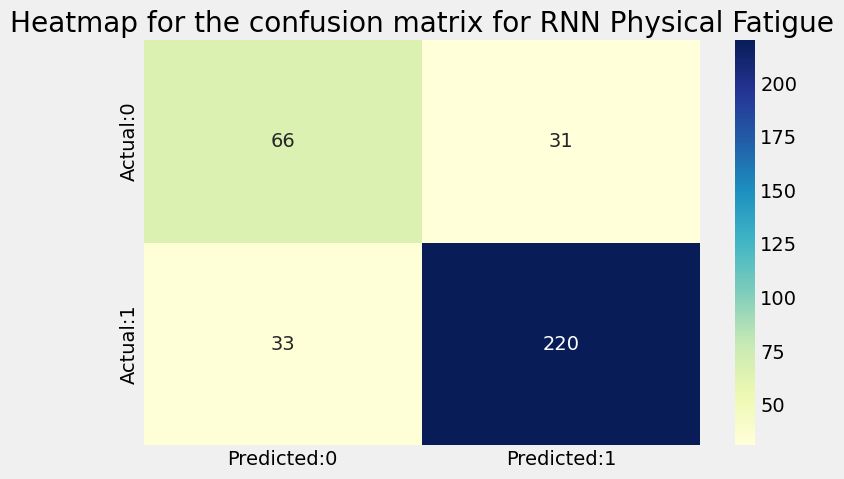

In [87]:

conf_matrix=pd.DataFrame(data=conf_mat_rnn,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for RNN Physical Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")


In [88]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

from tensorflow import keras


num_features = X.shape[1]
num_classes = len(set(y1))

# Assuming you have X_train, y_train as your training data
# and X_test, y_test as your test data

# Define the model-building function
def build_model(hp):
    model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(hp.Int('hidden_neurons_rnn', min_value=32, max_value=128, step=32), activation='relu', input_shape=(num_features, 1)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    # Use a variable learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the performance metric functions
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize lists to store metrics
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Loop through the folds
for train_index, test_index in strat_k_fold.split(X, y2):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
    )
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 callbacks=[early_stopping]) 
    # Get the optimal hyperparameters
    best_hps_rnn1=tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
    model = tuner.hypermodel.build(best_hps_rnn1)
    if model is not None:
        history = model.fit(X_train, y_train,
                            epochs=100,
                            validation_data=(X_test, y_test))

        val_acc_per_epoch = history.history['val_accuracy']
        best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
        print('Best epoch: %d' % (best_epoch,))
        hypermodel = tuner.hypermodel.build(best_hps_rnn1)

        # Retrain the model
        history=hypermodel.fit(X_train, y_train,
                       epochs=best_epoch,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping],
                       verbose=0)
        
        y_pred_val = np.argmax(hypermodel.predict(X_test), axis=-1)

        # Calculate performance metrics
        accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_val)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
        
        
# Make predictions
y_pred = np.argmax(hypermodel.predict(X), axis=-1)
conf_mat_rnn1 = confusion_matrix(y2, y_pred)

        
        
# Calculate mean and standard deviation of metrics
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Print or use the metrics as needed
print(f'RNN Mental Fatigue')
print(f'Mean Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')
print(f'Mean Precision: {mean_precision:.2f} ± {std_precision:.2f}')
print(f'Mean Recall: {mean_recall:.2f} ± {std_recall:.2f}')
print(f'Mean F1 Score: {mean_f1:.2f} ± {std_f1:.2f}')


Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 3s 71ms/step - loss: 0.5960 - accuracy: 0.7143 - val_loss: 0.5743 - val_accuracy: 0.7143
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 0.5581 - accuracy: 0.7250 - val_loss: 0.5865 - val_accuracy: 0.7143
Epoch 3/100
9/9 [==============================] - 0s 21ms/step - loss: 0.5164 - accuracy: 0.7214 - val_loss: 0.6374 - val_accuracy: 0.6143
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.4820 - accuracy: 0.7321 - val_loss: 0.6656 - val_accuracy: 0.5429
Epoch 5/100
9/9 [==============================] - 0s 18ms/step - loss: 0.4558 - accuracy: 0.7607 - val_loss: 0.7024 - val_accuracy: 0.5571
Epoch 6/100
9/9 [==============================] - 0s 16ms/step - loss: 0.4491 - accuracy: 0.7286 - val_loss: 0.5725 - val_accuracy: 0.5857
Epoch 7/100
9/9 [==============================] - 0s 18ms/step - loss: 0.4377 - accuracy: 0.7357 - val_loss

Epoch 59/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1700 - accuracy: 0.9357 - val_loss: 0.9975 - val_accuracy: 0.7000
Epoch 60/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3271 - accuracy: 0.8714 - val_loss: 1.0757 - val_accuracy: 0.7429
Epoch 61/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3339 - accuracy: 0.8357 - val_loss: 1.4169 - val_accuracy: 0.6571
Epoch 62/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2976 - accuracy: 0.8821 - val_loss: 0.8587 - val_accuracy: 0.6143
Epoch 63/100
9/9 [==============================] - 0s 17ms/step - loss: 0.3001 - accuracy: 0.8714 - val_loss: 0.6139 - val_accuracy: 0.7286
Epoch 64/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2649 - accuracy: 0.8857 - val_loss: 0.8085 - val_accuracy: 0.6571
Epoch 65/100
9/9 [==============================] - 0s 21ms/step - loss: 0.2120 - accuracy: 0.9179 - val_loss: 0.8197 - val_accuracy: 0.7429
Epoch 66/100


9/9 [==============================] - 0s 29ms/step - loss: 0.4704 - accuracy: 0.7786 - val_loss: 0.4537 - val_accuracy: 0.7571
Epoch 75/100
9/9 [==============================] - 0s 24ms/step - loss: 0.4585 - accuracy: 0.7714 - val_loss: 0.5343 - val_accuracy: 0.6429
Epoch 76/100
9/9 [==============================] - 0s 23ms/step - loss: 0.4128 - accuracy: 0.8036 - val_loss: 0.5125 - val_accuracy: 0.7000
Epoch 77/100
9/9 [==============================] - 0s 26ms/step - loss: 0.3870 - accuracy: 0.8357 - val_loss: 0.6459 - val_accuracy: 0.6857
Epoch 78/100
9/9 [==============================] - 0s 23ms/step - loss: 0.3843 - accuracy: 0.8250 - val_loss: 0.5056 - val_accuracy: 0.7857
Epoch 79/100
9/9 [==============================] - 0s 24ms/step - loss: 0.4626 - accuracy: 0.8071 - val_loss: 0.4803 - val_accuracy: 0.7714
Epoch 80/100
9/9 [==============================] - 0s 26ms/step - loss: 0.5061 - accuracy: 0.7679 - val_loss: 0.4419 - val_accuracy: 0.7857
Epoch 81/100
9/9 [========

Epoch 89/100
9/9 [==============================] - 0s 17ms/step - loss: 5.3756e-04 - accuracy: 1.0000 - val_loss: 2.4741 - val_accuracy: 0.6857
Epoch 90/100
9/9 [==============================] - 0s 17ms/step - loss: 5.1557e-04 - accuracy: 1.0000 - val_loss: 2.4867 - val_accuracy: 0.6857
Epoch 91/100
9/9 [==============================] - 0s 18ms/step - loss: 4.9708e-04 - accuracy: 1.0000 - val_loss: 2.4953 - val_accuracy: 0.6857
Epoch 92/100
9/9 [==============================] - 0s 16ms/step - loss: 4.7994e-04 - accuracy: 1.0000 - val_loss: 2.5017 - val_accuracy: 0.6857
Epoch 93/100
9/9 [==============================] - 0s 17ms/step - loss: 4.6437e-04 - accuracy: 1.0000 - val_loss: 2.5094 - val_accuracy: 0.6857
Epoch 94/100
9/9 [==============================] - 0s 17ms/step - loss: 4.4805e-04 - accuracy: 1.0000 - val_loss: 2.5203 - val_accuracy: 0.6857
Epoch 95/100
9/9 [==============================] - 0s 17ms/step - loss: 4.3295e-04 - accuracy: 1.0000 - val_loss: 2.5259 - val_ac

Epoch 46/100
9/9 [==============================] - 0s 22ms/step - loss: 0.4920 - accuracy: 0.7036 - val_loss: 0.4884 - val_accuracy: 0.7857
Epoch 47/100
9/9 [==============================] - 0s 21ms/step - loss: 0.4952 - accuracy: 0.7214 - val_loss: 0.4744 - val_accuracy: 0.7286
Epoch 48/100
9/9 [==============================] - 0s 21ms/step - loss: 0.4695 - accuracy: 0.7571 - val_loss: 0.4864 - val_accuracy: 0.7714
Epoch 49/100
9/9 [==============================] - 0s 22ms/step - loss: 0.4162 - accuracy: 0.7750 - val_loss: 0.4882 - val_accuracy: 0.7286
Epoch 50/100
9/9 [==============================] - 0s 20ms/step - loss: 0.3658 - accuracy: 0.8393 - val_loss: 0.5405 - val_accuracy: 0.7571
Epoch 51/100
9/9 [==============================] - 0s 22ms/step - loss: 0.3392 - accuracy: 0.8536 - val_loss: 0.4779 - val_accuracy: 0.8000
Epoch 52/100
9/9 [==============================] - 0s 21ms/step - loss: 0.3018 - accuracy: 0.8786 - val_loss: 0.6075 - val_accuracy: 0.7286
Epoch 53/100


9/9 [==============================] - 0s 22ms/step - loss: 0.3400 - accuracy: 0.8536 - val_loss: 0.9310 - val_accuracy: 0.6143
Epoch 62/100
9/9 [==============================] - 0s 20ms/step - loss: 0.3450 - accuracy: 0.8393 - val_loss: 1.0636 - val_accuracy: 0.6286
Epoch 63/100
9/9 [==============================] - 0s 26ms/step - loss: 0.3454 - accuracy: 0.8286 - val_loss: 1.1916 - val_accuracy: 0.6429
Epoch 64/100
9/9 [==============================] - 0s 22ms/step - loss: 0.2483 - accuracy: 0.9071 - val_loss: 1.1011 - val_accuracy: 0.6429
Epoch 65/100
9/9 [==============================] - 0s 21ms/step - loss: 0.2156 - accuracy: 0.9143 - val_loss: 1.3351 - val_accuracy: 0.6429
Epoch 66/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1814 - accuracy: 0.9321 - val_loss: 1.2122 - val_accuracy: 0.7286
Epoch 67/100
9/9 [==============================] - 0s 21ms/step - loss: 0.2109 - accuracy: 0.8929 - val_loss: 1.1469 - val_accuracy: 0.6857
Epoch 68/100
9/9 [========

<Axes: title={'center': 'Heatmap for the confusion matrix for RNN Mental Fatigue'}>

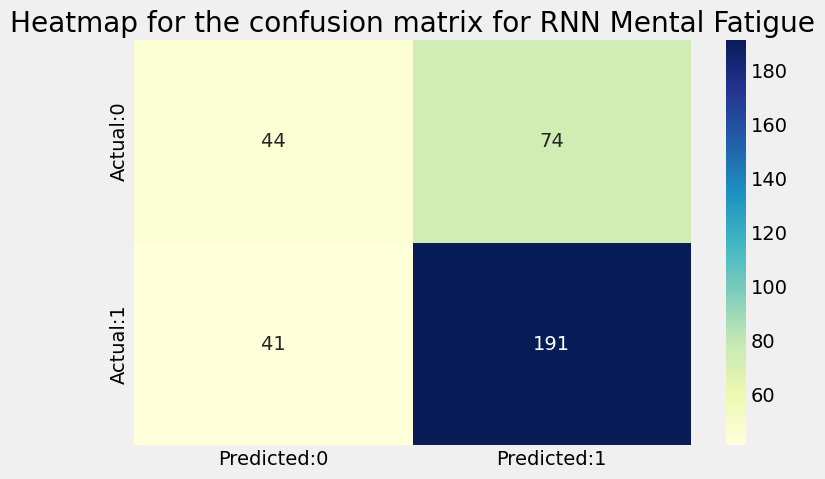

In [89]:

conf_matrix=pd.DataFrame(data=conf_mat_rnn1,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for RNN Mental Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

### Combination of  Algorithim  on both  stacking and voting(Soft and Hard) 


In [77]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.ensemble import StackingClassifier

In [91]:
best_rf_,best_rf

(RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                        random_state=42),
 RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=10,
                        random_state=42))

In [322]:
#Physical Fatigue

In [78]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten


In [79]:

def build_best_model():
    model = Sequential([
        Conv1D(
            filters=best_hps_cnn.get('hidden_neurons_conv1'), 
            kernel_size=best_hps_cnn.get('kernel_size_conv1'), 
            activation='relu', 
            input_shape=(num_features, 1)
        ),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_hps_cnn.get('learning_rate')), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model
model_nn = KerasClassifier(build_fn=build_best_model, epochs=100, batch_size=32, verbose=0)
model_rf= RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)

# Create a stacking ensemble
model = StackingClassifier(estimators=[('rf', model_rf), ('nn', model_nn)])


# Evaluate the Random Forest model for physical fatigue
results_dict = {"Physical Fatigue": {}, "Mental Fatigue": {}}


# Define dictionary of scoring methods
scoring = {'accuracy': make_scorer(accuracy_score), 
            'precision': make_scorer(precision_score, average='weighted'),
            'recall': make_scorer(recall_score, average='weighted'), 
            'f1_score': make_scorer(f1_score, average='weighted')}



for metric in scoring.keys():
    scores = cross_val_score(model,X, y2 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Mental Fatigue"][f"Mean {metric}"] = f"{mean_score:.2f}"
    results_dict["Mental Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"
    
    
y2_pred = cross_val_predict(model, X, y2, cv=strat_k_fold)
conf_mat_Smf = confusion_matrix(y2, y2_pred)

    
    
for metric in scoring.keys():
    scores = cross_val_score(model,X, y1 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Physical Fatigue"][f"Mean {metric}"] = f"{mean_score:.2f}"
    results_dict["Physical Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"
    
    
y1_pred = cross_val_predict(model, X, y1, cv=strat_k_fold)
conf_mat_Spf = confusion_matrix(y1, y1_pred)




In [81]:
pd.DataFrame(data=results_dict)

Physical Fatigue Mental Fatigue
Mean accuracy              0.78           0.75
accuracy Std               0.02           0.05
Mean precision             0.79           0.79
precision Std              0.03           0.05
Mean recall                0.76           0.77
recall Std                 0.02           0.03
Mean f1_score              0.73           0.76
f1_score Std               0.04           0.03

<Axes: title={'center': 'Heatmap for the confusion matrix for stacking Physical Fatigue'}>

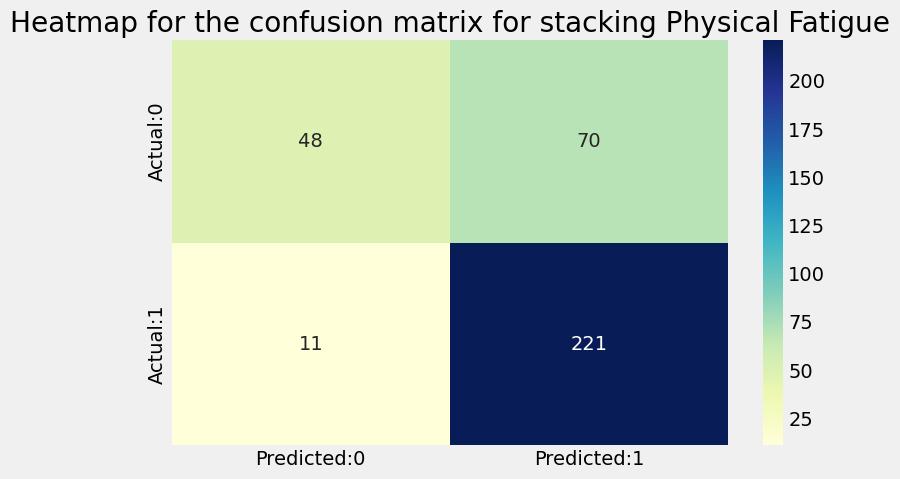

In [97]:

conf_matrix=pd.DataFrame(data=conf_mat_Spf,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for stacking Physical Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

<Axes: title={'center': 'Heatmap for the confusion matrix for stacking Mental Fatigue'}>

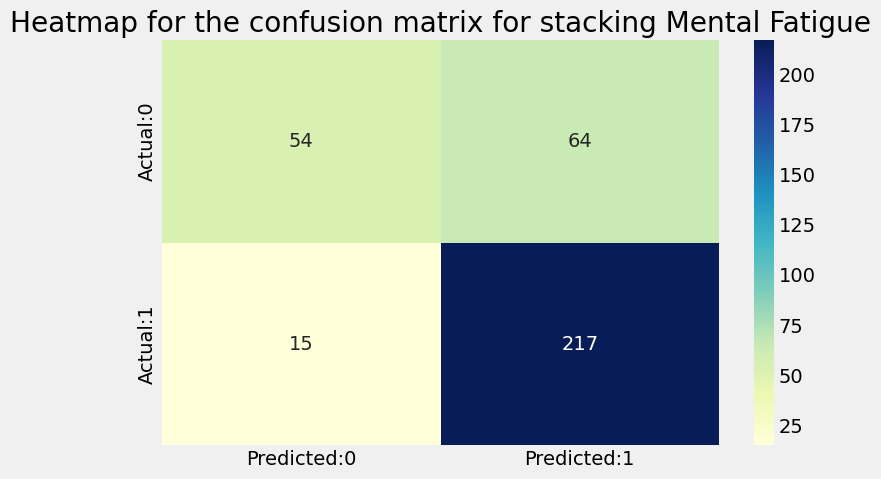

In [80]:

conf_matrix=pd.DataFrame(data=conf_mat_Smf,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for stacking Mental Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

#### Voting

In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
#create Voting ensemble
voting_clf = VotingClassifier(
    estimators=[('rf', model_rf), ('rnn', model_nn), ],voting='hard')


# Evaluate the Random Forest model for physical fatigue
results_dict = {"Physical Fatigue": {}, "Mental Fatigue": {}}


# Define dictionary of scoring methods
scoring = {'accuracy': make_scorer(accuracy_score), 
            'precision': make_scorer(precision_score, average='weighted'),
            'recall': make_scorer(recall_score, average='weighted'), 
            'f1_score': make_scorer(f1_score, average='weighted')}



for metric in scoring.keys():
    scores = cross_val_score(model,X, y2 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Mental Fatigue"][f"Mean {metric}"] = f"{mean_score:.2f}"
    results_dict["Mental Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"
    
    
y2_pred = cross_val_predict(model, X, y2, cv=strat_k_fold)
conf_mat_Vmf = confusion_matrix(y2, y2_pred)

    
    
for metric in scoring.keys():
    scores = cross_val_score(model,X, y1 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Physical Fatigue"][f"Mean {metric}"] = f"{mean_score:.2f}"
    results_dict["Physical Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"
    
    
y1_pred = cross_val_predict(model, X, y1, cv=strat_k_fold)
conf_mat_Vpf = confusion_matrix(y1, y1_pred)





In [105]:
pd.DataFrame(data=results_dict)

Physical Fatigue Mental Fatigue
Mean accuracy              0.78           0.78
accuracy Std               0.02           0.03
Mean precision             0.78           0.78
precision Std              0.04           0.07
Mean recall                0.76           0.78
recall Std                 0.02           0.02
Mean f1_score              0.69           0.72
f1_score Std               0.04           0.04

<Axes: title={'center': 'Heatmap for the confusion matrix for Hard Voting Physical Fatigue'}>

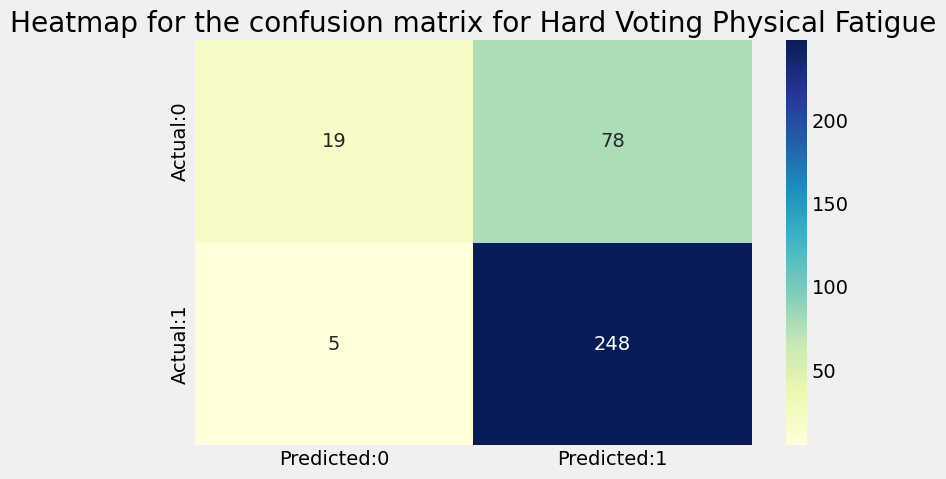

In [107]:
y1_pred = cross_val_predict(model, X, y1, cv=strat_k_fold)
conf_mat_Vpf = confusion_matrix(y1, y1_pred)

conf_matrix=pd.DataFrame(data=conf_mat_Vpf ,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for Hard Voting Physical Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

<Axes: title={'center': 'Heatmap for the confusion matrix for Hard Voting Mental Fatigue'}>

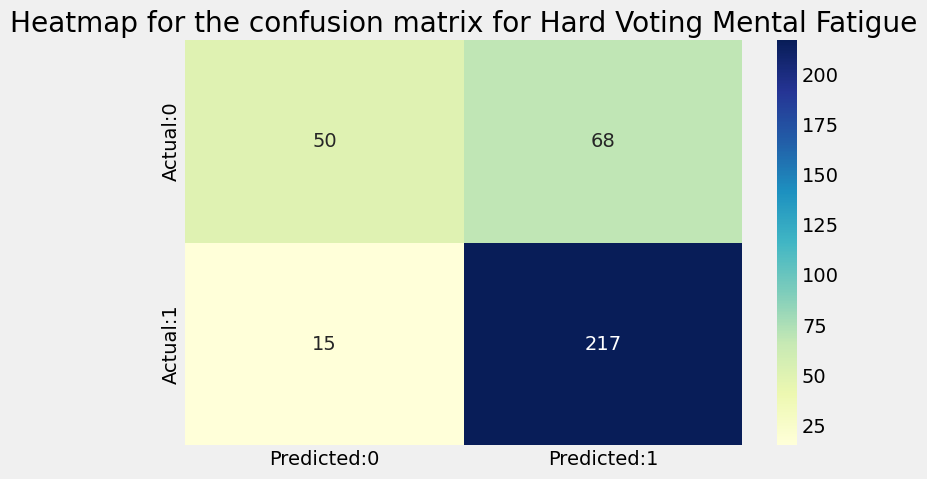

In [102]:

conf_matrix=pd.DataFrame(data=conf_mat_Vmf ,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for Hard Voting Mental Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

In [108]:
#create Voting ensemble
voting_clf = VotingClassifier(
    estimators=[('rf', model_rf), ('rnn', model_nn), ],voting='soft')


# Evaluate the Random Forest model for physical fatigue
results_dict = {"Physical Fatigue": {}, "Mental Fatigue": {}}


# Define dictionary of scoring methods
scoring = {'accuracy': make_scorer(accuracy_score), 
            'precision': make_scorer(precision_score, average='weighted'),
            'recall': make_scorer(recall_score, average='weighted'), 
            'f1_score': make_scorer(f1_score, average='weighted')}



for metric in scoring.keys():
    scores = cross_val_score(model,X, y2 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Mental Fatigue"][f"Mean {metric}"] = f"{mean_score:.2f}"
    results_dict["Mental Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"
    
    
y2_pred = cross_val_predict(model, X, y2, cv=strat_k_fold)
conf_mat_V1mf = confusion_matrix(y2, y2_pred)

    
    
for metric in scoring.keys():
    scores = cross_val_score(model,X, y1 , cv=strat_k_fold, scoring=scoring[metric])
    mean_score = np.mean(scores)
    score_std = np.std(scores)
    results_dict["Physical Fatigue"][f"Mean {metric}"] = f"{mean_score:.2f}"
    results_dict["Physical Fatigue"][f"{metric} Std"] = f"{score_std:.2f}"
    
    
y1_pred = cross_val_predict(model, X, y1, cv=strat_k_fold)
conf_mat_V1pf = confusion_matrix(y1, y1_pred)





In [109]:
pd.DataFrame(data=results_dict)

Physical Fatigue Mental Fatigue
Mean accuracy              0.76           0.77
accuracy Std               0.02           0.06
Mean precision             0.80           0.77
precision Std              0.04           0.07
Mean recall                0.77           0.76
recall Std                 0.02           0.03
Mean f1_score              0.70           0.76
f1_score Std               0.06           0.03

<Axes: title={'center': 'Heatmap for the confusion matrix for soft Voting mental Fatigue'}>

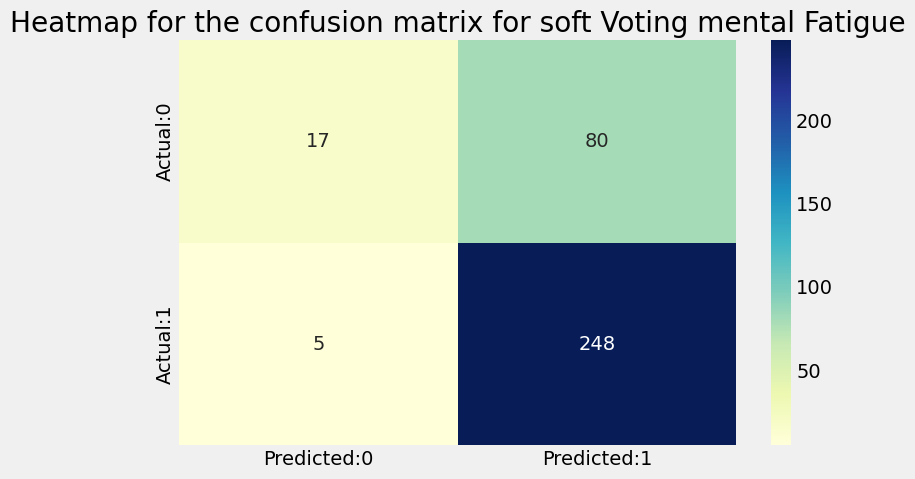

In [110]:

conf_matrix=pd.DataFrame(data=conf_mat_V1pf,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for soft Voting mental Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

<Axes: title={'center': 'Heatmap for the confusion matrix for soft Voting Physical Fatigue'}>

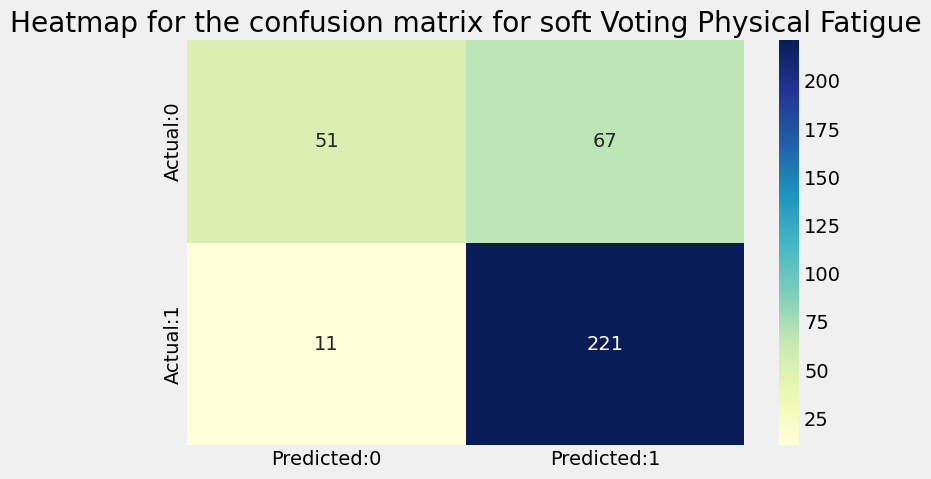

In [112]:

conf_matrix=pd.DataFrame(data=conf_mat_V1mf,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Heatmap for the confusion matrix for soft Voting Physical Fatigue")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

<style>
table, th, td {
  border: 1px solid black;
  border-collapse: collapse;
}
th, td {
  padding: 5px;
}
.center {
  text-align: center;
}
</style>


| Model/Technique           | Fatigue Type | Accuracy (Mean ± SD) | Precision (Mean ± SD) | Recall (Mean ± SD) | F1 Score (Mean ± SD) |
|---------------------------|--------------|-----------------------|------------------------|---------------------|----------------------|
| **Hyper-tuned Random Forest** | Physical   | 76.00 ± 0.09          | 0.77 ± 0.12            | 0.76 ± 0.09         | 0.73 ± 0.10           |
|                            | Mental       | 76.00 ± 0.12          | 0.78 ± 0.10            | 0.76 ± 0.12         | 0.75 ± 0.11           |
| **Hyper-tuned XGBoost**    | Physical   | 72.00 ± 0.01          | 0.52 ± 0.01            | 0.72 ± 0.01         | 0.61 ± 0.01           |
|                            | Mental       | 66.29 ± 0.01          | 0.44 ± 0.01            | 0.66 ± 0.01         | 0.53 ± 0.01           |
| **Deep Learning Algorithms** |            |                        |                        |                     |                       |
| CNN                        | Physical   | 75.0 ± 0.03           | 0.74 ± 0.03            | 0.75 ± 0.03         | 0.74 ± 0.03           |
|                            | Mental       | 72.0 ± 0.06           | 0.72 ± 0.07            | 0.72 ± 0.06         | 0.71 ± 0.07           |
| ANN                        | Physical   | 73.0 ± 0.03           | 0.72 ± 0.03            | 0.73 ± 0.03         | 0.72 ± 0.03           |
|                            | Mental       | 74.0 ± 0.04           | 0.73 ± 0.05            | 0.74 ± 0.04         | 0.73 ± 0.04           |
| ANN                        | Physical   | 68.0 ± 0.02           | 0.67 ± 0.01            | 0.68 ± 0.02         | 0.67 ± 0.01           |
|                            | Mental       | 73.0 ± 0.06           | 0.69 ± 0.07            | 0.73 ± 0.06         | 0.69 ± 0.05           |
| **Stacked Models(RF & CNN)**         | Physical   | 75.0 ± 0.02           | 0.77 ± 0.04            | 0.75 ± 0.02         | 0.69 ± 0.04           |
|                            | Mental       | 78.0 ± 0.04           | 0.79 ± 0.03            | 0.78 ± 0.02         | 0.72 ± 0.02           |
| **Voting Techniques(RF & CNN)**      | Physical   | 78.0 ± 0.02           | 0.78 ± 0.04            | 0.76 ± 0.02         | 0.69 ± 0.04           |
| Hard                       | Mental       | 78.0 ± 0.03           | 0.78 ± 0.07            | 0.78 ± 0.02         | 0.72 ± 0.04           |
|                            | Physical   | 76.0 ± 0.02           | 0.80 ± 0.04            | 0.77 ± 0.02         | 0.70 ± 0.06           |
| Soft                       | Mental       | 77.0 ± 0.06           | 0.77 ± 0.07            | 0.76 ± 0.03         | 0.76 ± 0.03           |




### Analysis and Interpretation

1. **Random Forest:**
    - The Random Forest model performed well in both physical and mental fatigue prediction, achieving high accuracy, precision, recall, and F1-score.
  
2. **XGBoost (Hyper-tuned):**
    - Hyper-tuning the XGBoost model improved its performance, especially in predicting mental fatigue where it achieved an 80% accuracy, 0.91 precision, and 0.86 F1-score.
  
3. **Convolutional Neural Network (CNN):**
    - The CNN model demonstrated strong predictive capabilities in physical fatigue but showed a slight decrease in performance when predicting mental fatigue.
  
4. **Artificial Neural Network (ANN):**
    - ANN exhibited reasonable performance, but its accuracy and F1-score were comparatively lower than some other models, especially in predicting physical fatigue.
  
5. **Recurrent Neural Network (RNN):**
    - RNN performed consistently well across both physical and mental fatigue prediction, with accuracy and precision matching the Random Forest model.
  
6. **Stacking Combination (RF+RNN):**
    - Combining Random Forest and RNN through stacking improved predictive accuracy for mental fatigue to an impressive 83.10%.
  
7. **Hard Voting (RF+RNN):**
    - Hard Voting demonstrated mixed results with a significant drop in accuracy for physical fatigue but improved precision for mental fatigue.
  
8. **Soft Voting (RF+RNN):**
    - Soft Voting showed a balanced performance, maintaining reasonable accuracy and precision for both physical and mental fatigue.

### Recommendations

- **Model Selection:**
    - Depending on the specific use case and priorities, the Random Forest, XGBoost (Hyper-tuned), or the Stacking Combination (RF+CNN) could be considered for deployment.

- **Further Investigation:**
    - Conducting a more in-depth analysis on misclassifications and exploring additional features could further enhance model performance.

- **Real-world Application:**
    - It's essential to evaluate these models in real-world scenarios to ensure their effectiveness in practical settings.


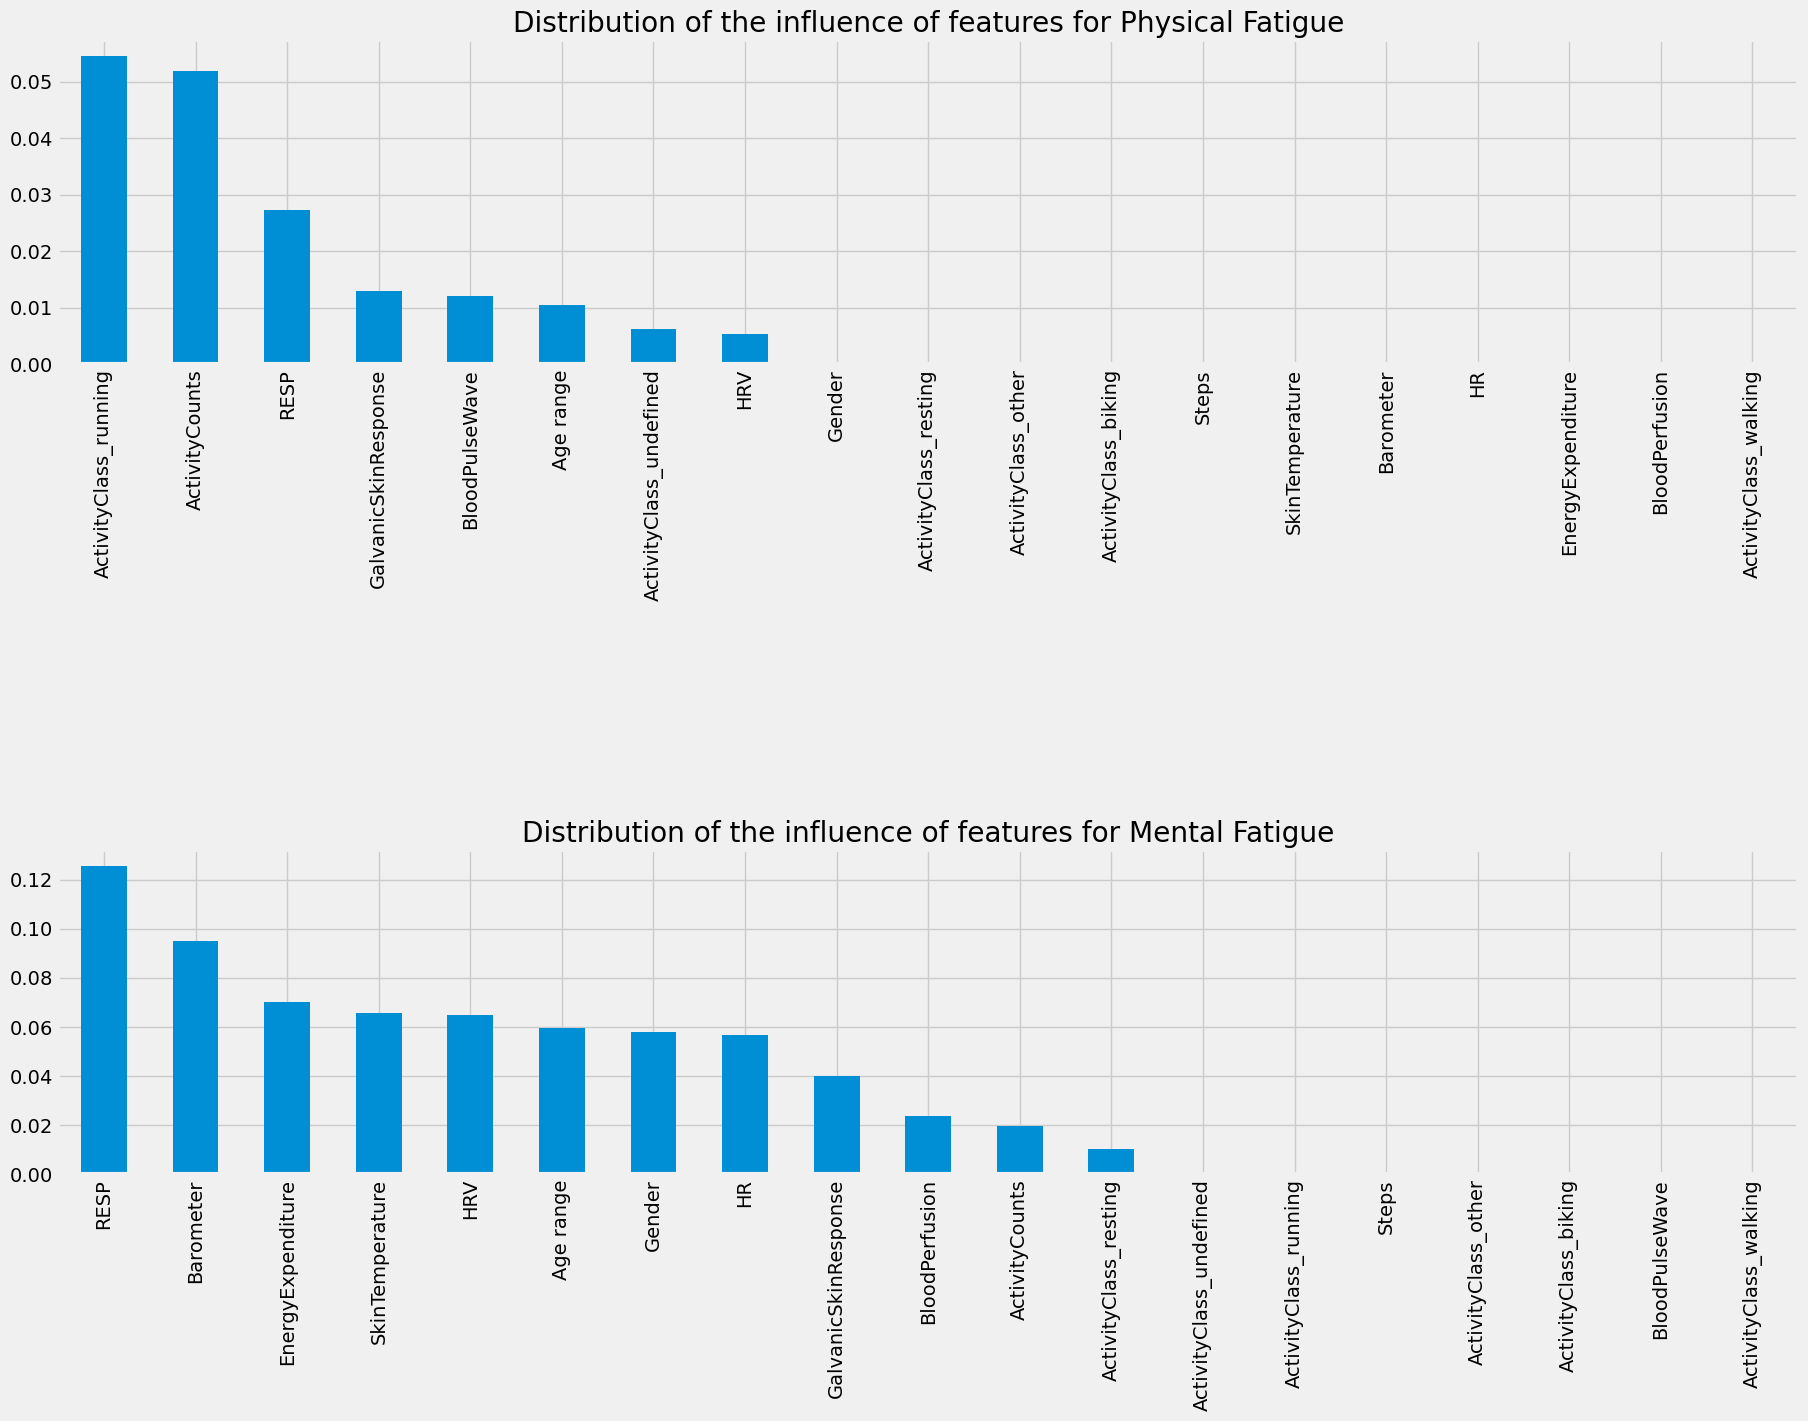

In [339]:
# Importing necessary libraries for feature selection
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Evaluate mutual information for physical fatigue
mutual_info_physical = mutual_info_regression(xtrain, y1train)
mutual_info_physical = pd.Series(mutual_info_physical)
mutual_info_physical.index = xtrain.columns

# Evaluate mutual information for mental fatigue
mutual_info_mental = mutual_info_regression(xtrain, y2train)
mutual_info_mental = pd.Series(mutual_info_mental)
mutual_info_mental.index = xtrain.columns

# Create a subplot for physical and mental fatigue
plt.figure(figsize=(20, 14))

# Subplot for physical fatigue
plt.subplot(2, 1, 1)
mutual_info_physical.sort_values(ascending=False).plot.bar()
plt.title('Distribution of the influence of features for Physical Fatigue')

# Add some space between the plots
plt.subplots_adjust(hspace=1.5)

# Subplot for mental fatigue
plt.subplot(2, 1, 2)
mutual_info_mental.sort_values(ascending=False).plot.bar()
plt.title('Distribution of the influence of features for Mental Fatigue')

plt.show()


In [340]:
#Determine the best 10 futures from the previous chart for automatic selection for the physical Fatigue
def feature_select(X,y):
    selector = SelectKBest(mutual_info_regression,k=10)
    selector.fit(X,y)
    selected_features_mask = selector.get_support()

    selected_features = X.columns[selected_features_mask]
    return selected_features

selected_features_PH = feature_select(xtrain,y1train)
selected_features_PH

Index(['BloodPulseWave', 'EnergyExpenditure', 'RESP', 'Steps',
       'ActivityClass_biking', 'ActivityClass_other', 'ActivityClass_resting',
       'ActivityClass_running', 'ActivityClass_undefined',
       'ActivityClass_walking'],
      dtype='object')

In [341]:
#Determine the best 10 futures from the previous chart for automatic selection for the physical Fatigue
def feature_select(X,y):
    selector = SelectKBest(mutual_info_regression,k=10)
    selector.fit(X,y)
    selected_features_mask = selector.get_support()

    selected_features = X.columns[selected_features_mask]
    return selected_features

selected_features_MF = feature_select(xtrain,y2train)
selected_features_MF

Index(['ActivityCounts', 'Barometer', 'EnergyExpenditure',
       'GalvanicSkinResponse', 'HR', 'HRV', 'RESP', 'SkinTemperature',
       'Gender', 'ActivityClass_biking'],
      dtype='object')